# Ensemble Learning

In [1]:
import pandas as pd
import numpy as np
import utils
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['figure.dpi'] = 300
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(seed=0)

# The spam email dataset

In [2]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

Lottery  Sale  Spam
0         7     8     1
1         3     2     0
2         8     4     1
3         2     6     0
4         6     5     1
5         9     6     1
6         8     5     0
7         7     1     0
8         1     9     1
9         4     7     0
10        1     3     0
11        3    10     1
12        2     2     1
13        9     3     0
14        5     3     0
15       10     1     0
16        5     9     1
17       10     8     1

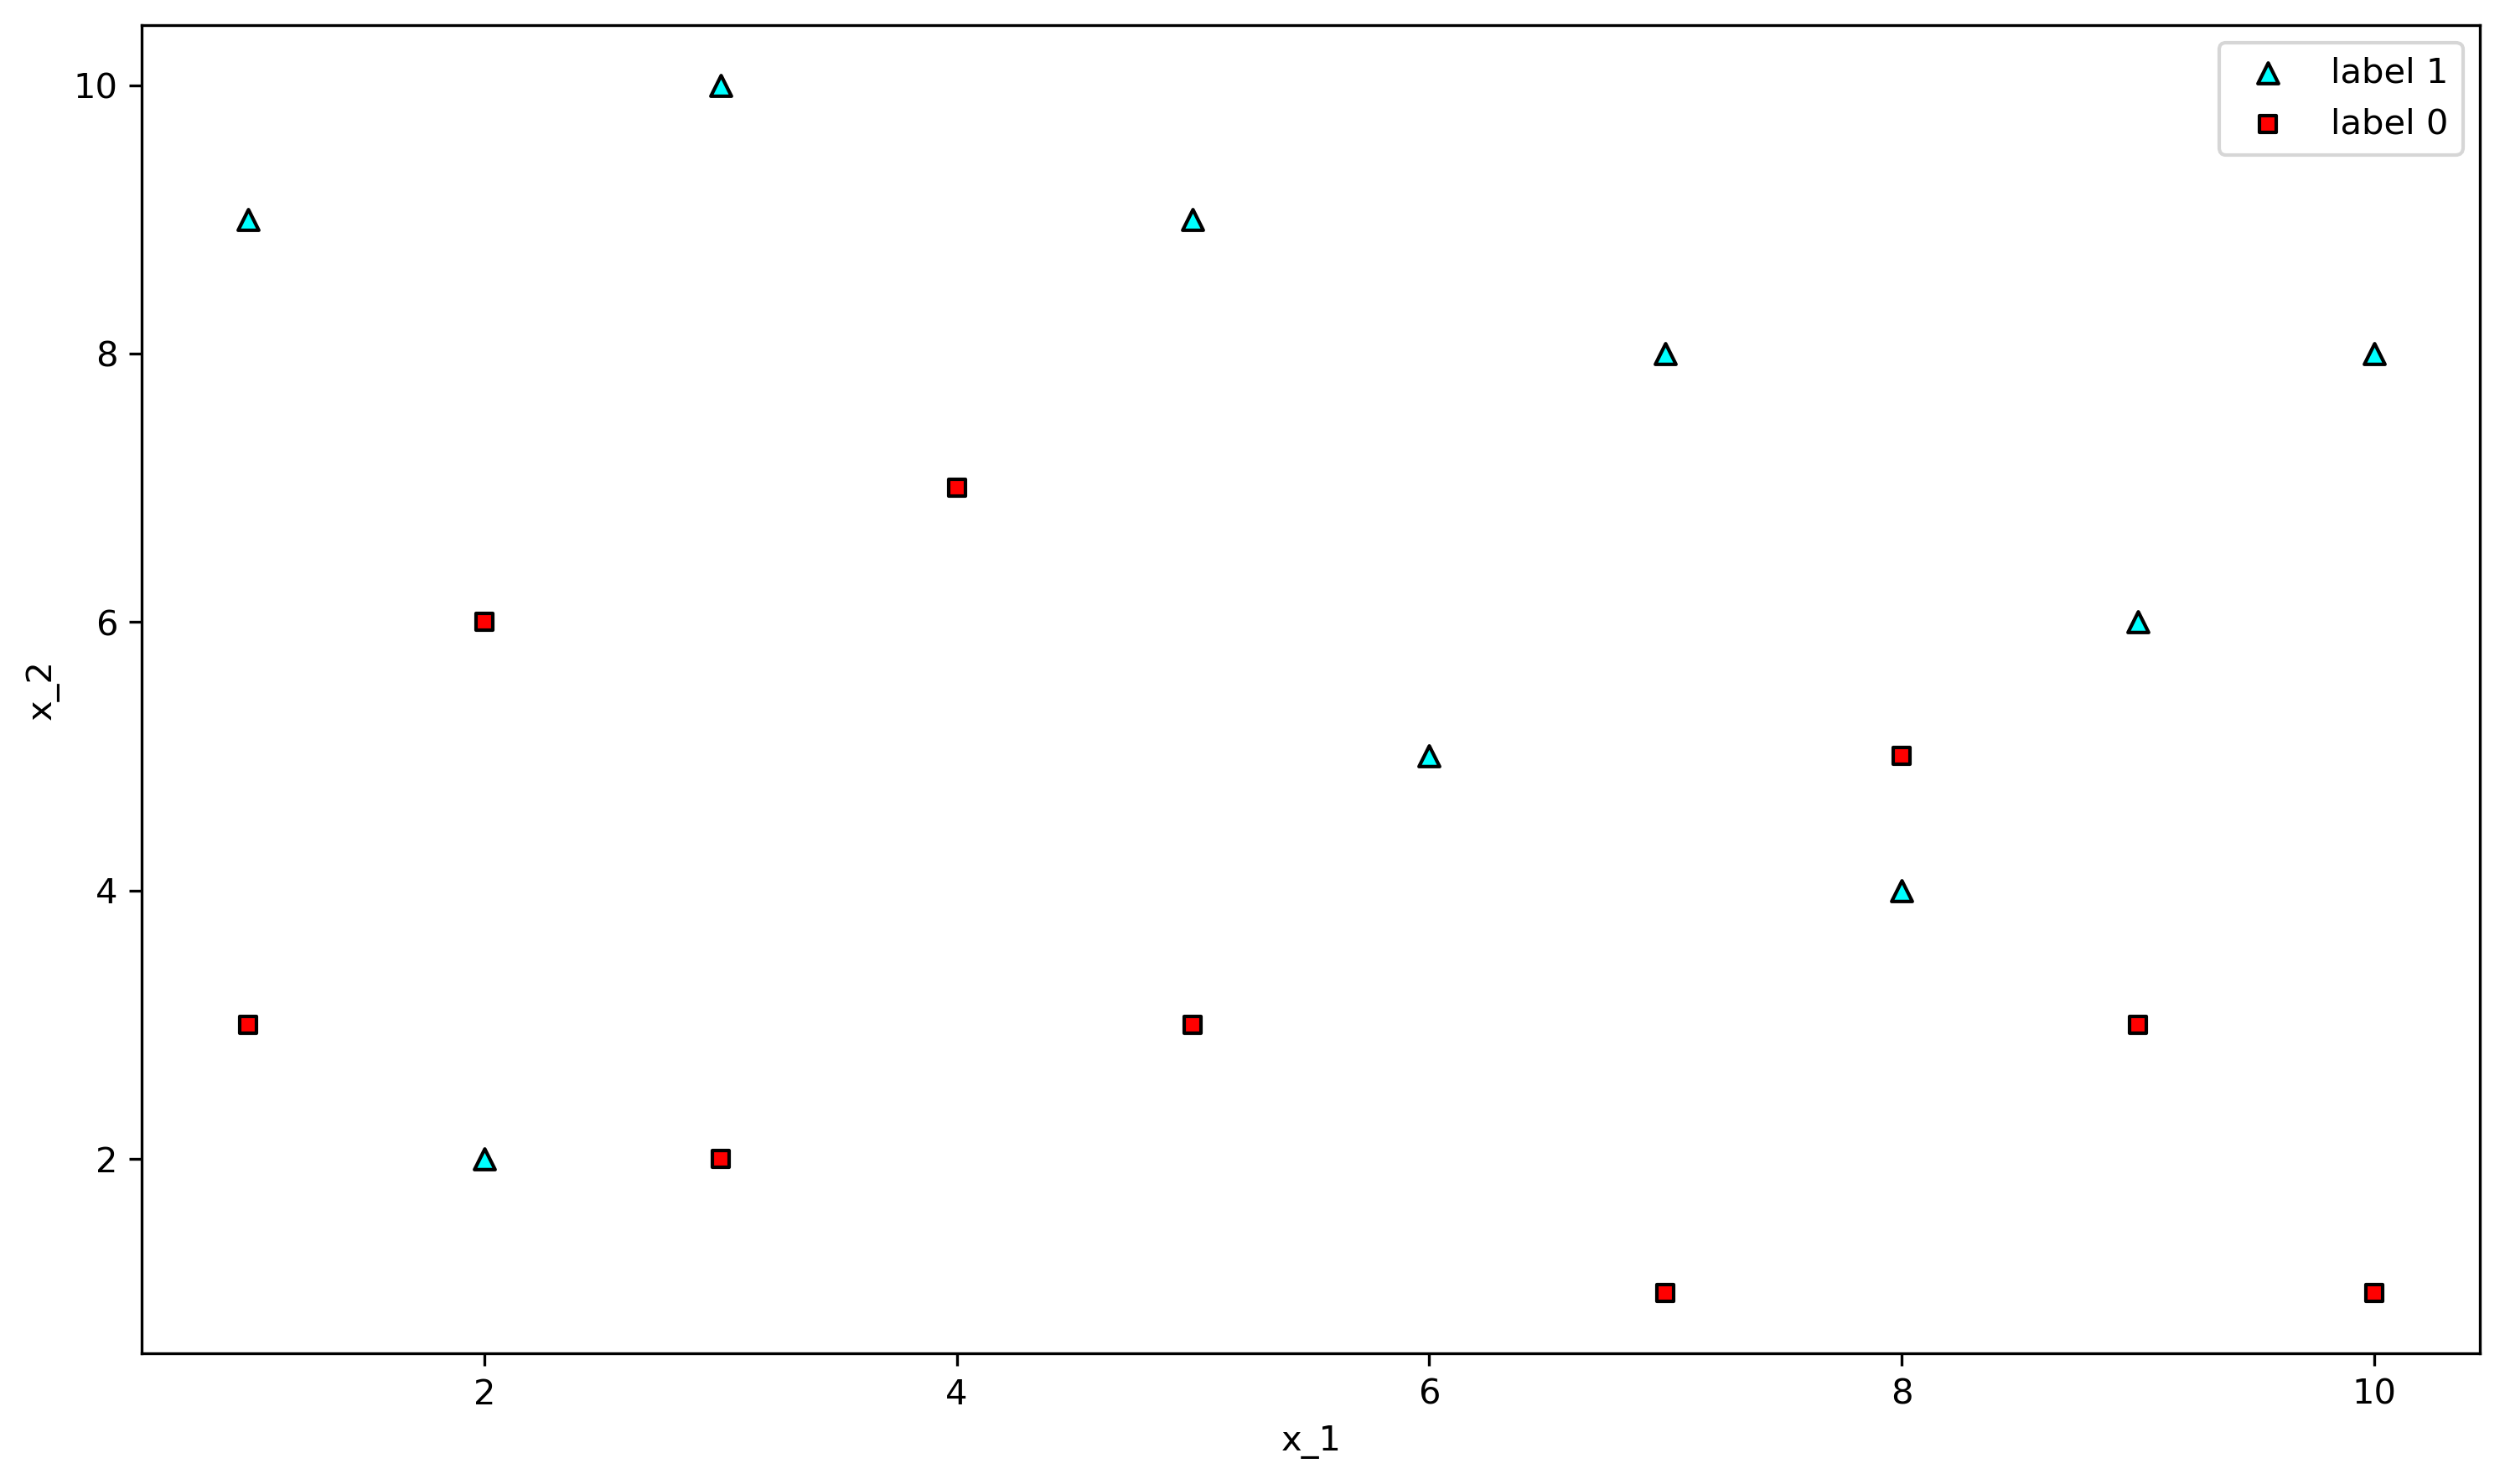

In [3]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features=features, labels=labels)

In [4]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

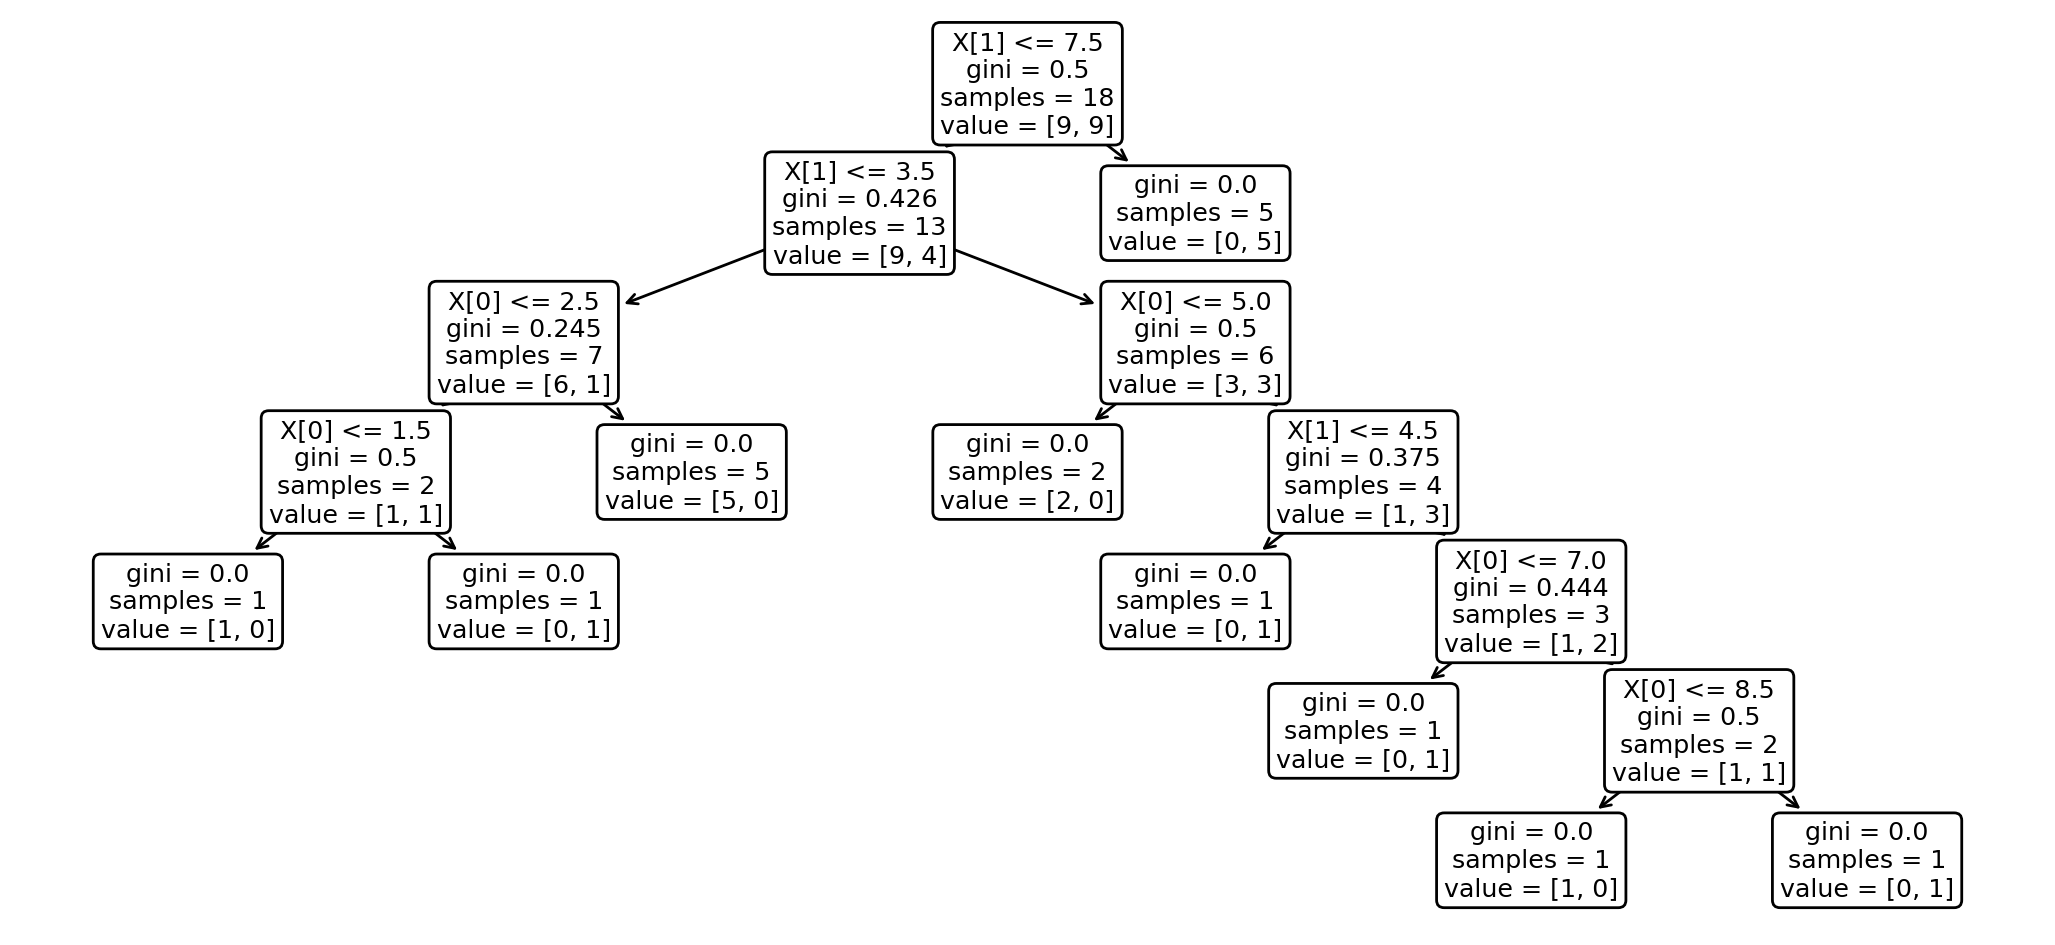

In [5]:
plt.figure(figsize=(13,6), dpi = 200)
tree.plot_tree(decision_tree_classifier, rounded=True);

# Training a random forest by hand

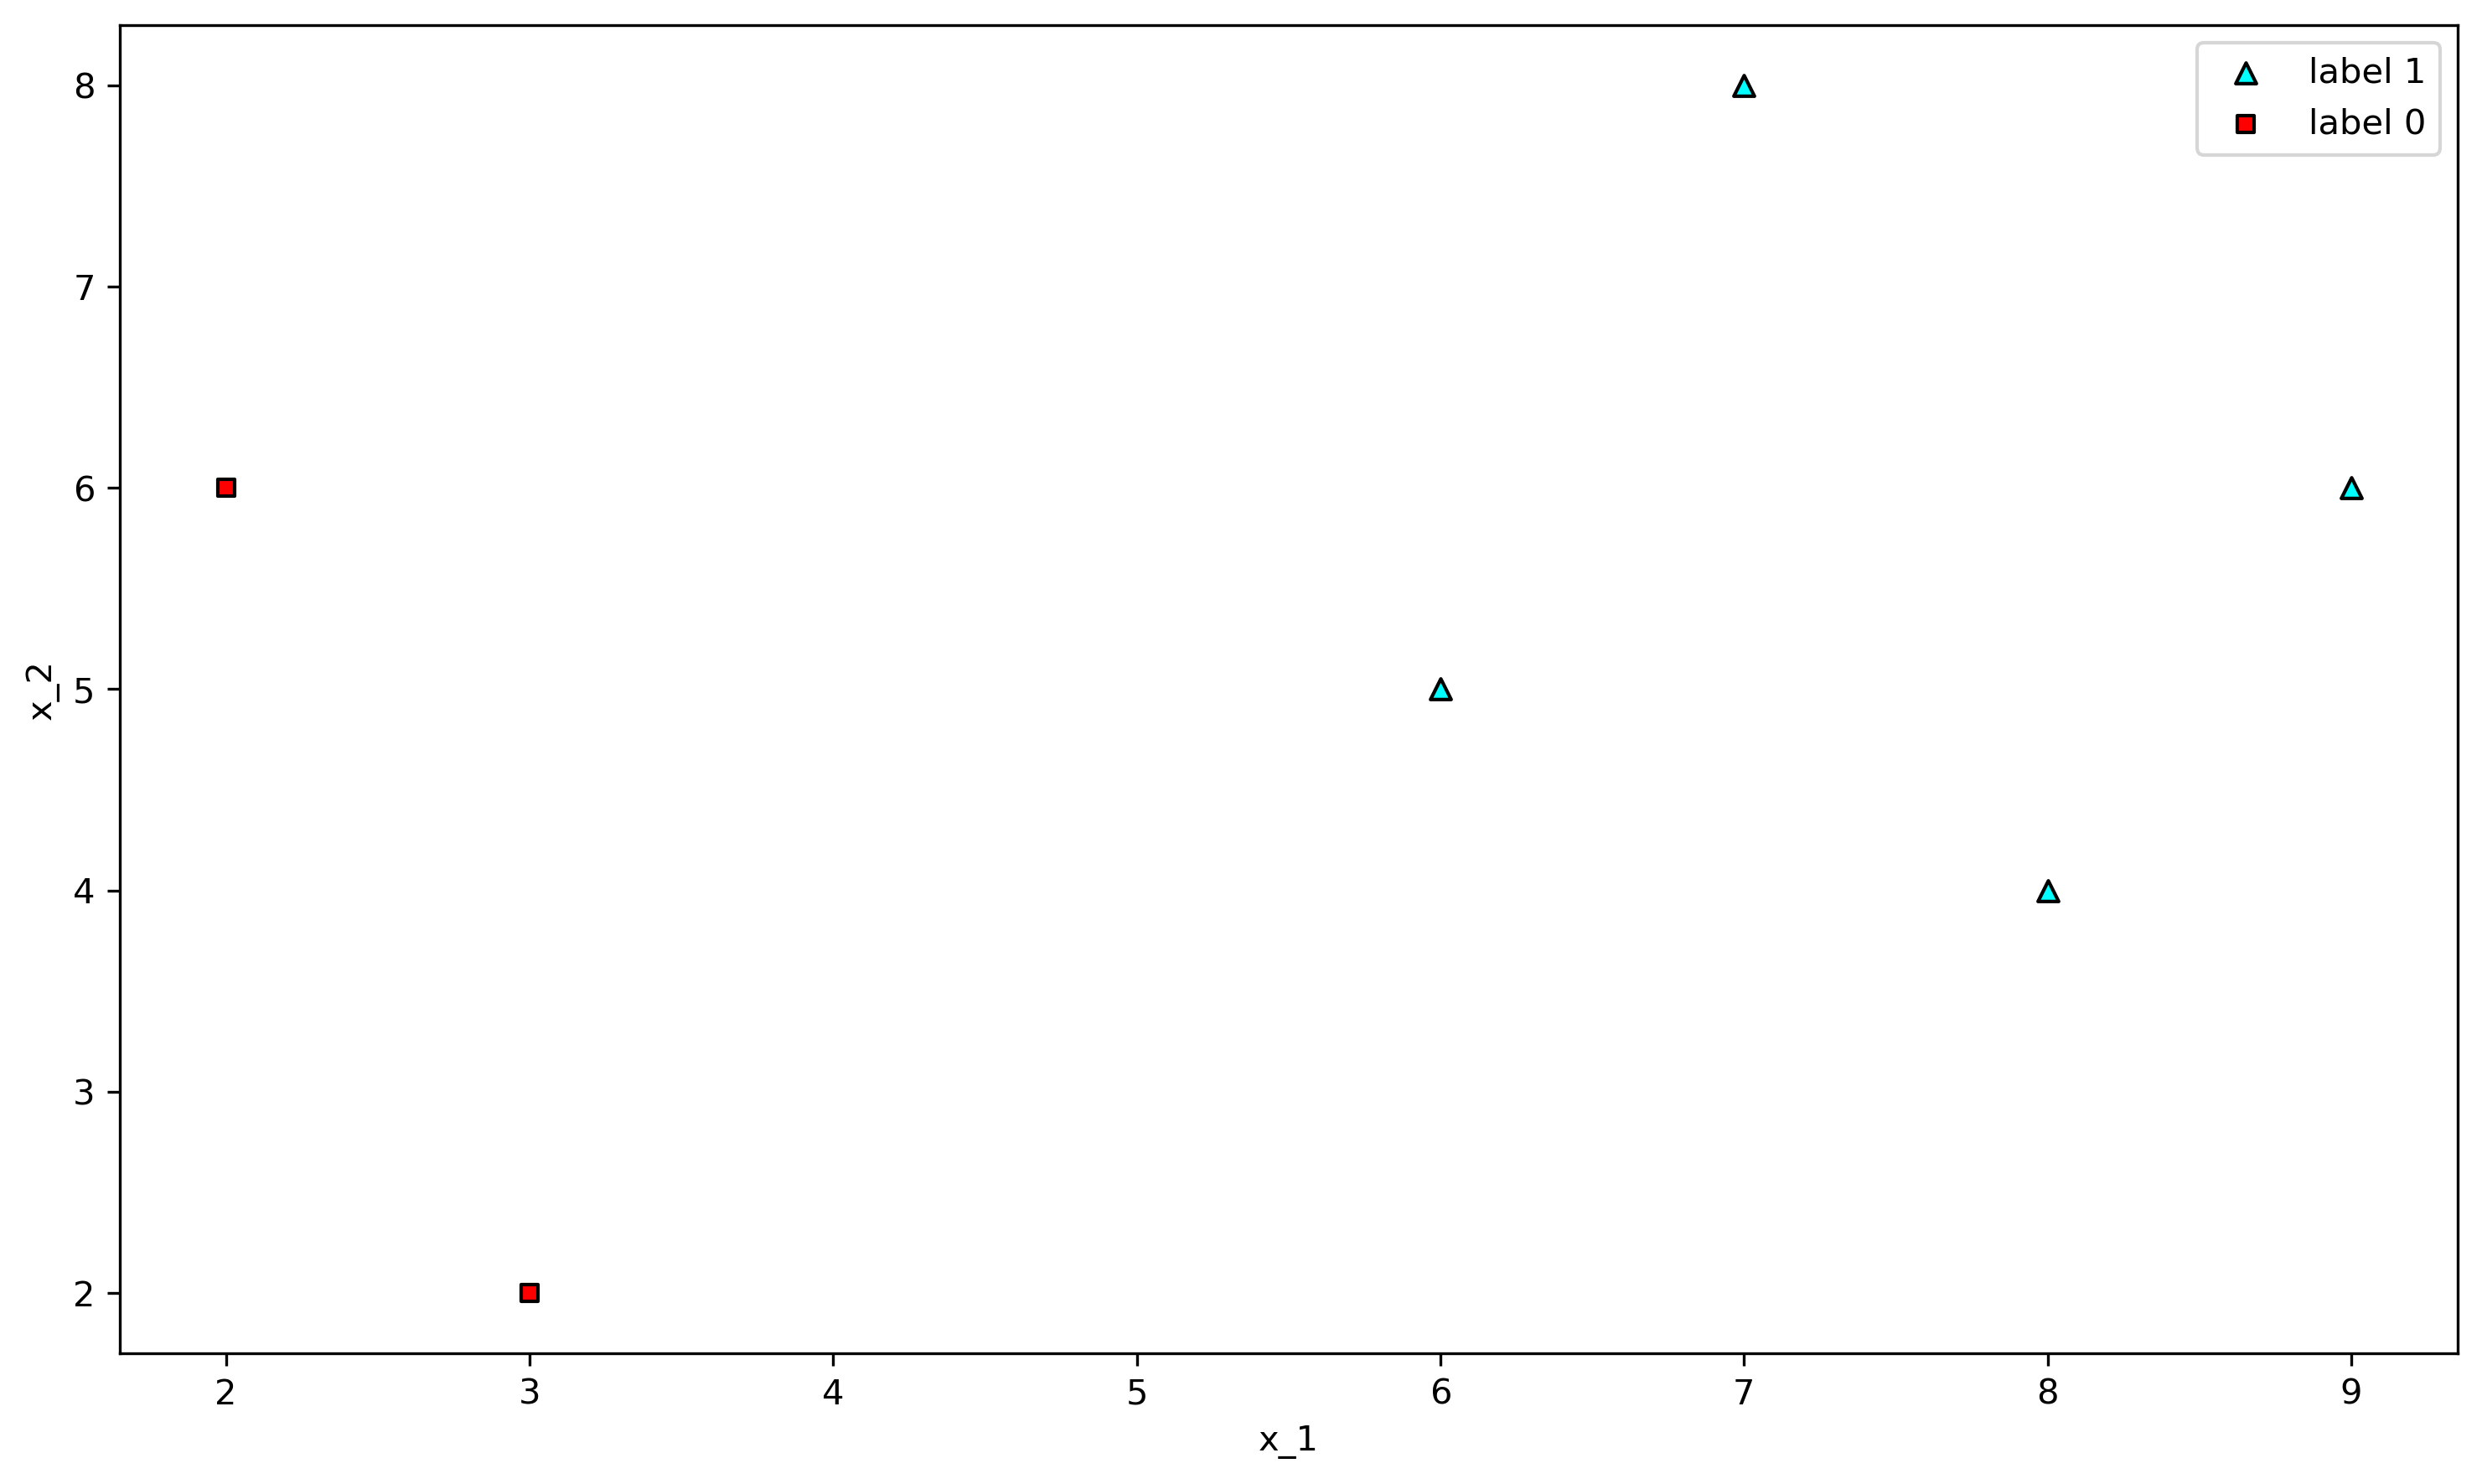

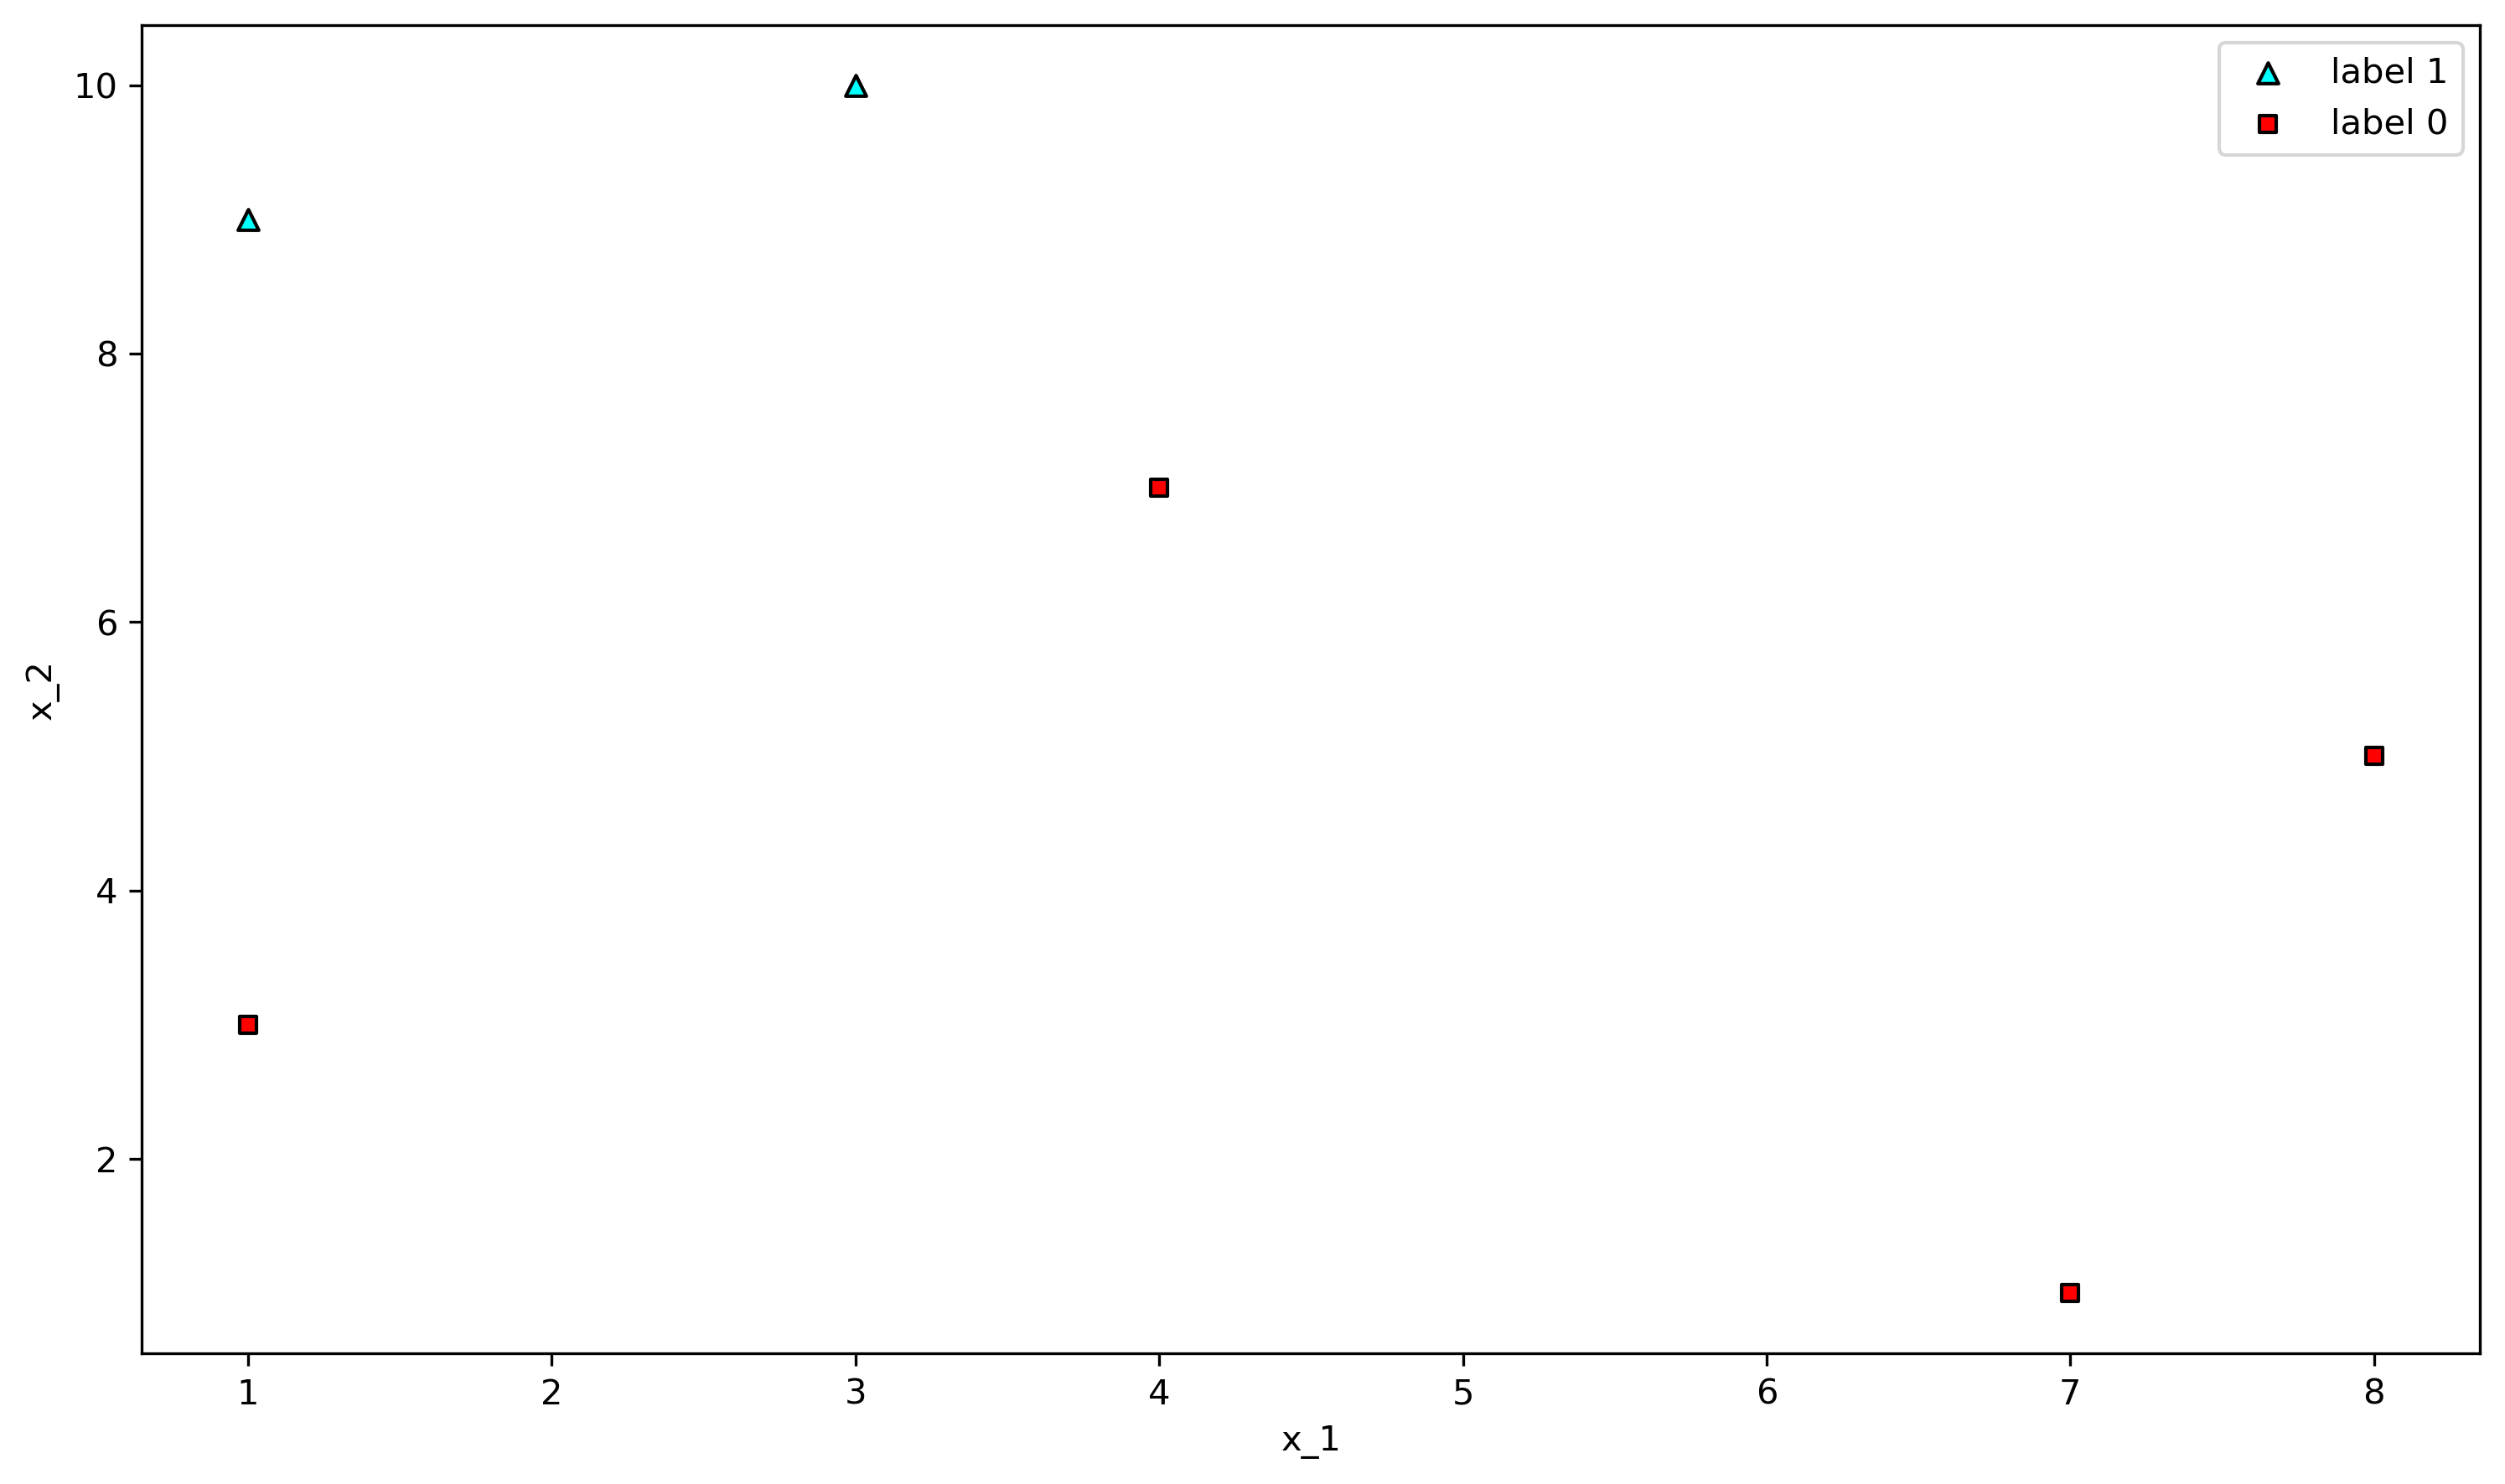

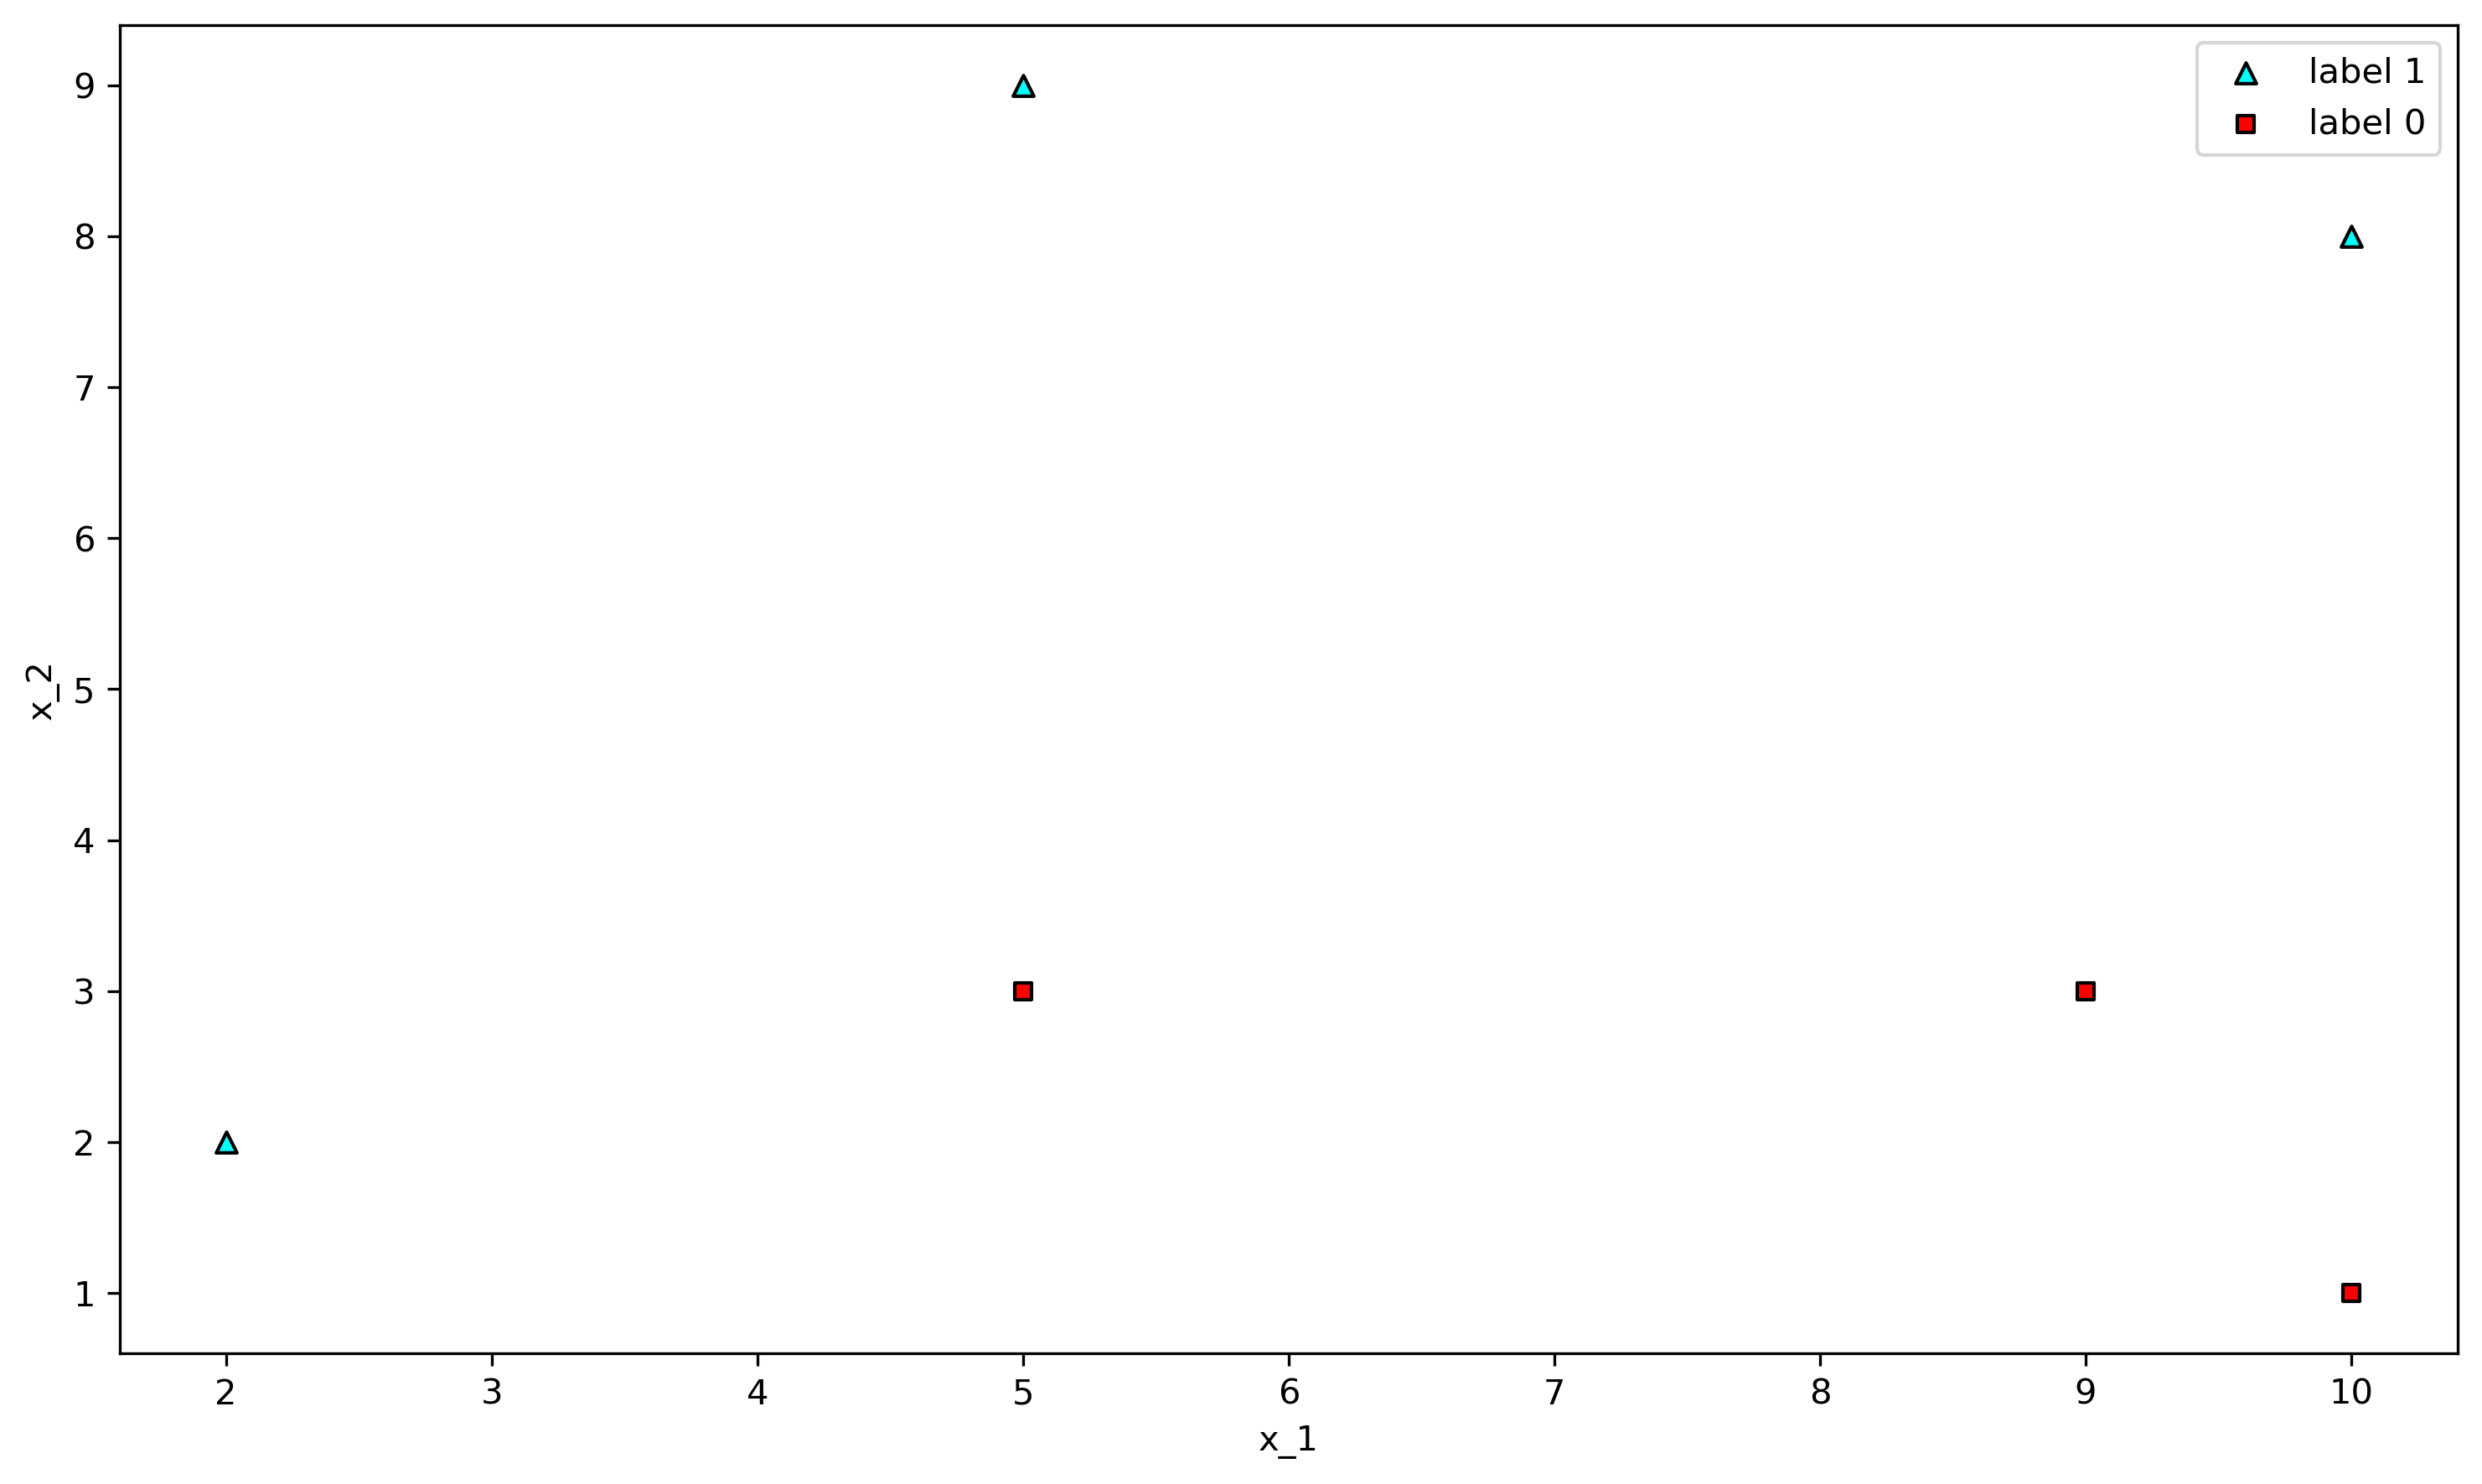

In [6]:
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[['Lottery', 'Sale']]
labels1 = first_batch['Spam']
utils.plot_points(features1, labels1)
plt.show()

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[['Lottery', 'Sale']]
labels2 = second_batch['Spam']
utils.plot_points(features2, labels2)
plt.show()

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[['Lottery', 'Sale']]
labels3 = third_batch['Spam']
utils.plot_points(features3, labels3)

## Util module

In [7]:
import numpy as np
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels, fix_margins=True):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    if fix_margins:
        pyplot.xlim(0, 11)
        pyplot.ylim(0, 11)
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('Lottery')
    pyplot.ylabel('Sale')
    pyplot.legend(['Spam','Ham'])

def plot_model(X, y, model, fix_margins=True):
    X = np.array(X)
    y = np.array(y)
    plot_points(X, y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    if fix_margins:
        x_min=0
        y_min=0
        x_max=12
        y_max=12
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    pyplot.show()

def display_tree(dt):
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

def plot_trees(model):
    estimators = gradient_boosting_model.estimators_
    for i in range(len(estimators)):
        tree.plot_tree(estimators[i][0])
        pyplot.show()
        #plot_model(new_X, new_y, estimators[i][0])

def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    pyplot.scatter(features, labels)
    pyplot.plot(x, model.predict(x.reshape([-1,1])))
    pyplot.xlabel("Age")
    pyplot.ylabel("Days per week")
    pyplot.show()

/Users/pankajksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


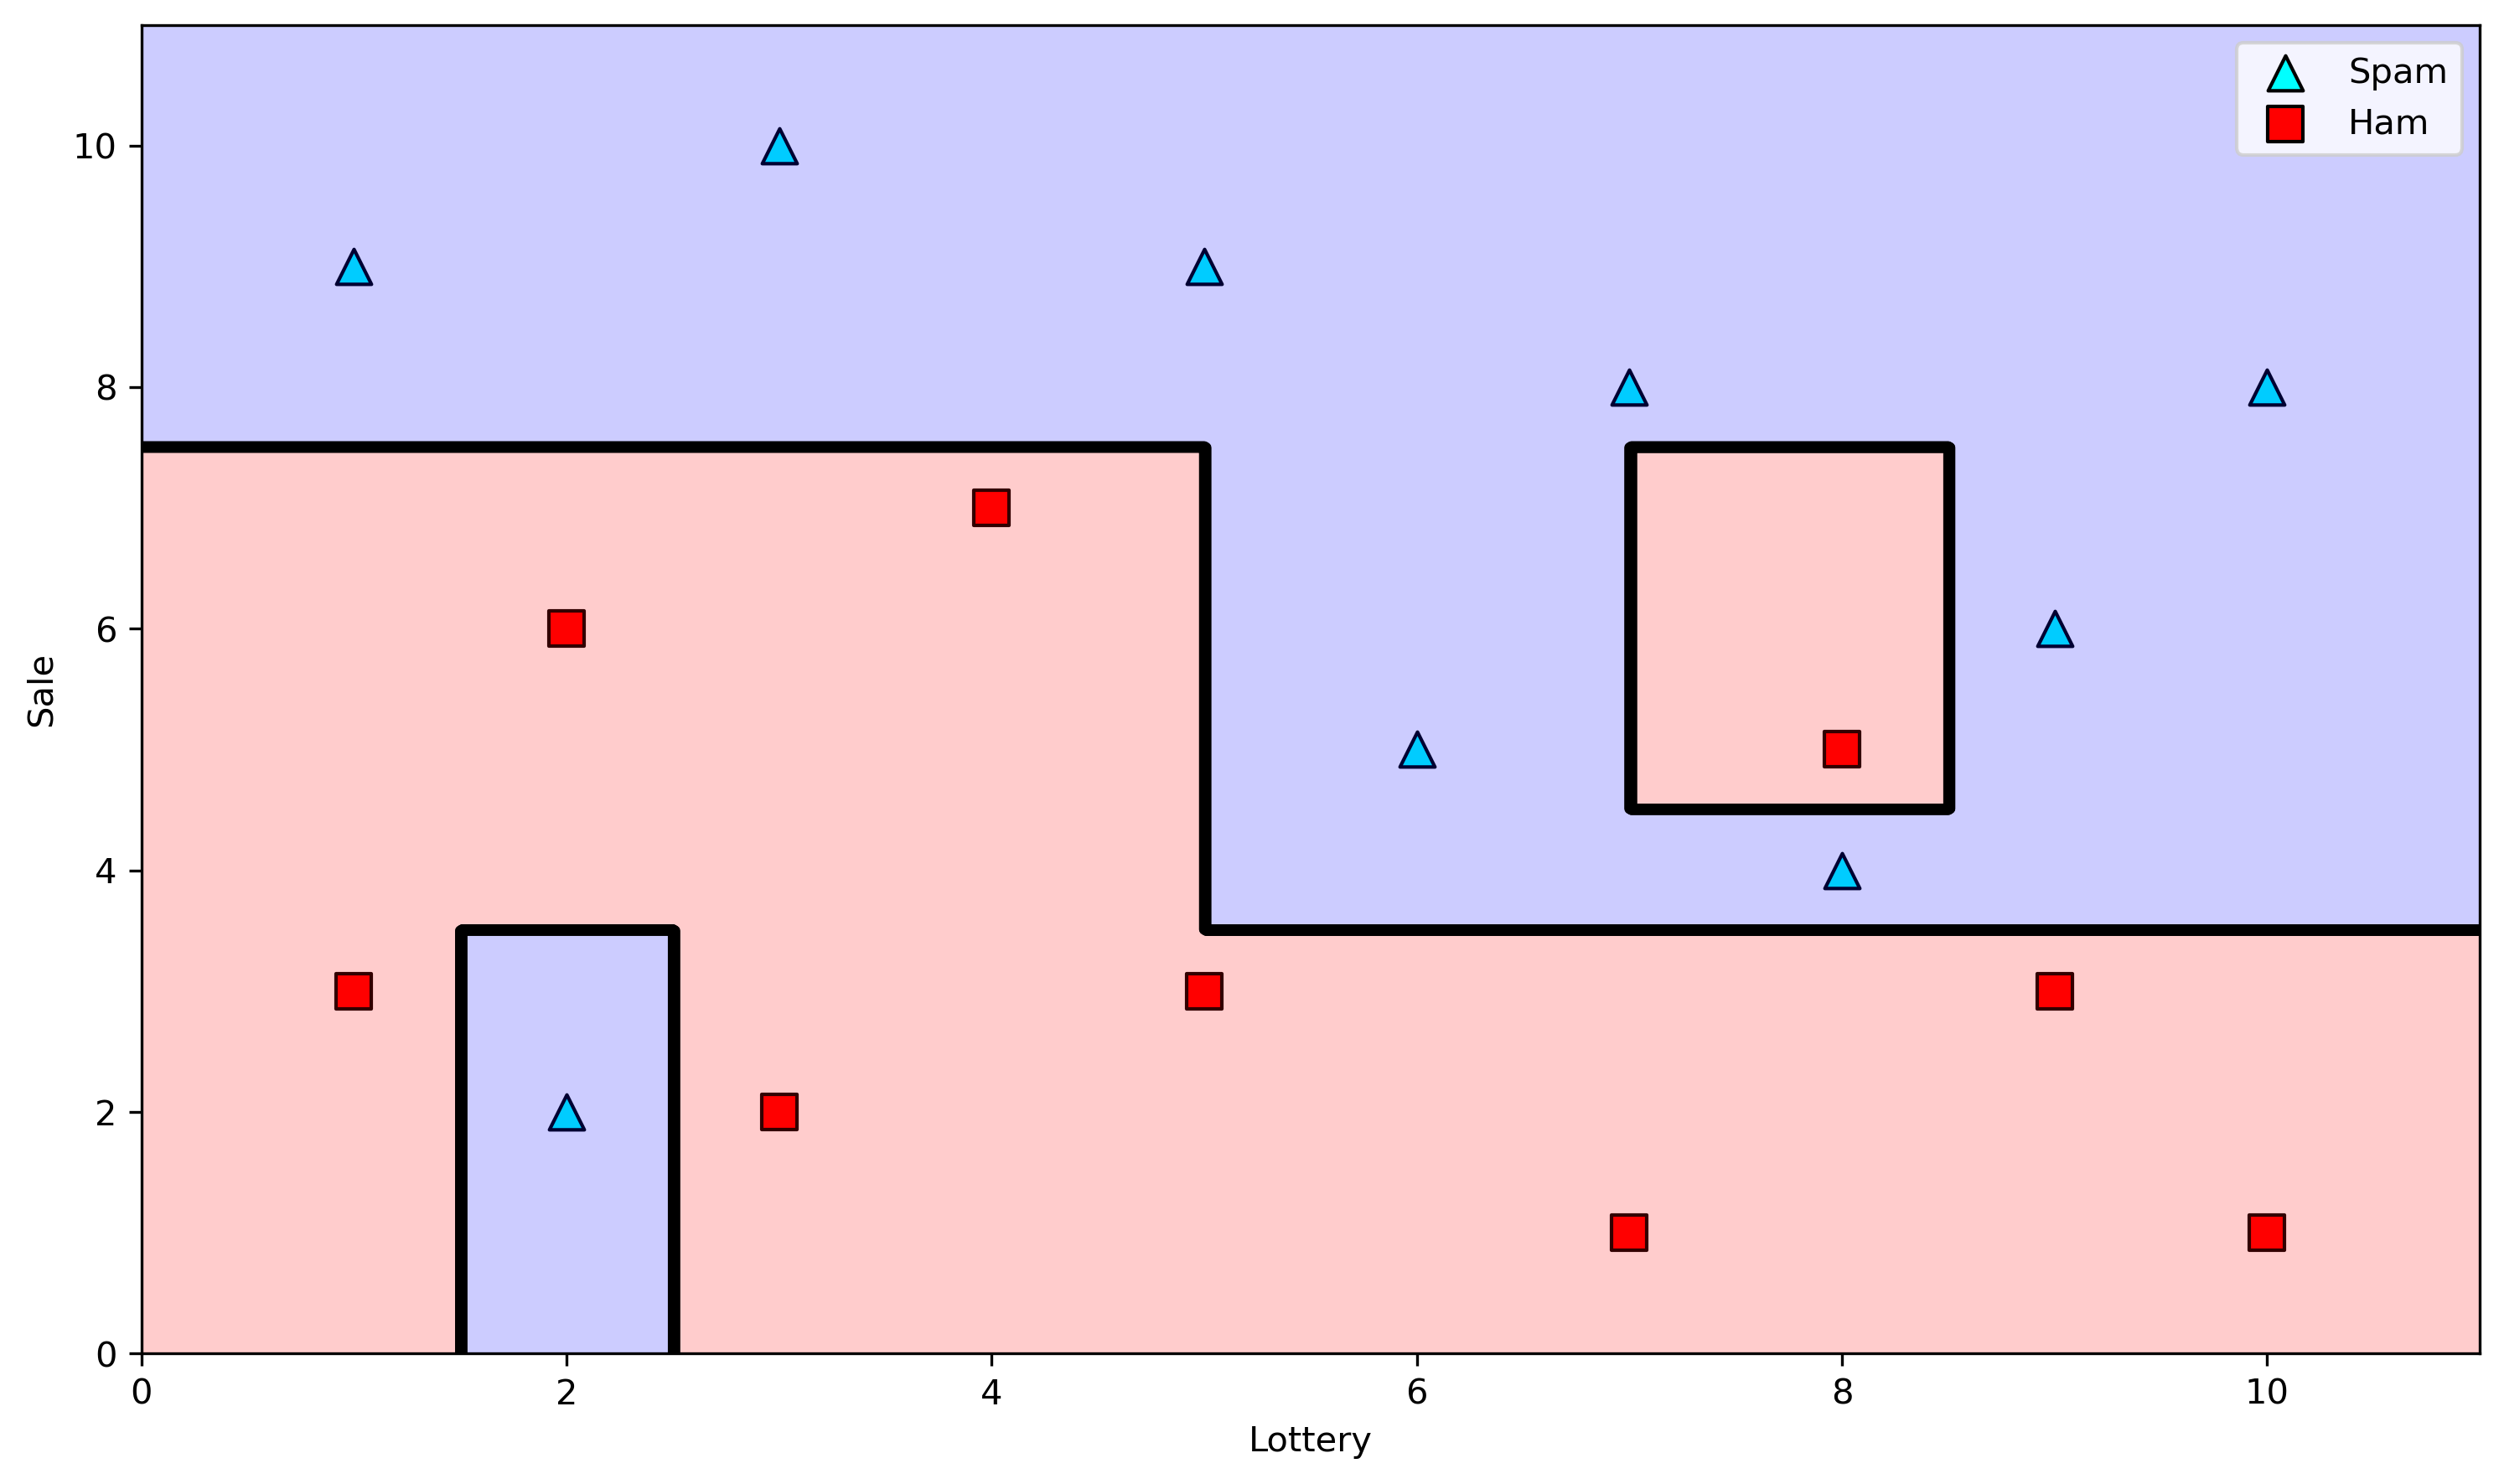

In [8]:
plot_model(features, labels, decision_tree_classifier)

> n_estimator gives the count of weak learners we are employing.
max_depth is the depth of involved decision tree here

Weak learner 1 training accuracy: 1.0


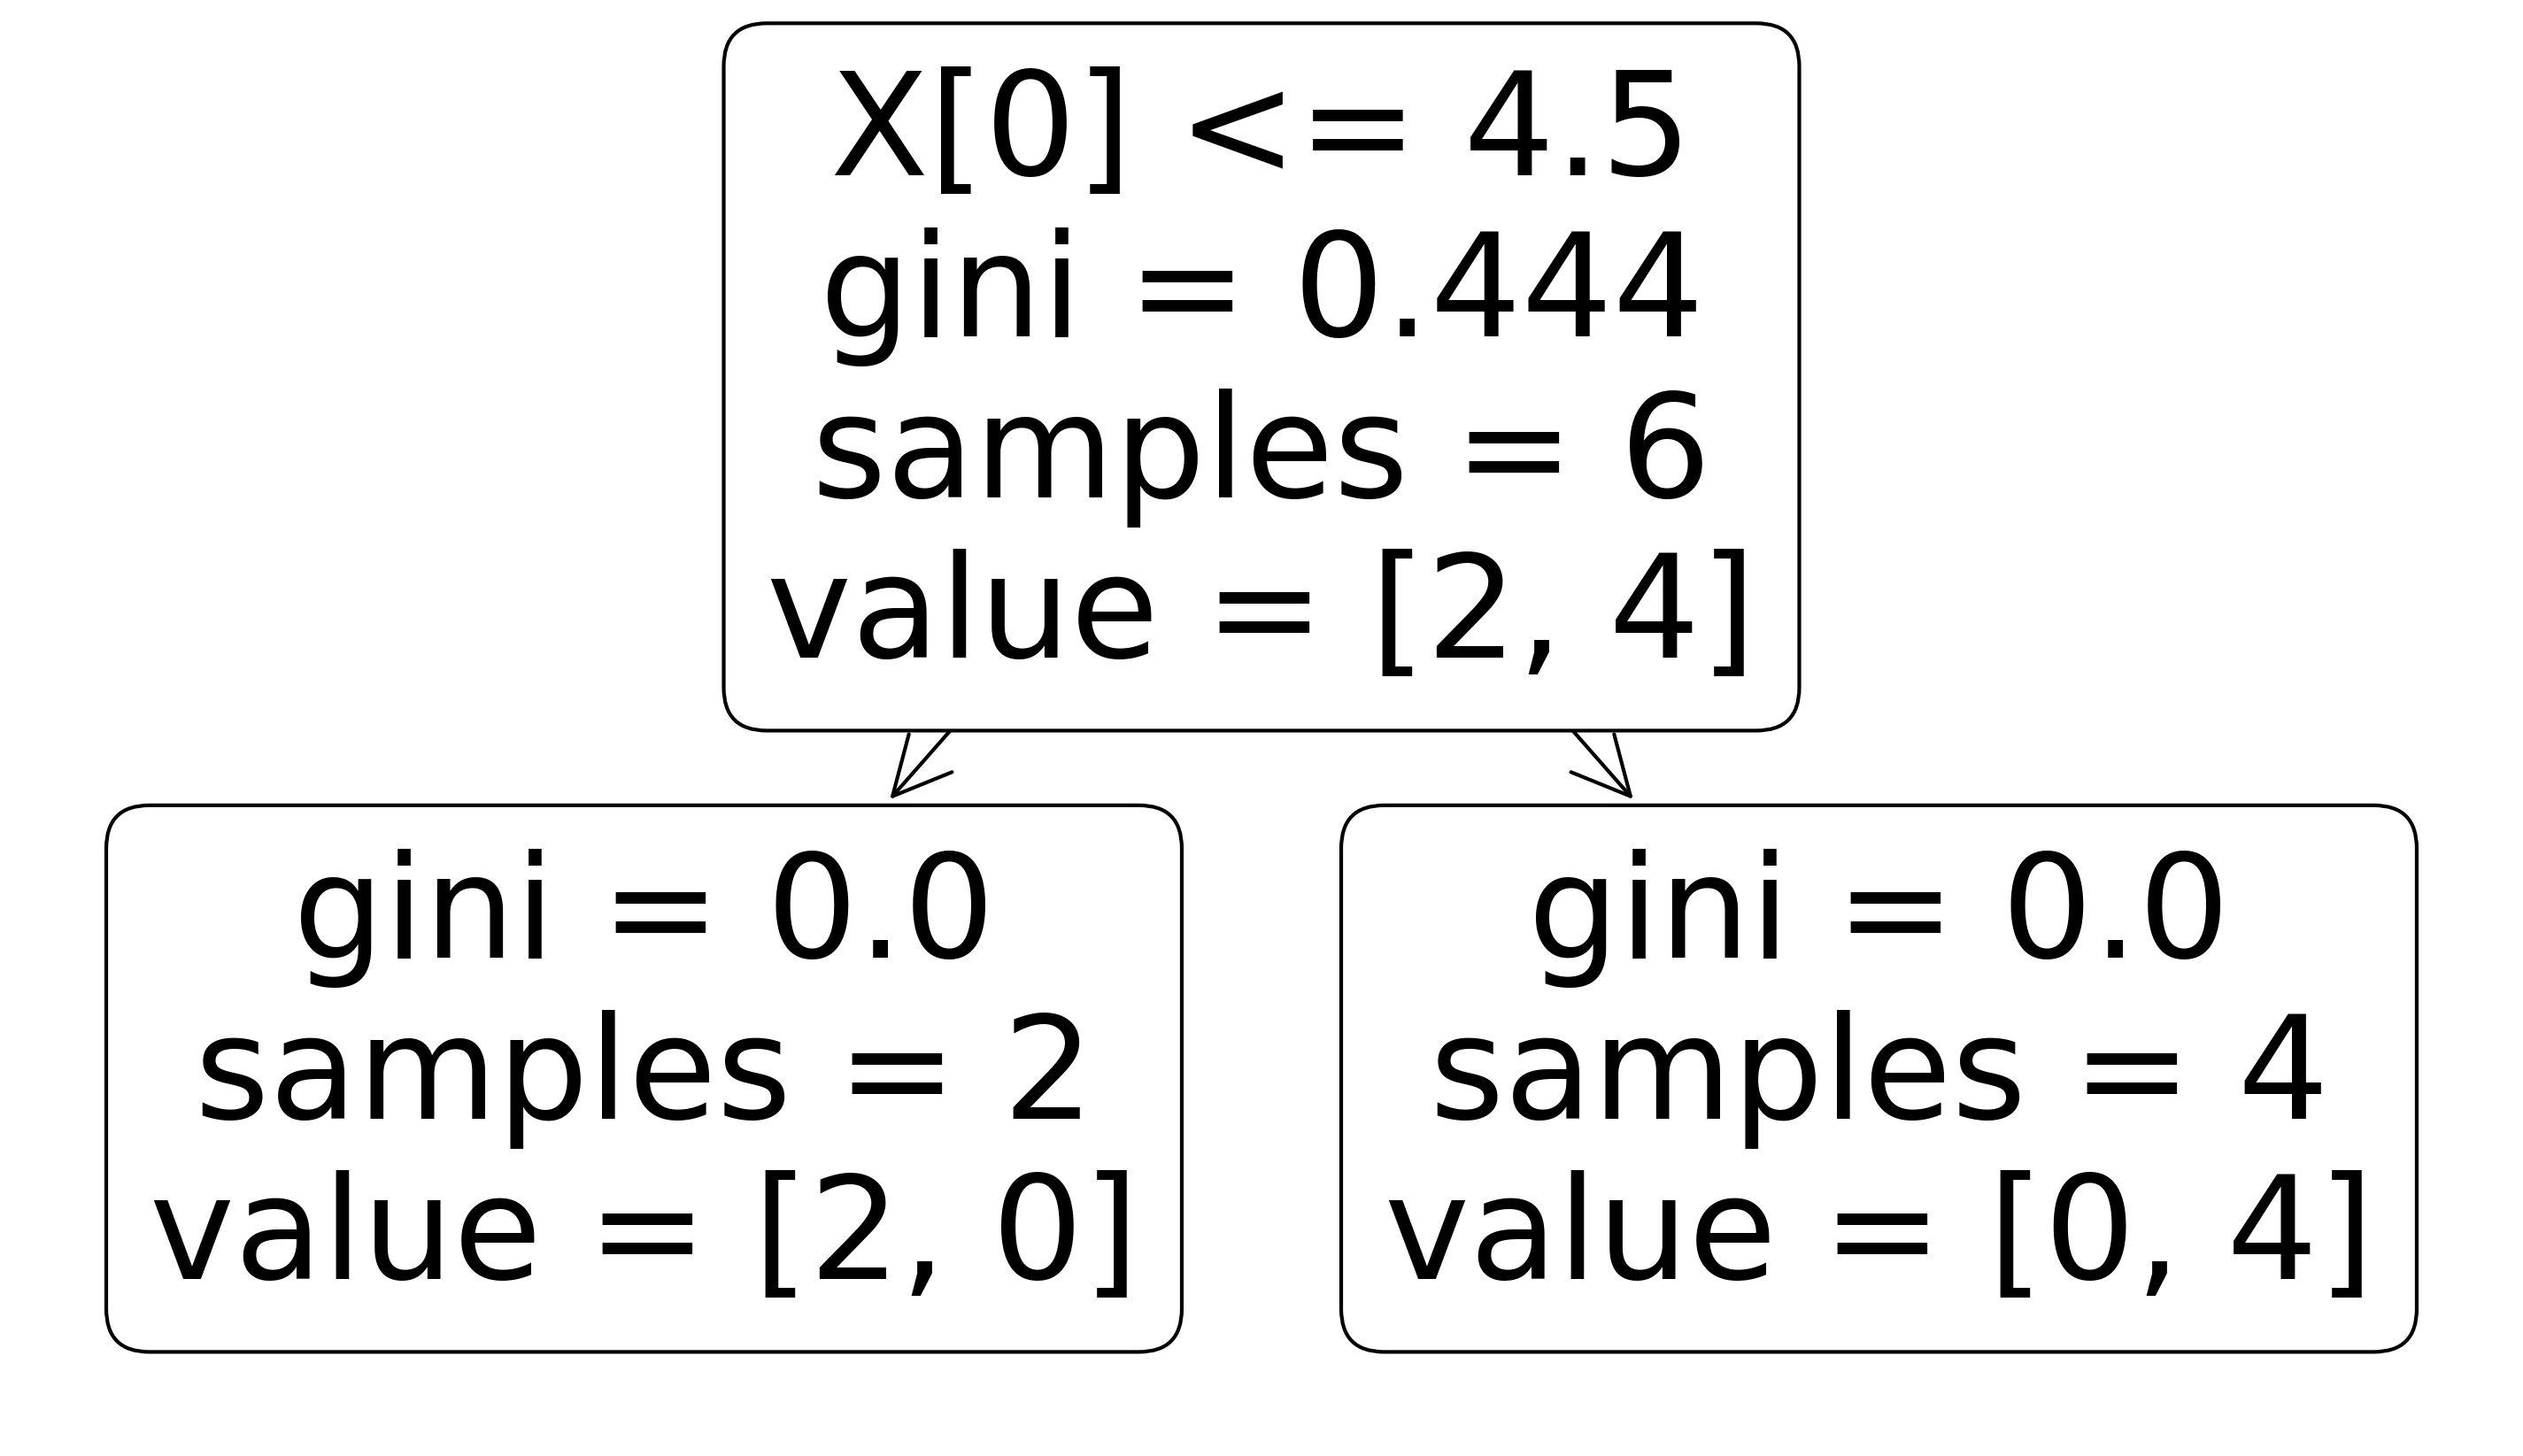

/Users/pankajksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


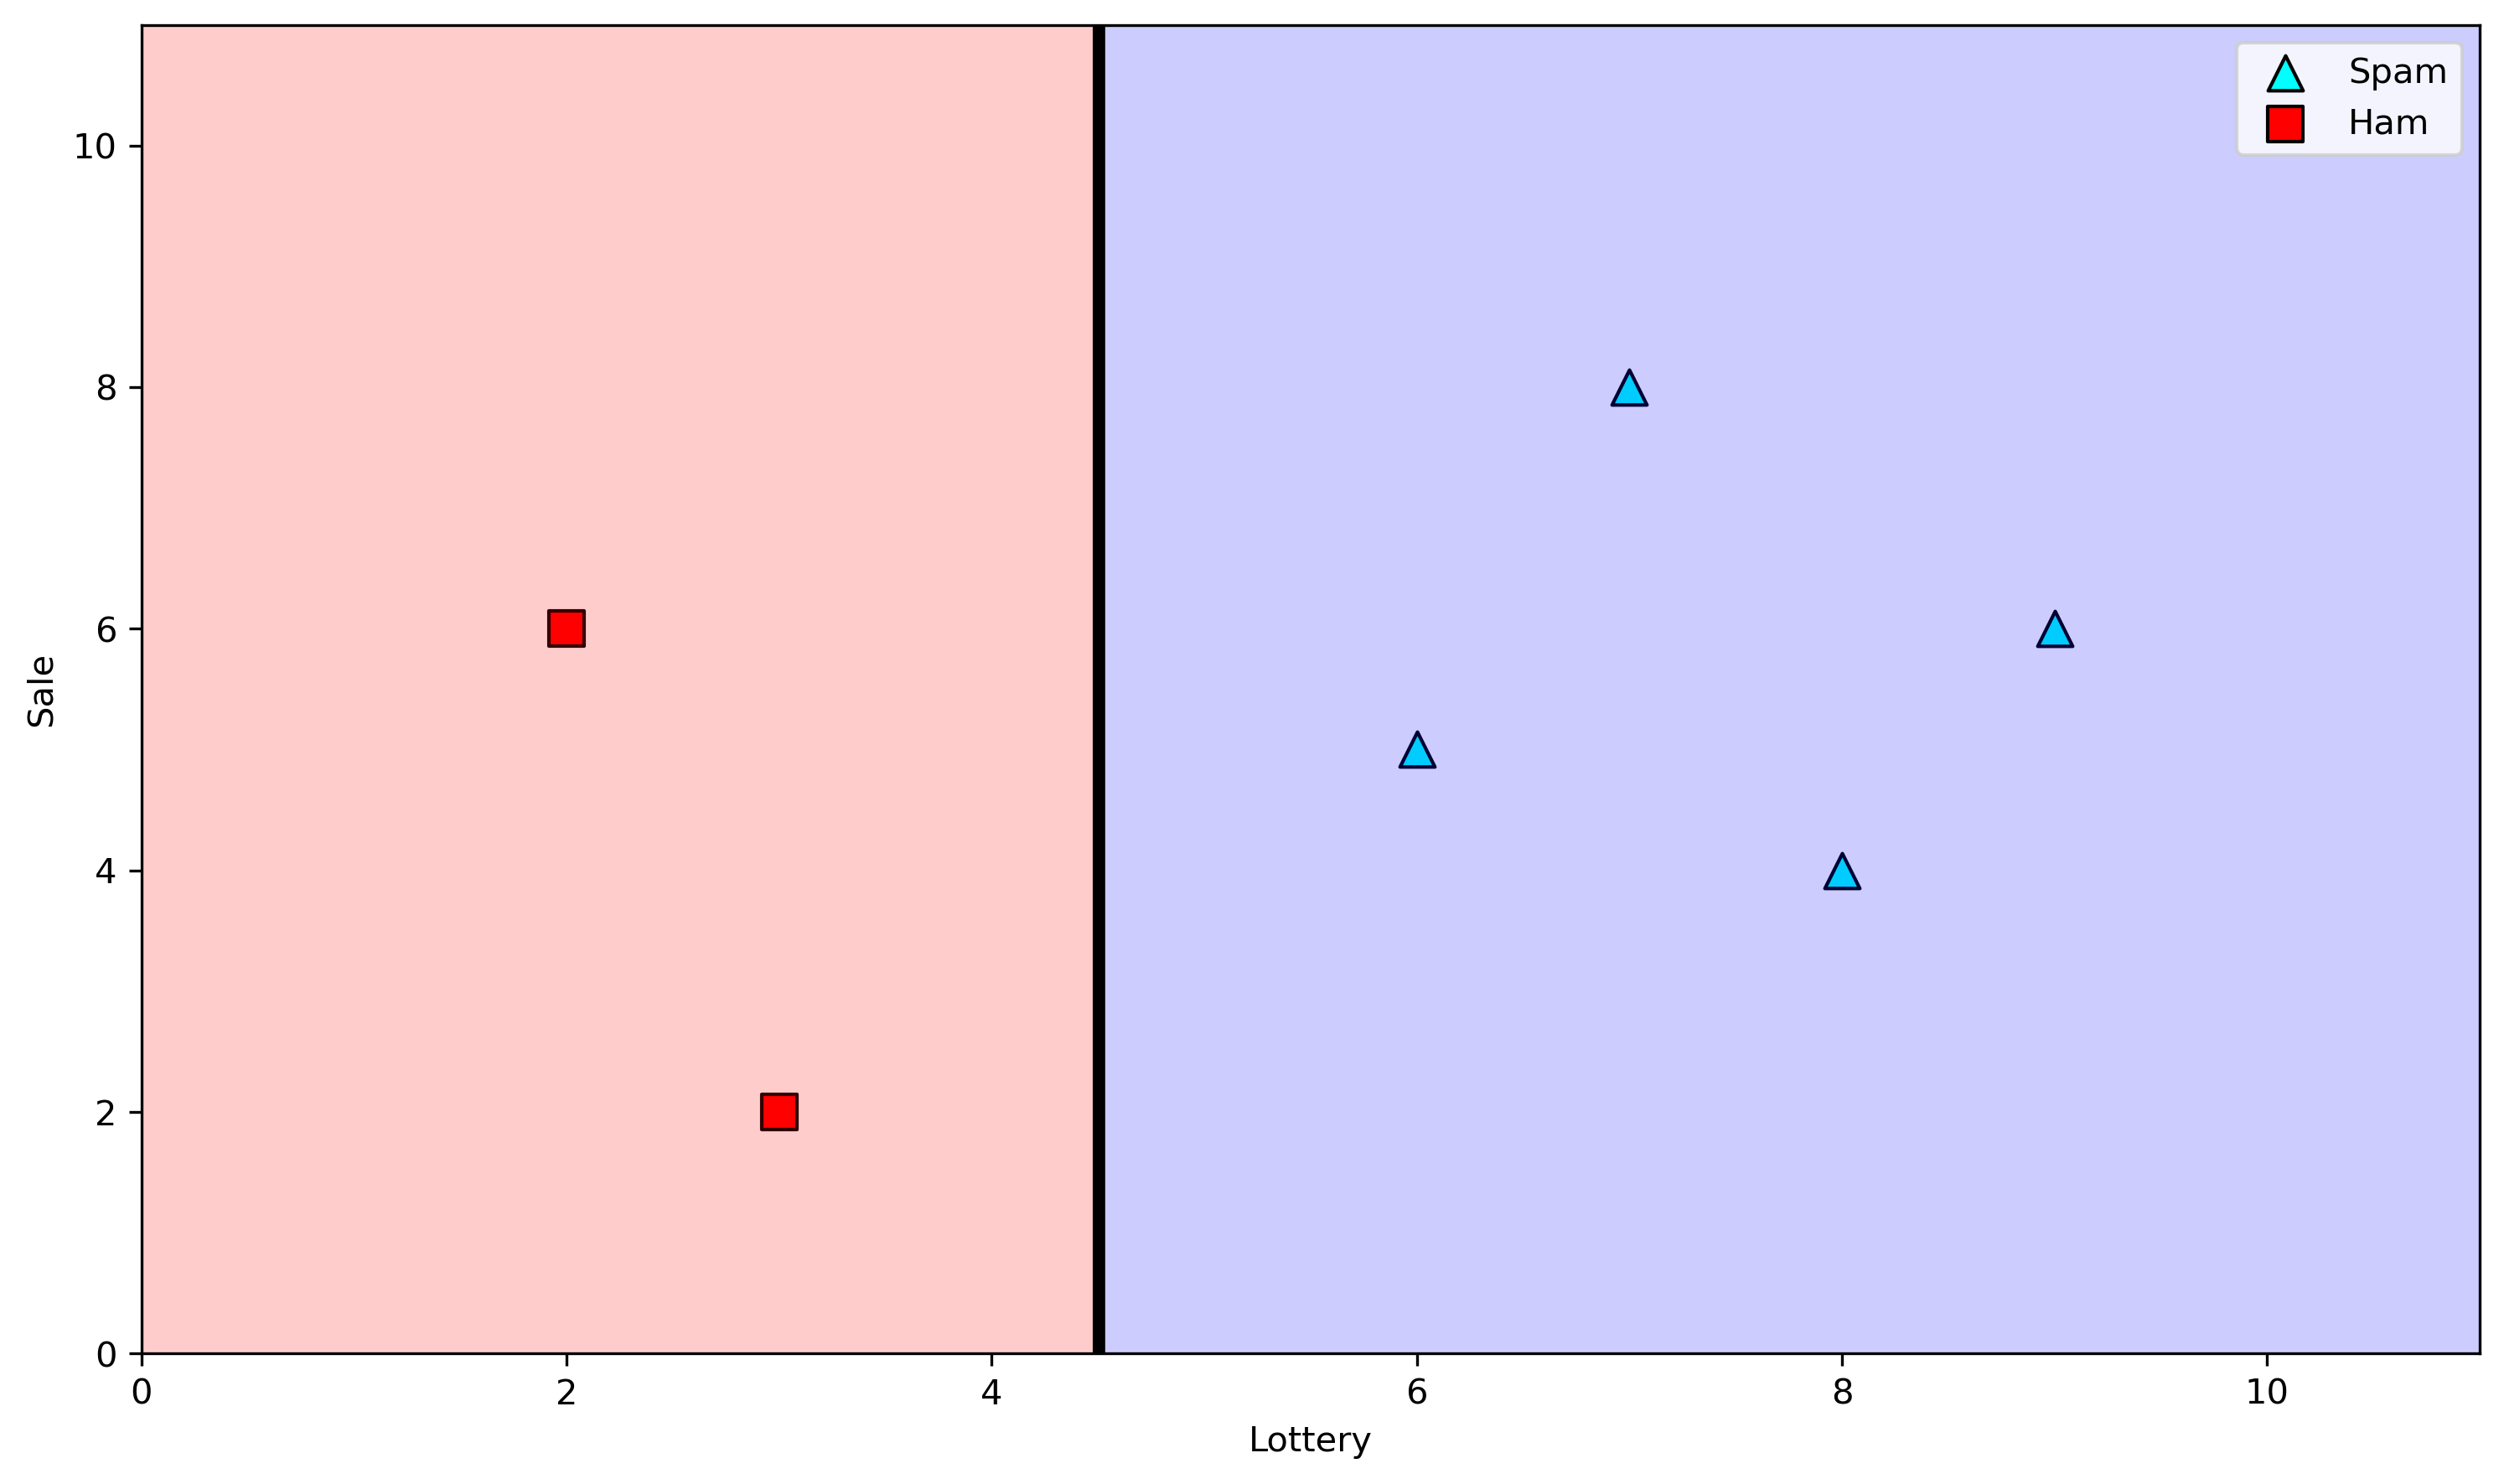

Weak learner 2 training accuracy: 1.0


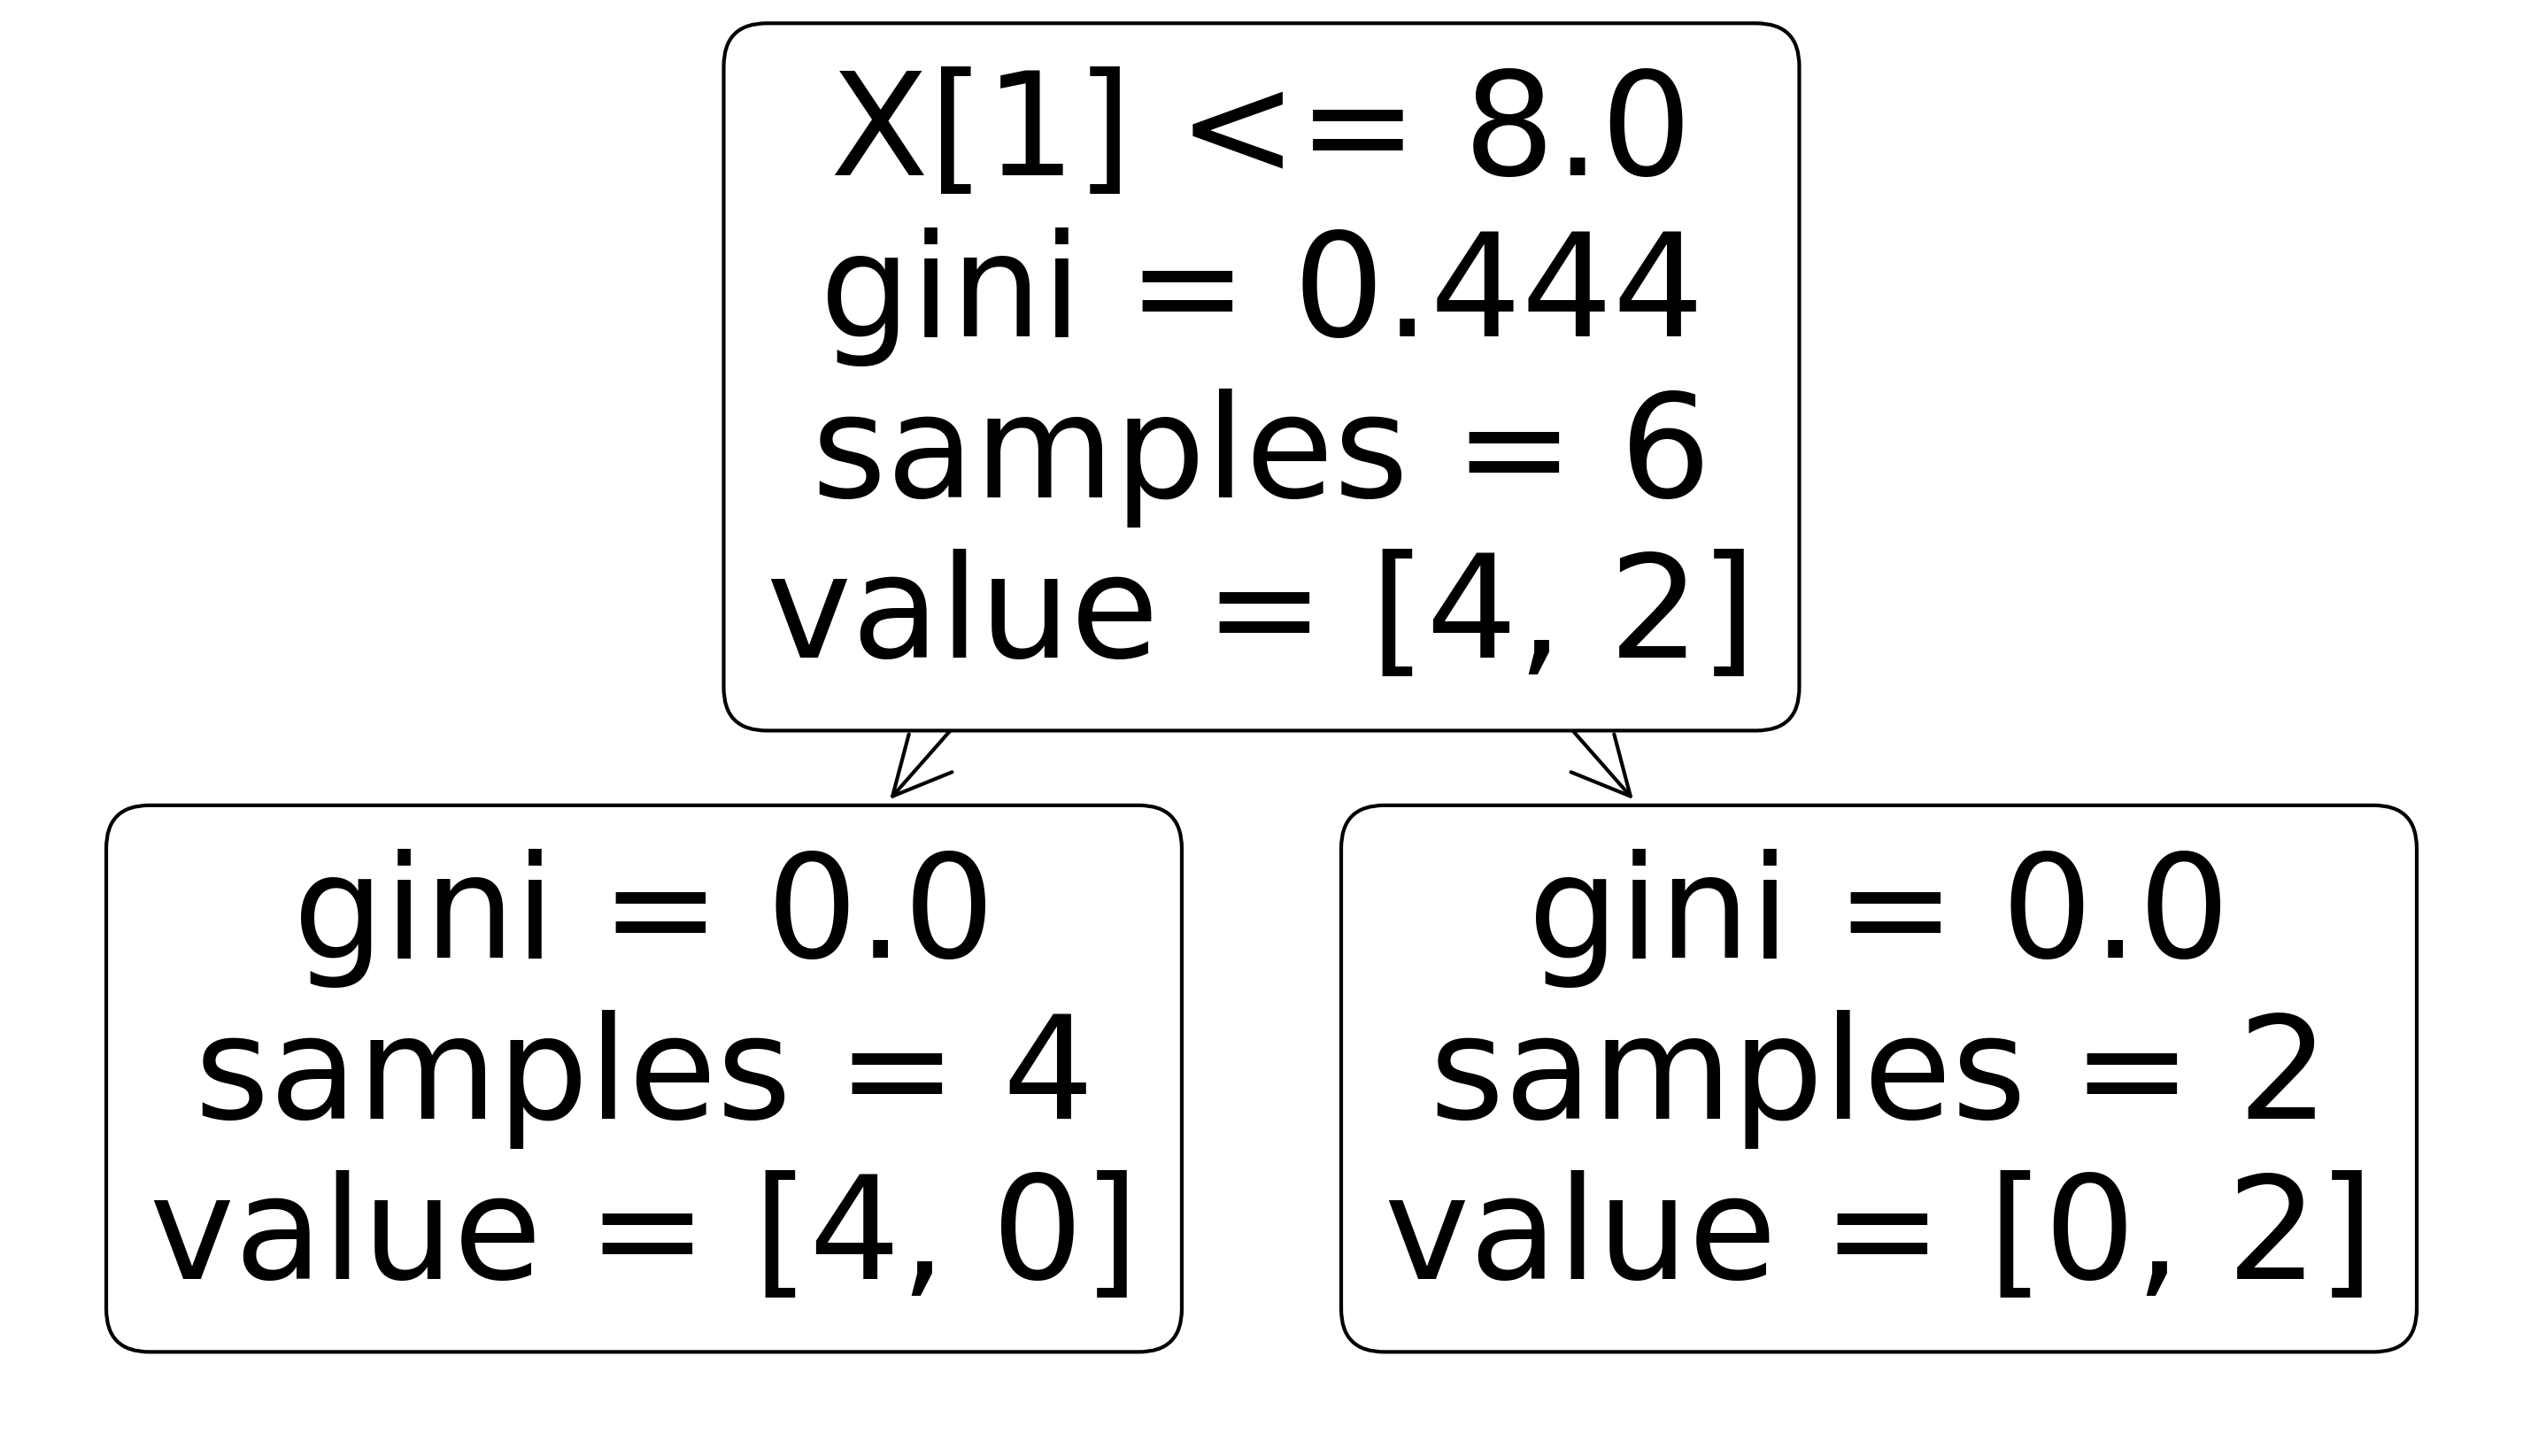

/Users/pankajksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


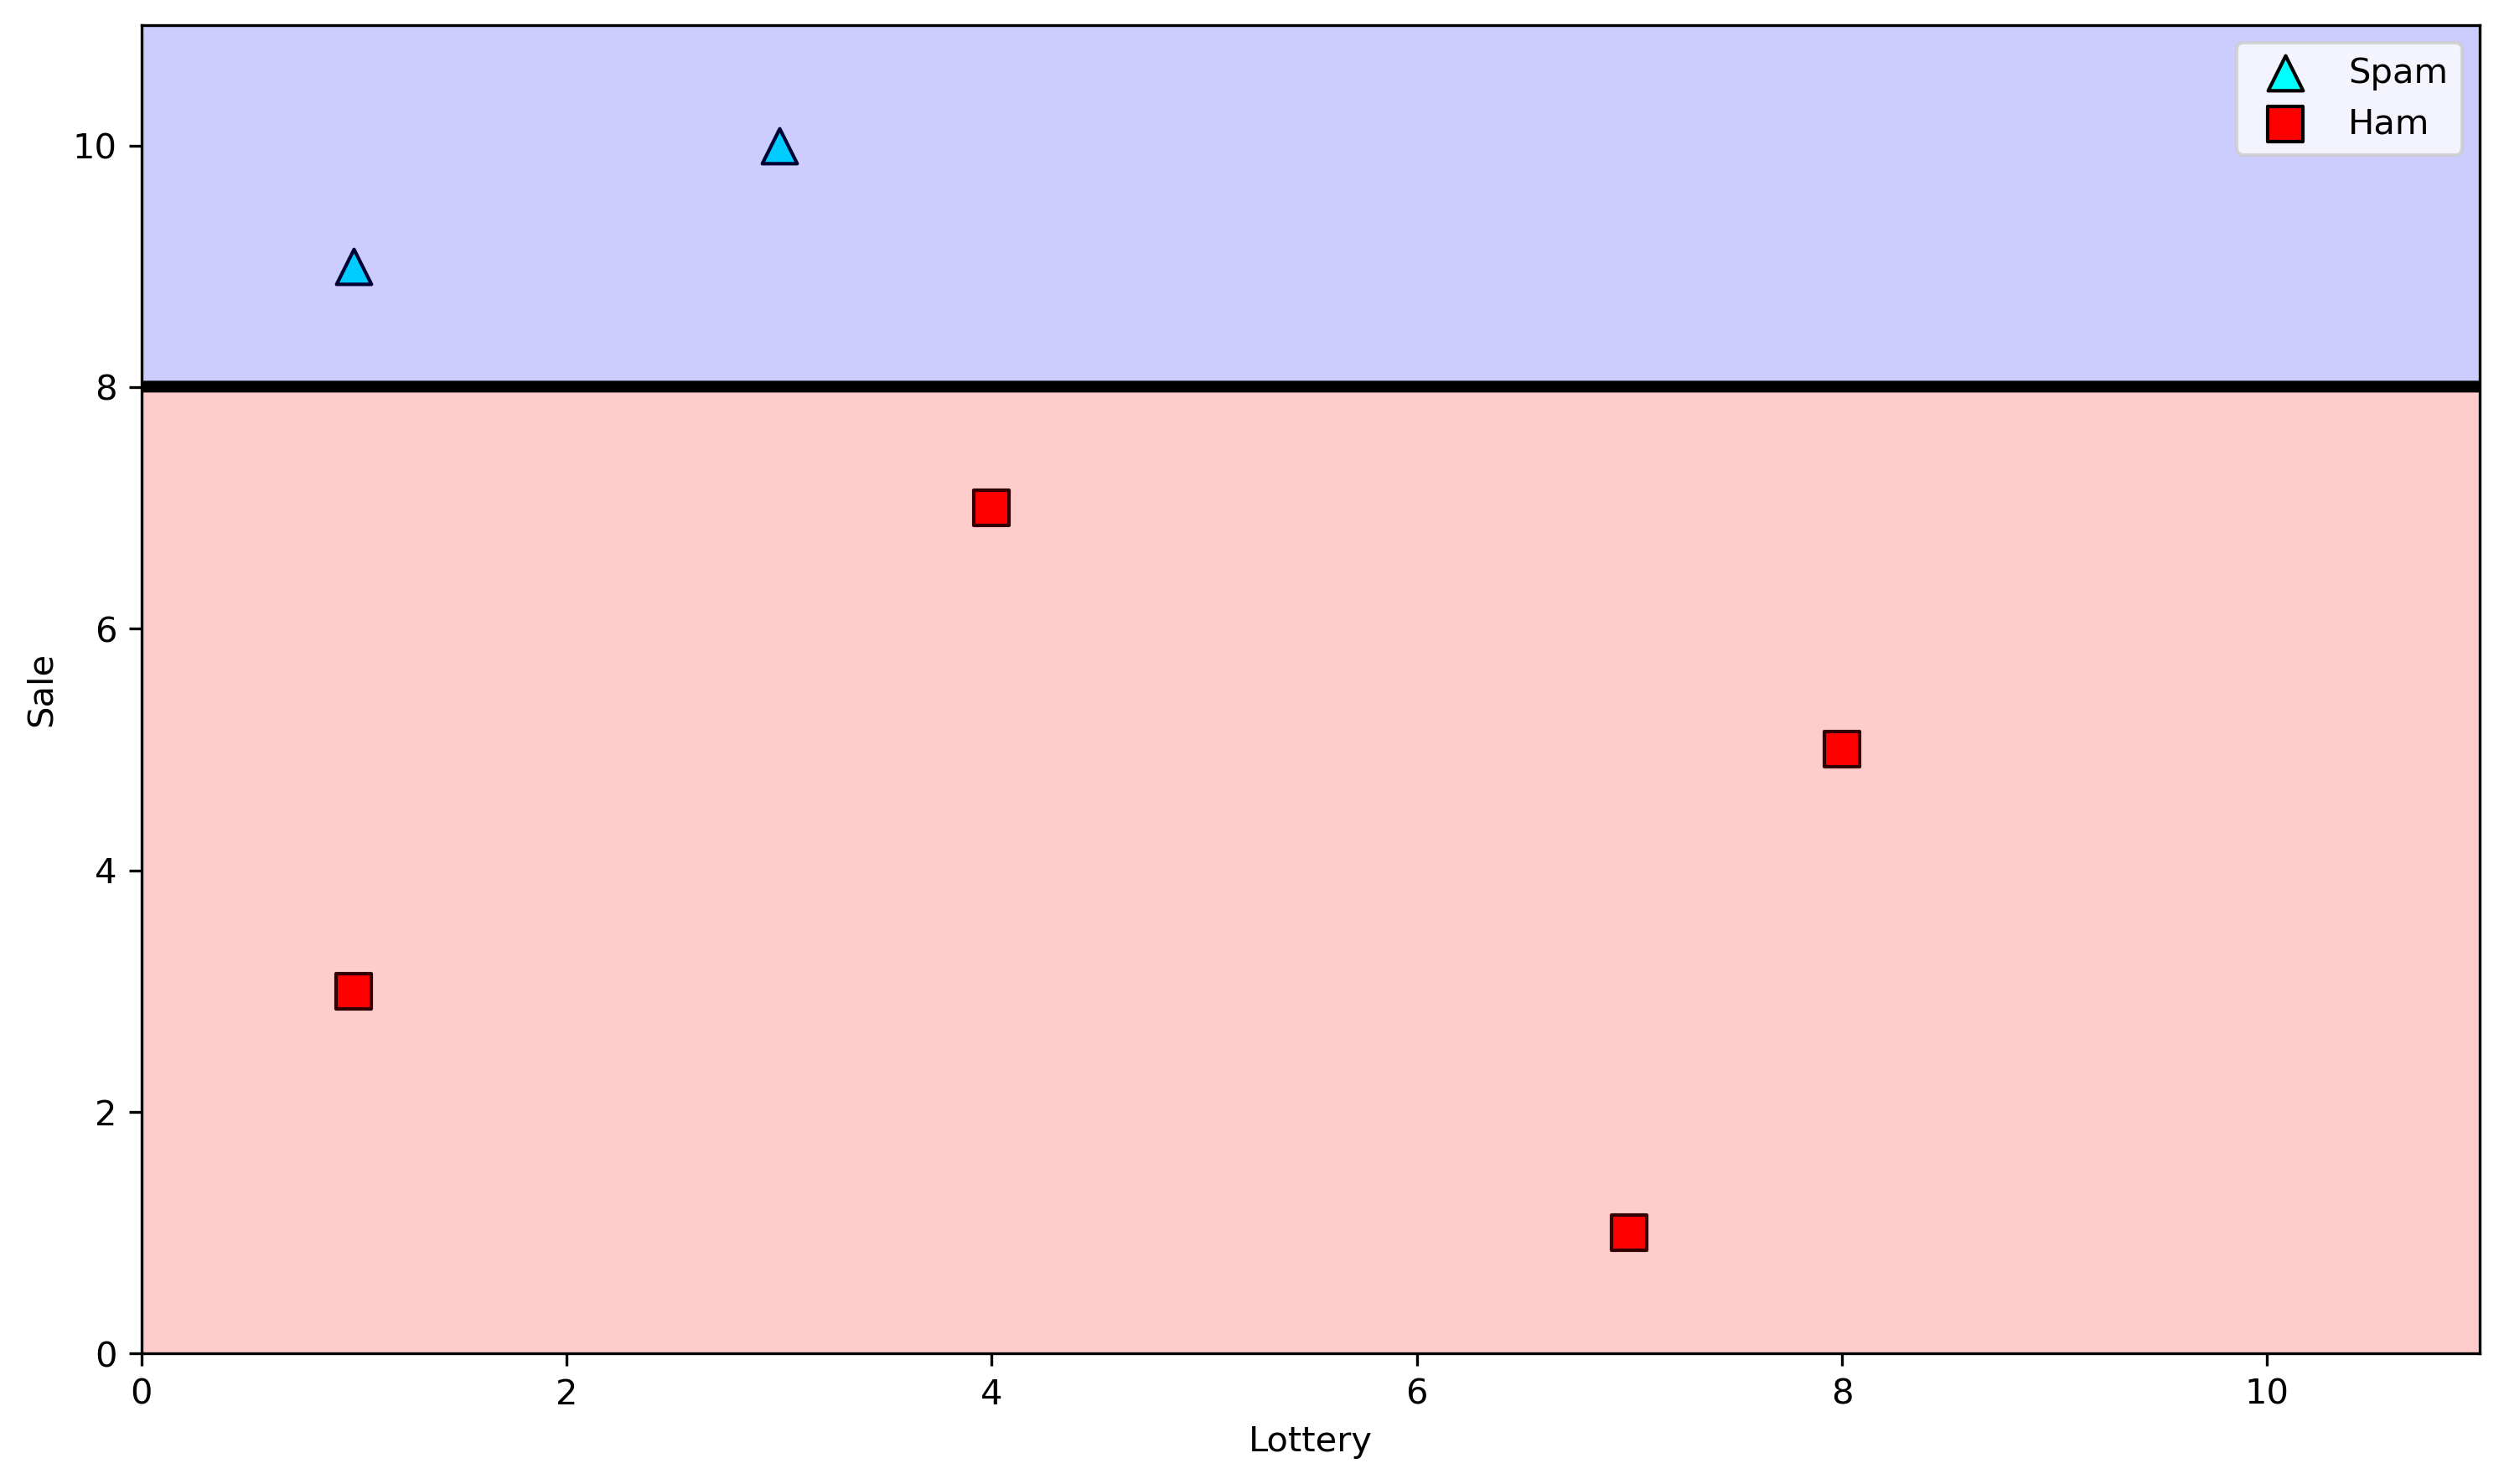

Weak learner 3 training accuracy: 0.8333333333333334


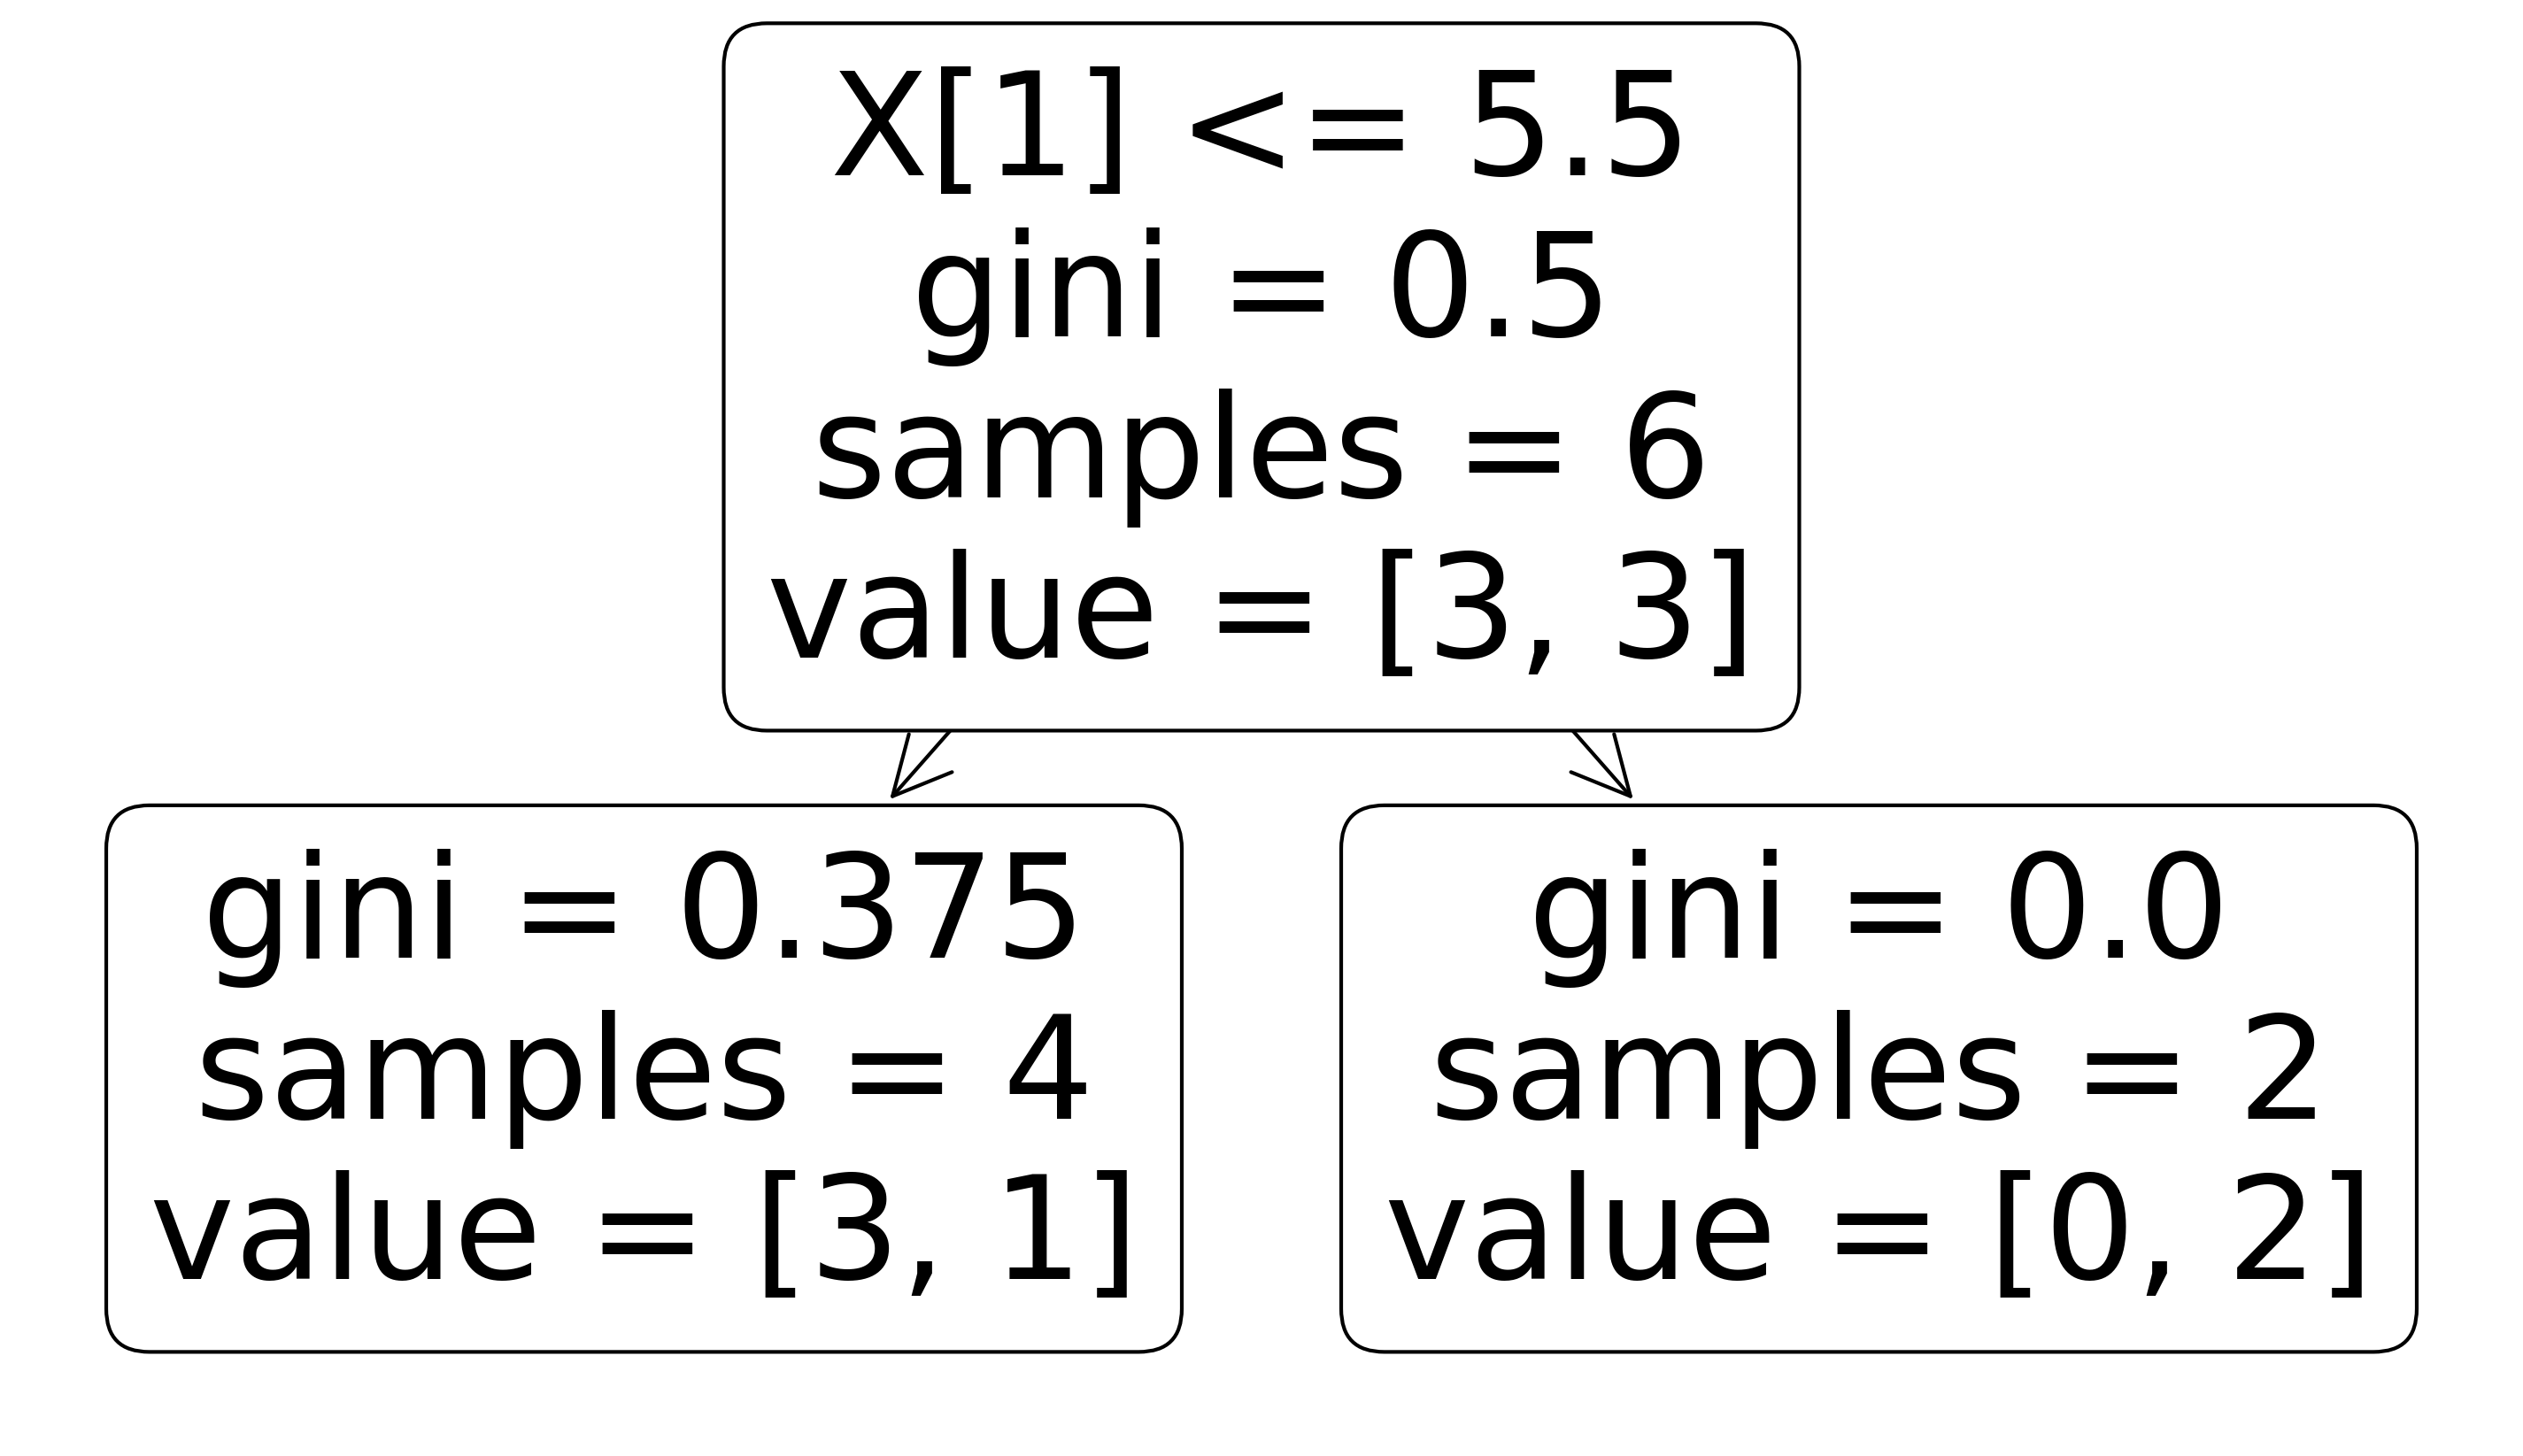

/Users/pankajksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


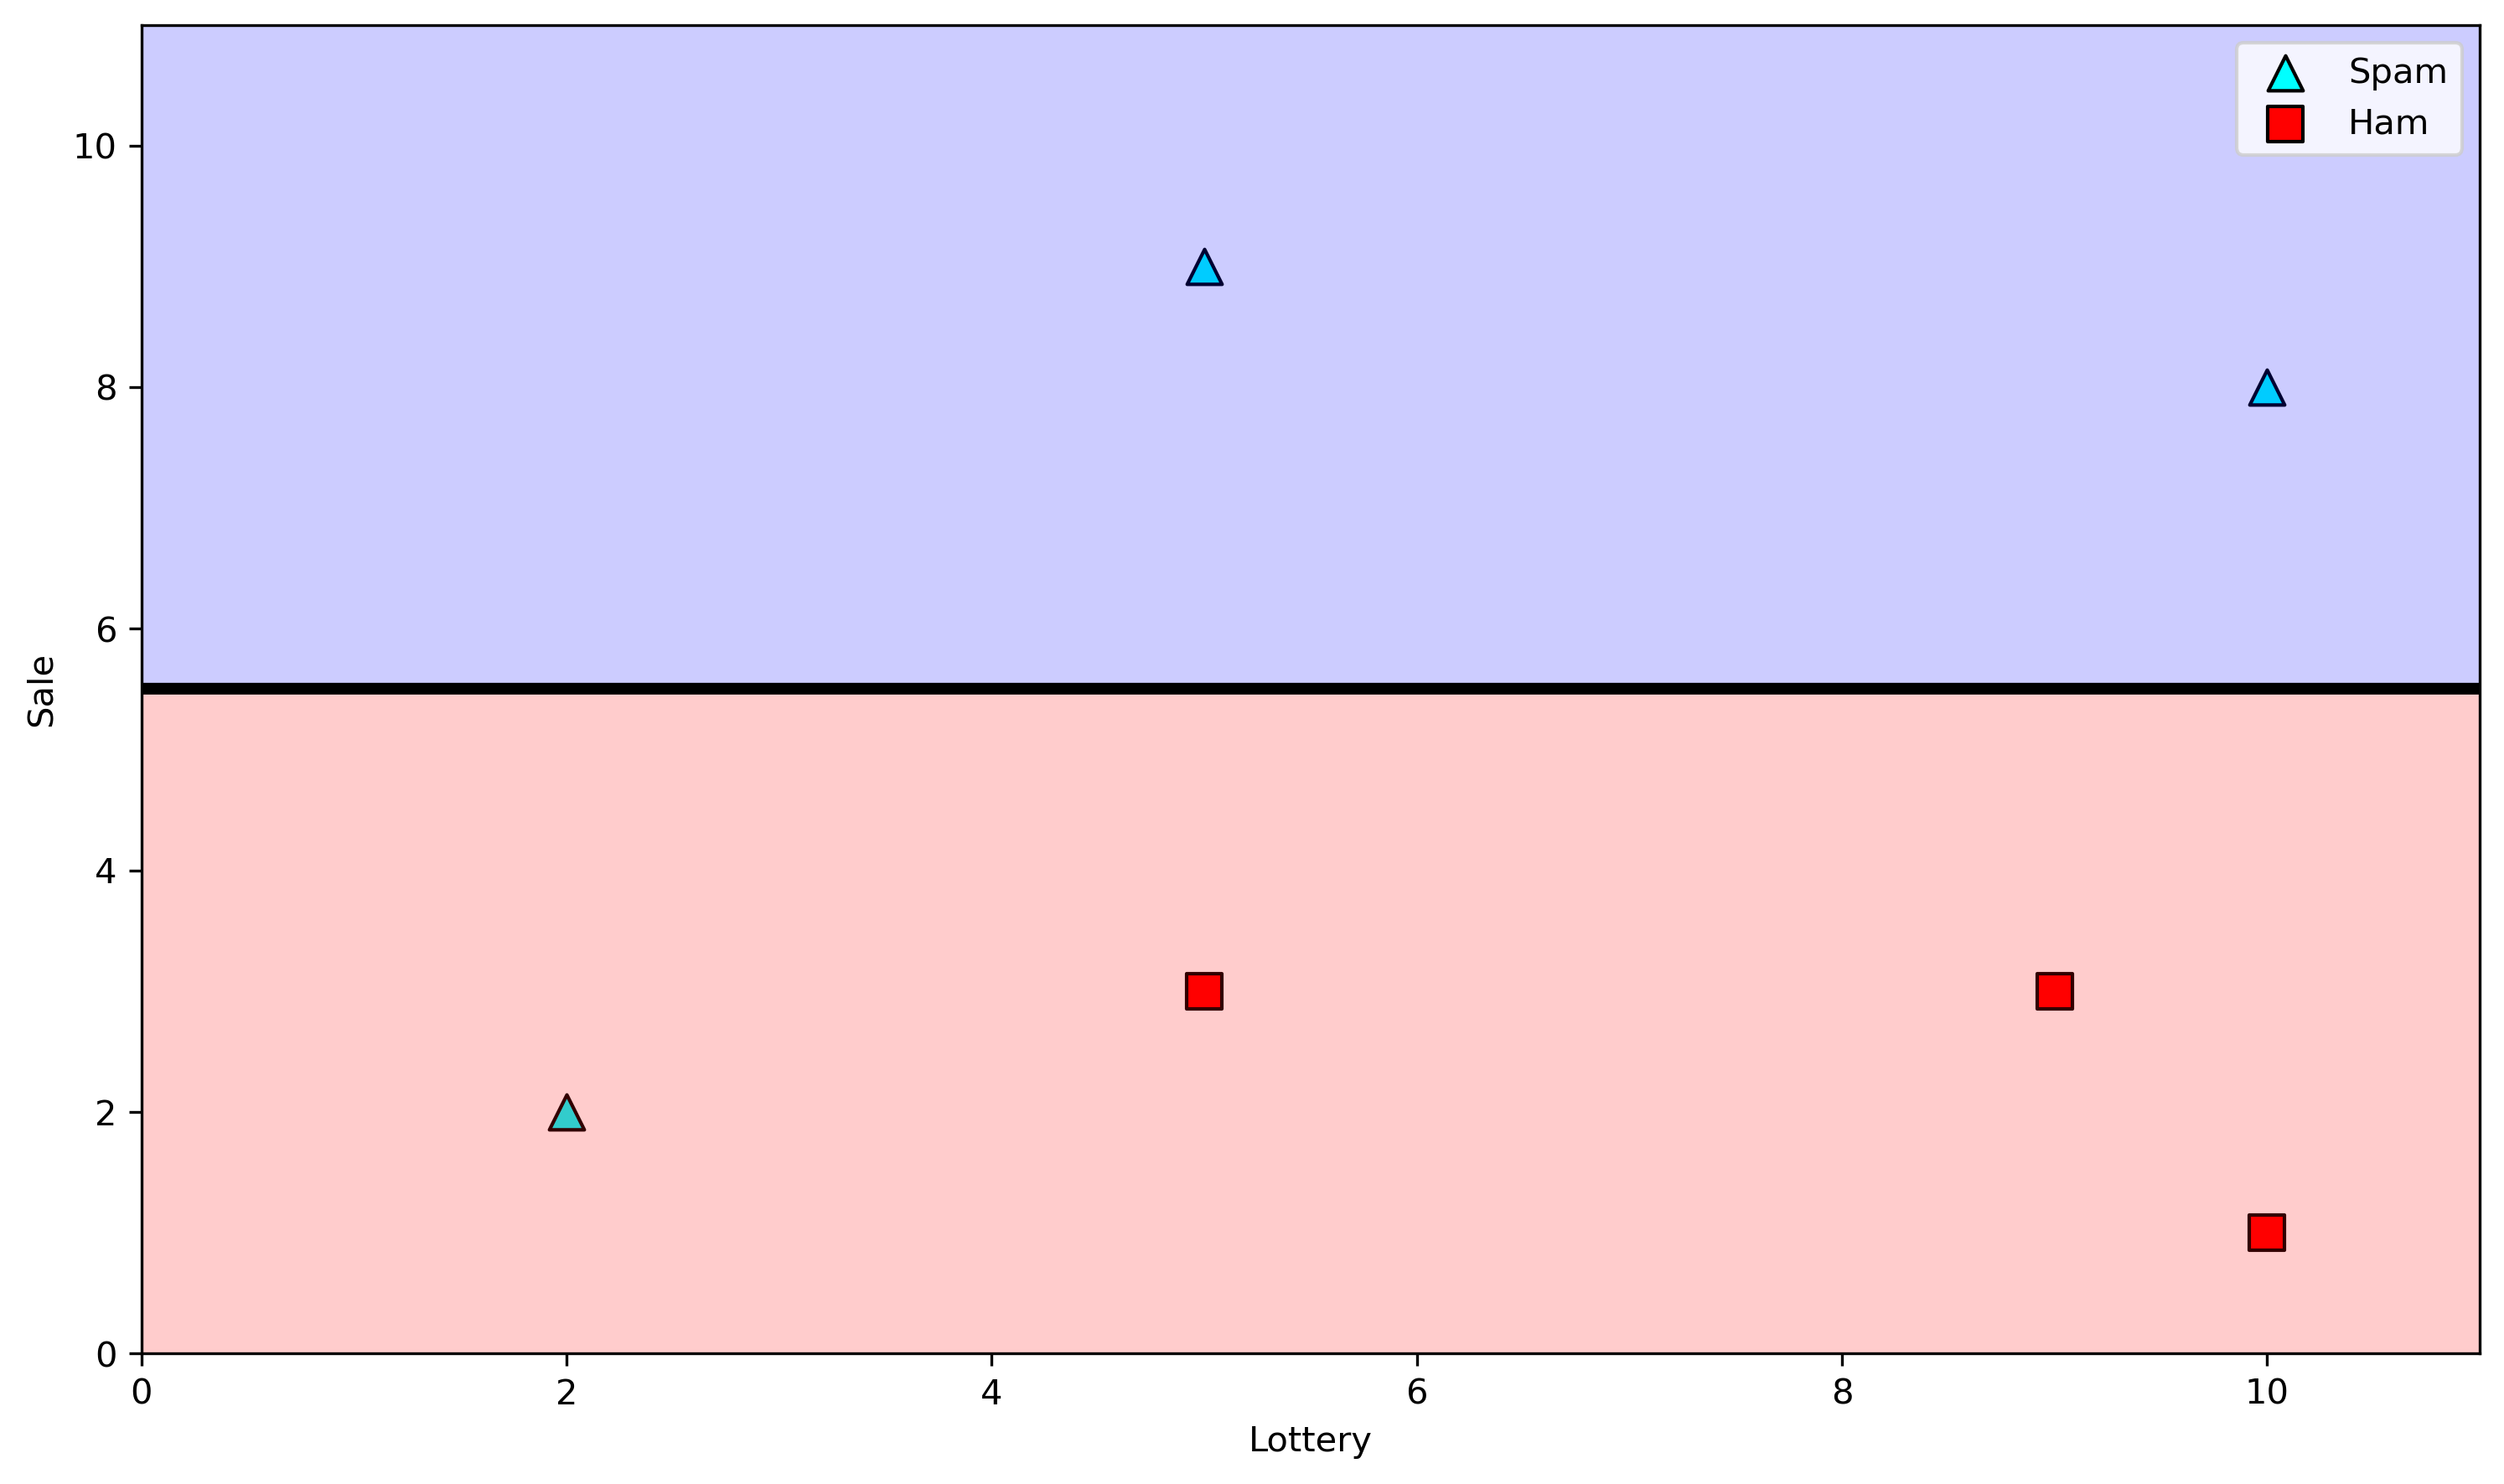

In [9]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(features1, labels1)
print("Weak learner 1 training accuracy:", dt1.score(features1, labels1))
tree.plot_tree(dt1, rounded=True)
plt.show()
plot_model(features1, labels1, dt1)

dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(features2, labels2)
print("Weak learner 2 training accuracy:", dt2.score(features2, labels2))
tree.plot_tree(dt2, rounded=True)
plt.show()
plot_model(features2, labels2, dt2)

dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(features3, labels3)
print("Weak learner 3 training accuracy:", dt3.score(features3, labels3))
tree.plot_tree(dt3, rounded=True)
plt.show()
plot_model(features3, labels3, dt3)

## Gradient Boosting
> “Decision trees for regression” in which we studied the level of engagement of certain users with an app. The feature is the age of the user, and the label is the number of days that the user engages with the app

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn import tree

In [11]:
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

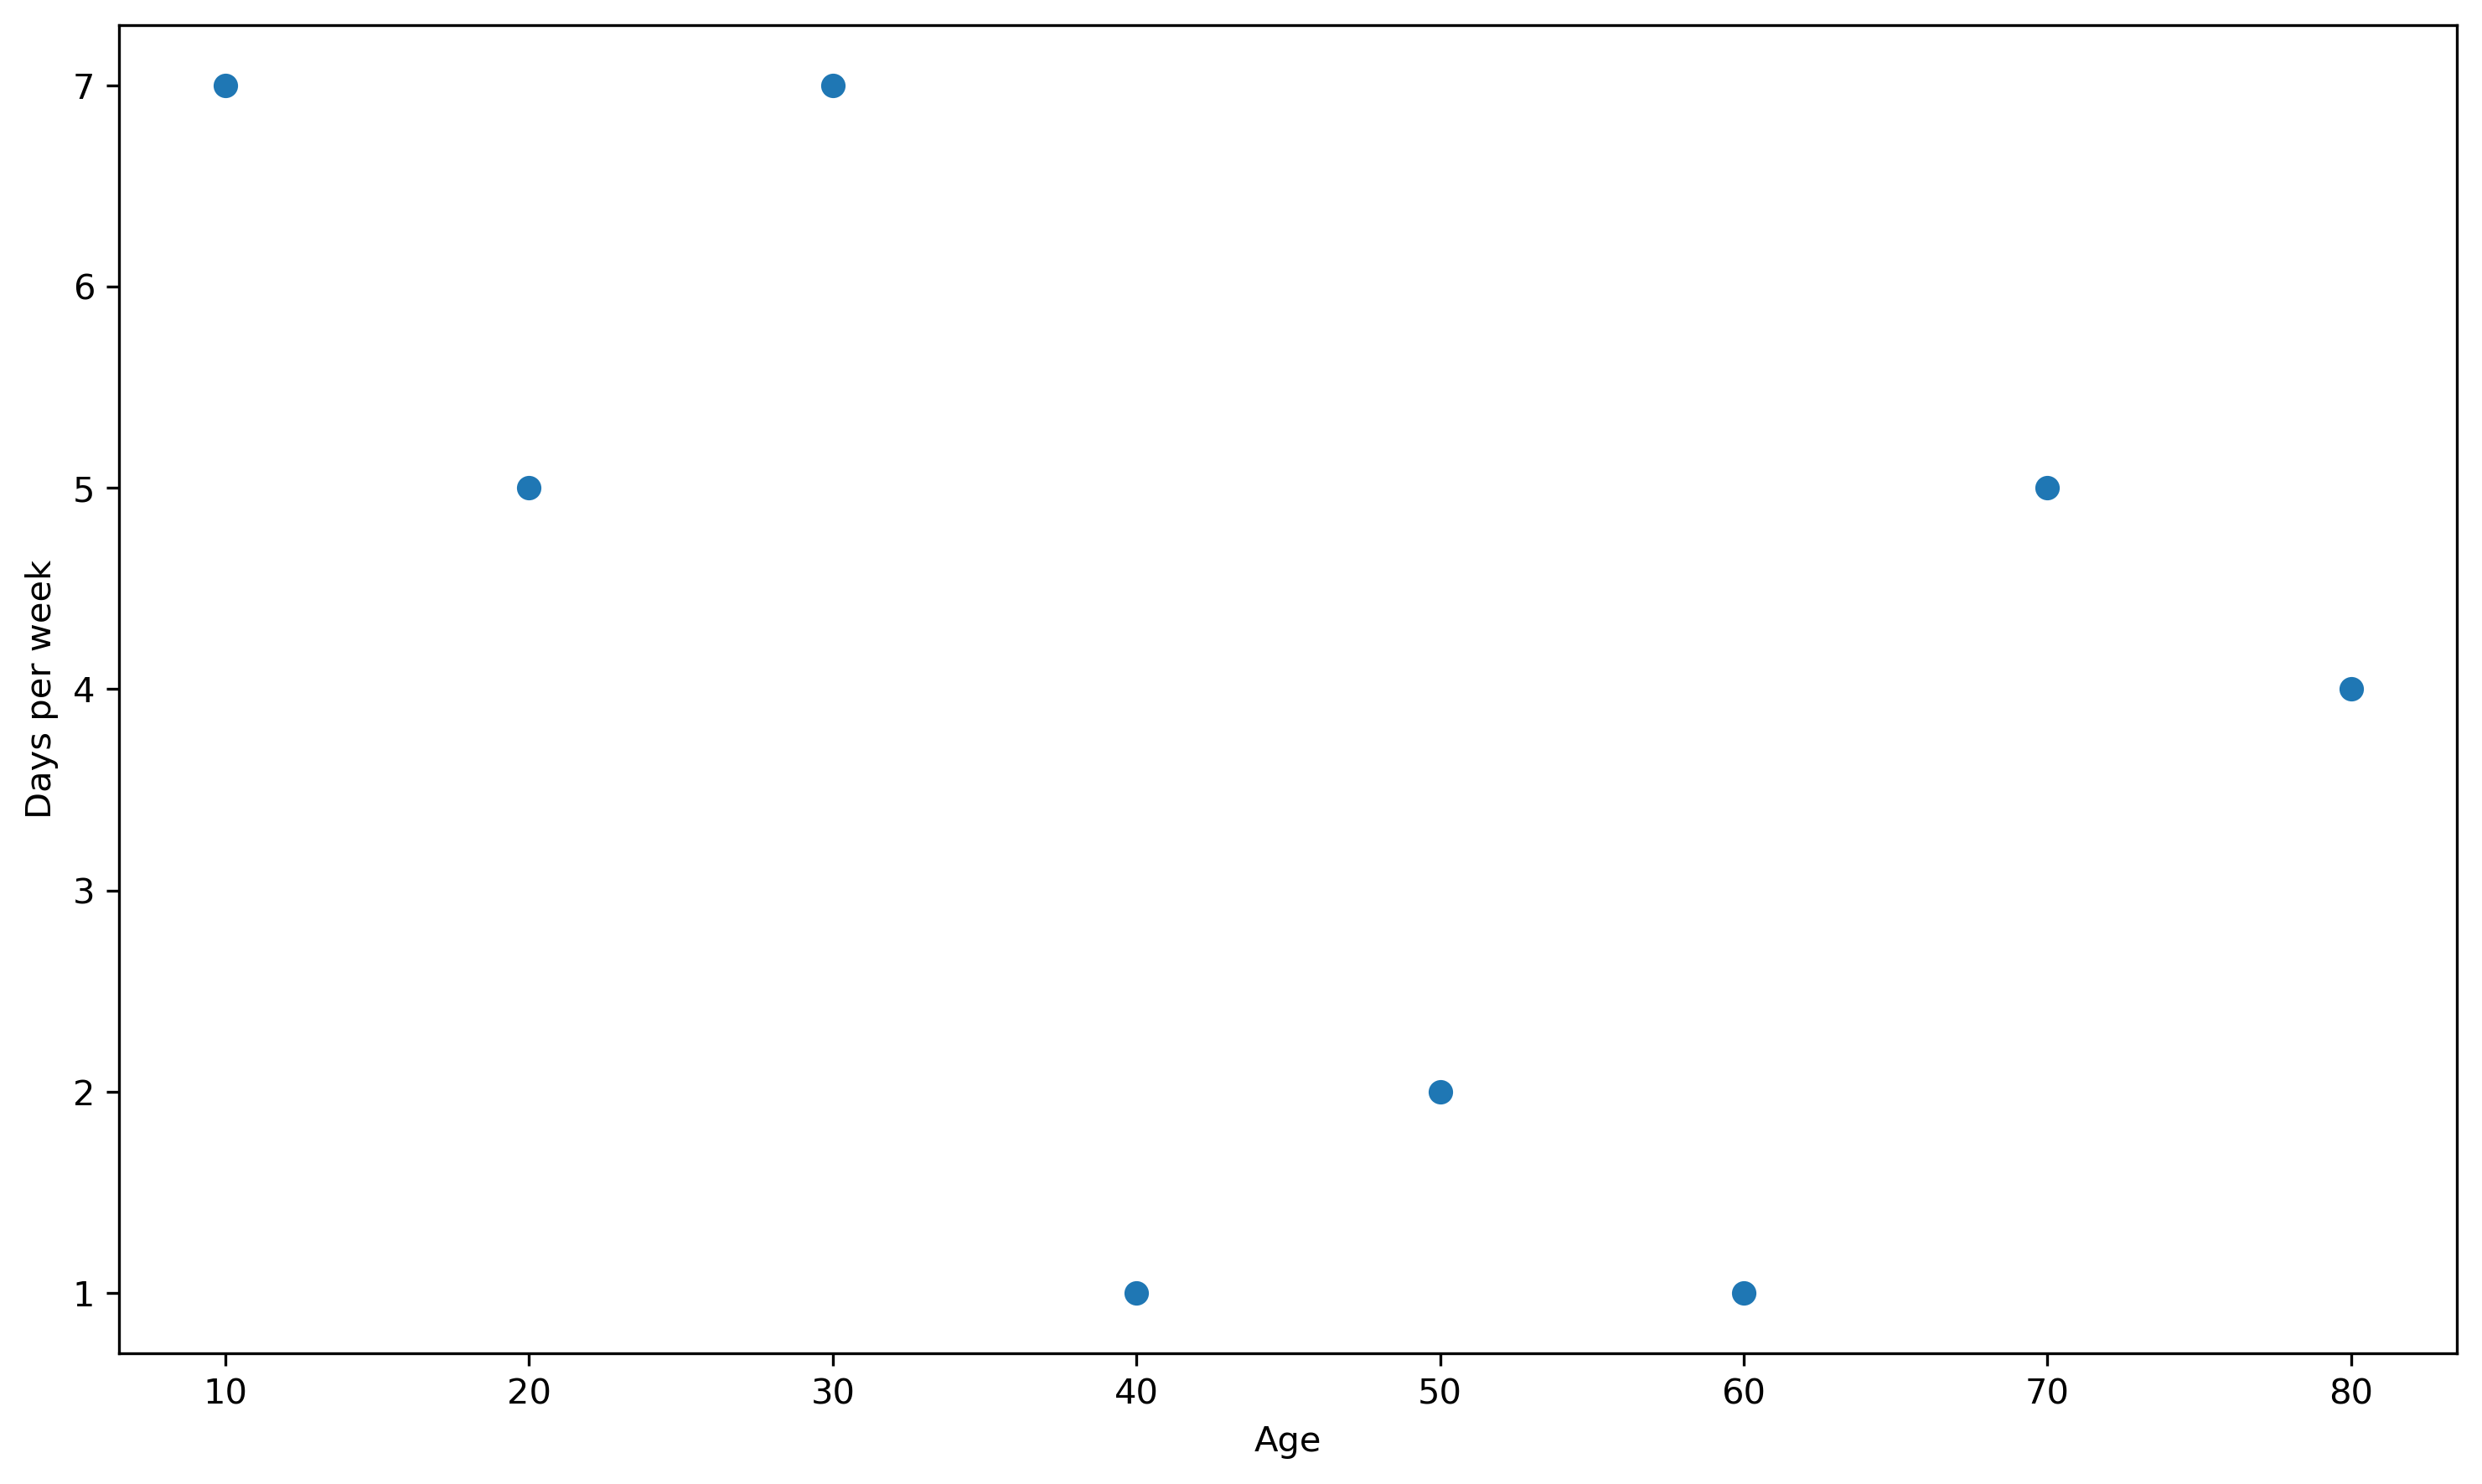

In [12]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

# Fitting a Decision tree

In [13]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=2)
decision_tree_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

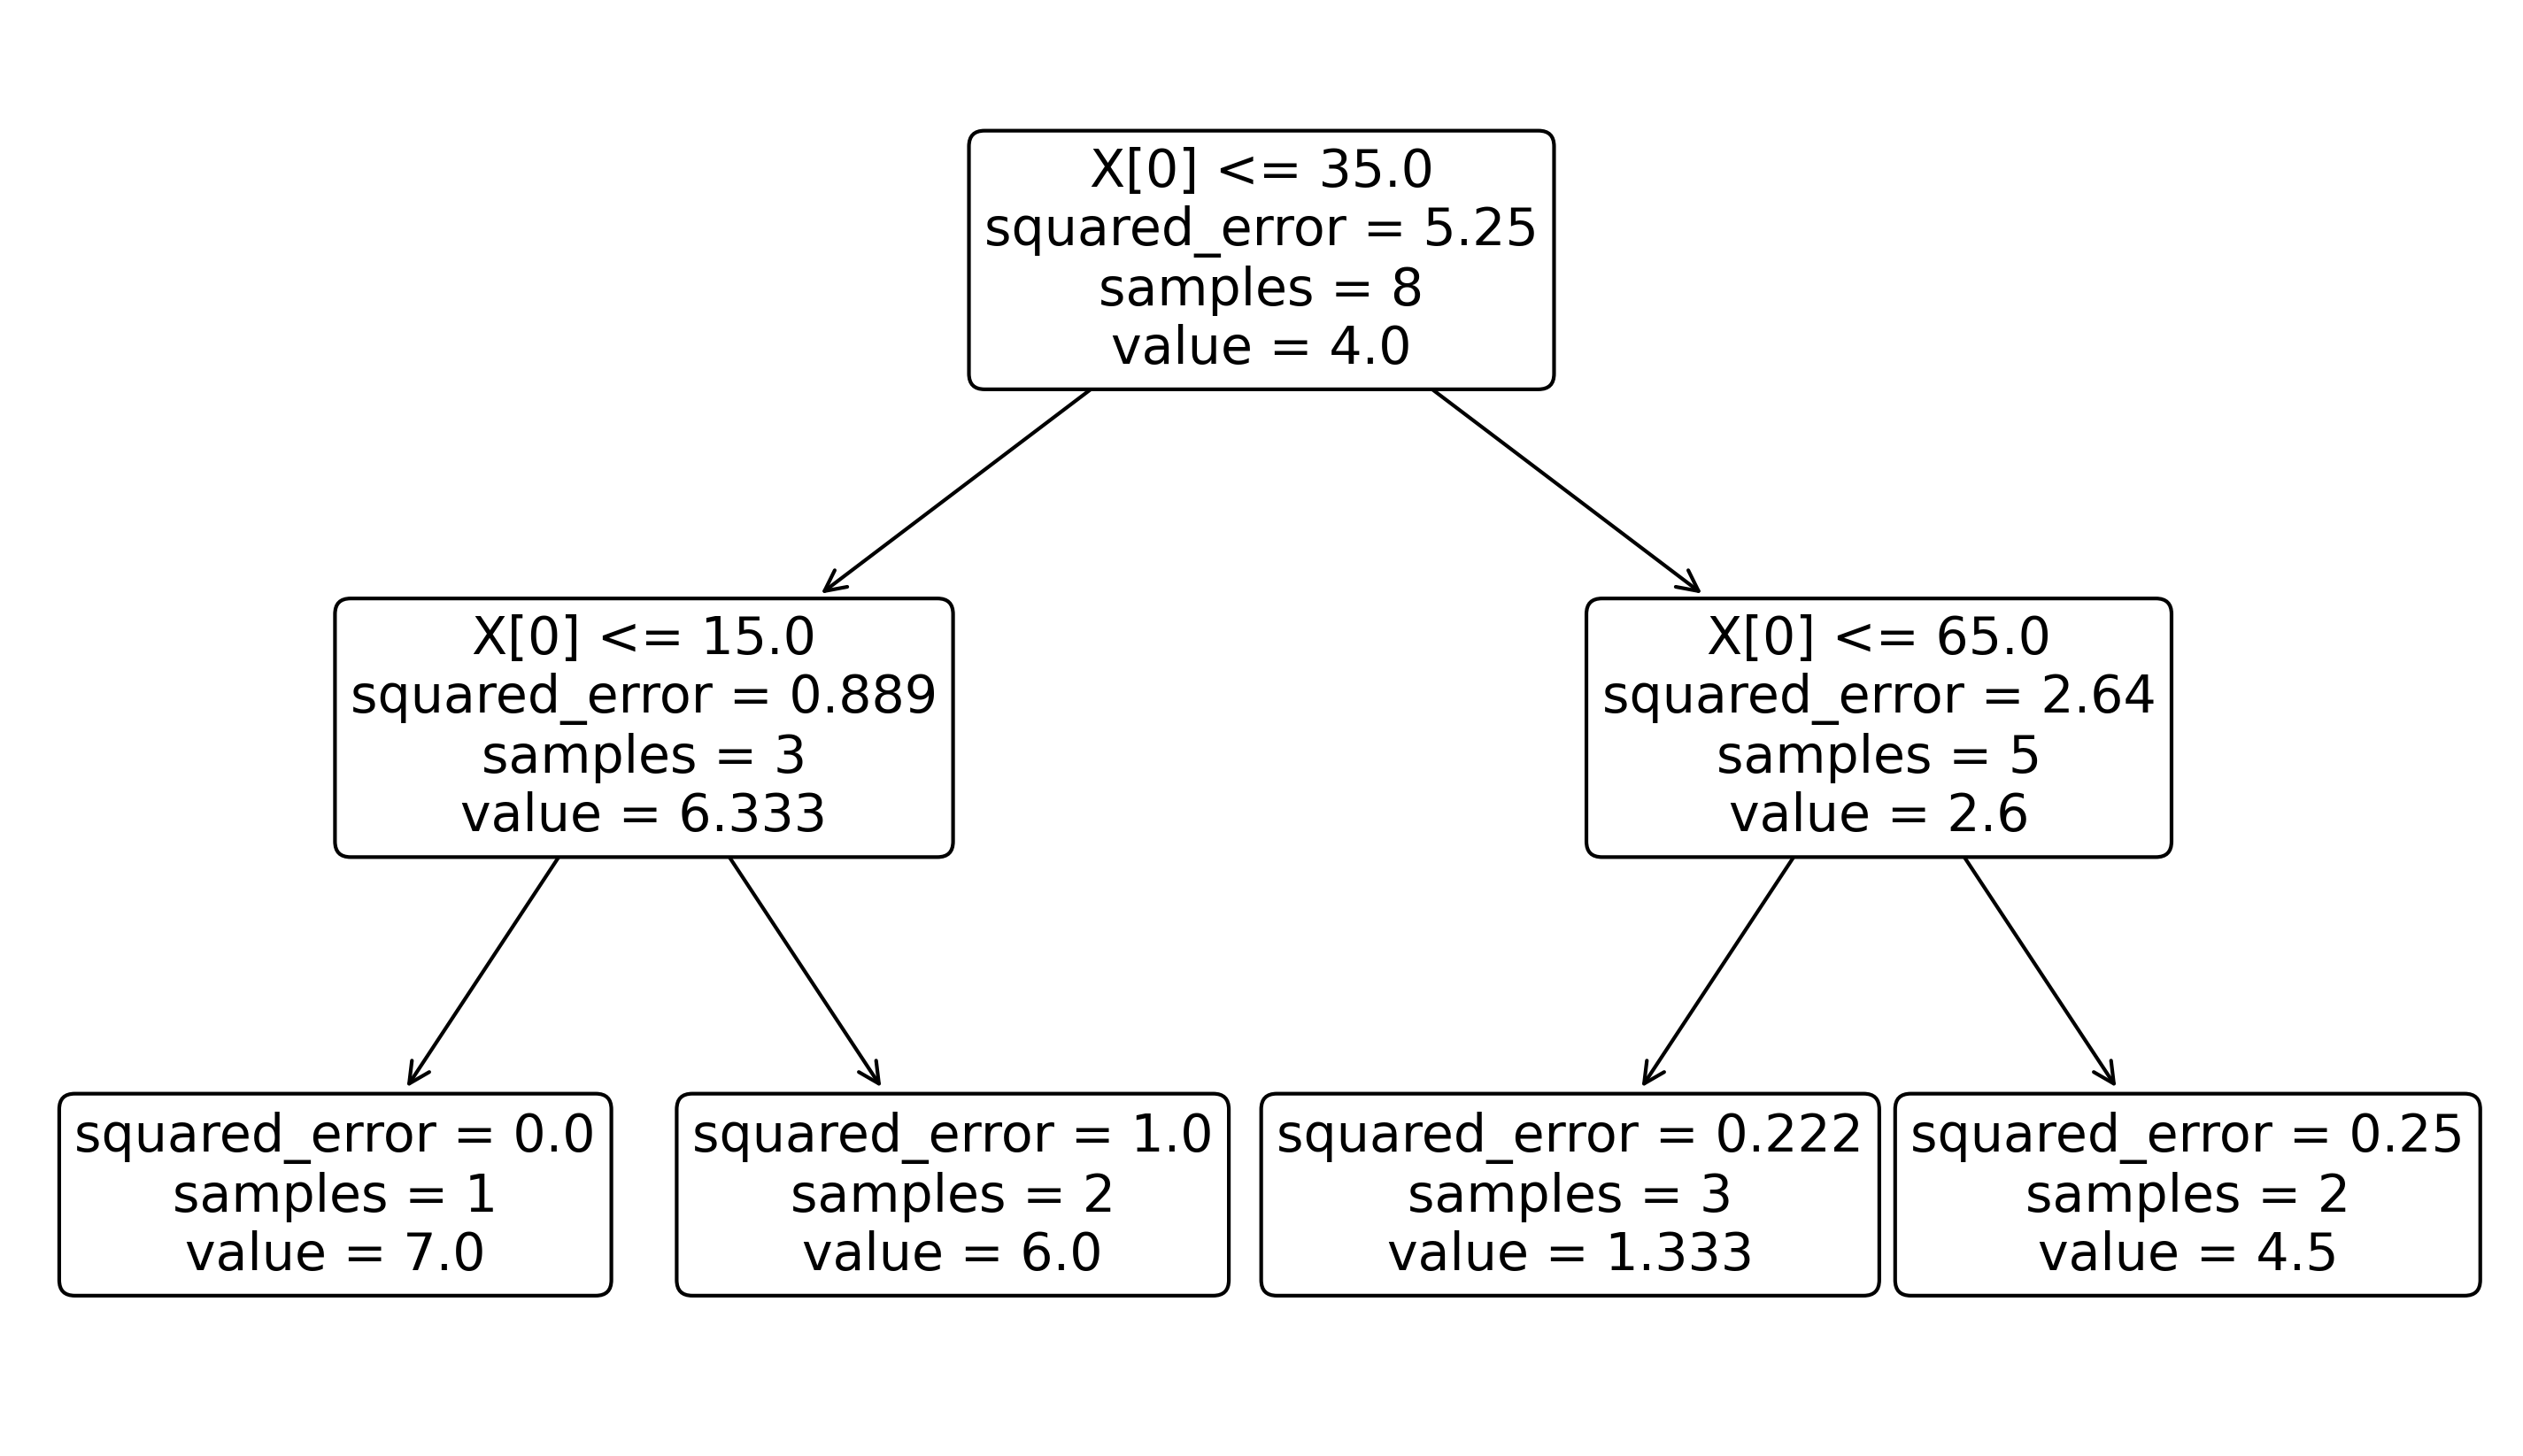

In [14]:
tree.plot_tree(decision_tree_regressor, rounded=True);

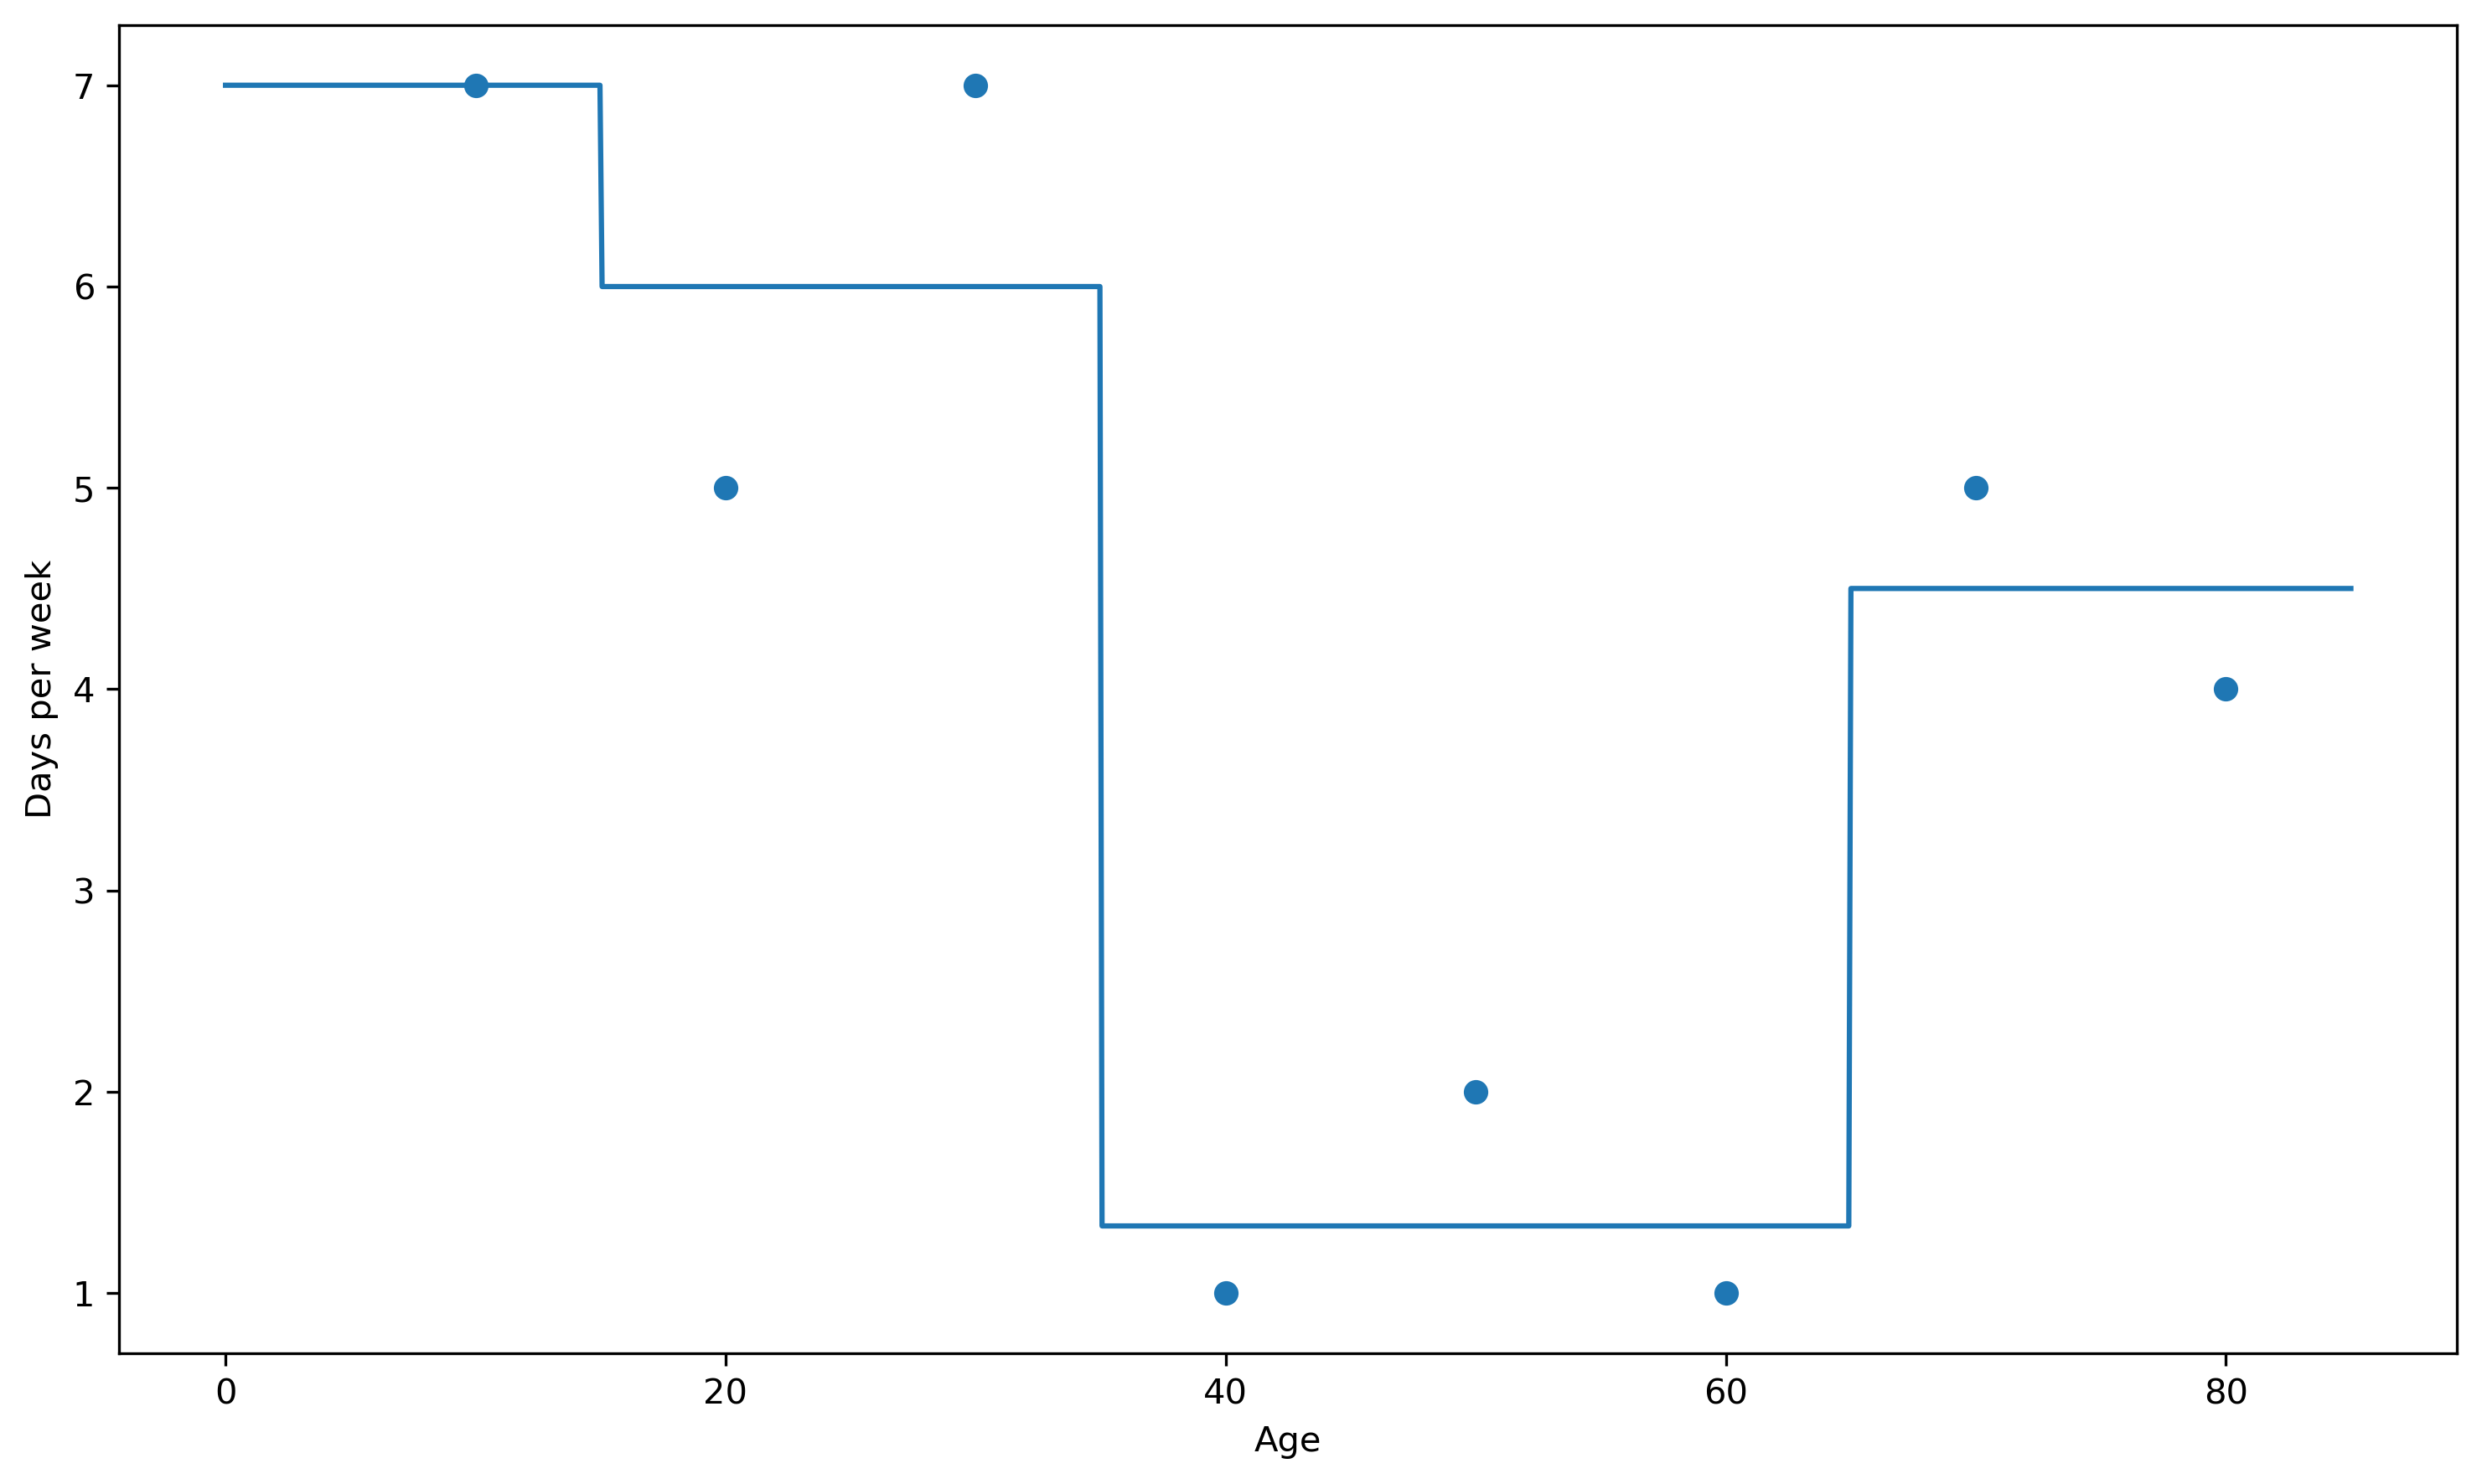

In [15]:
plot_regressor(decision_tree_regressor, features, labels)

# Gradient Boosting

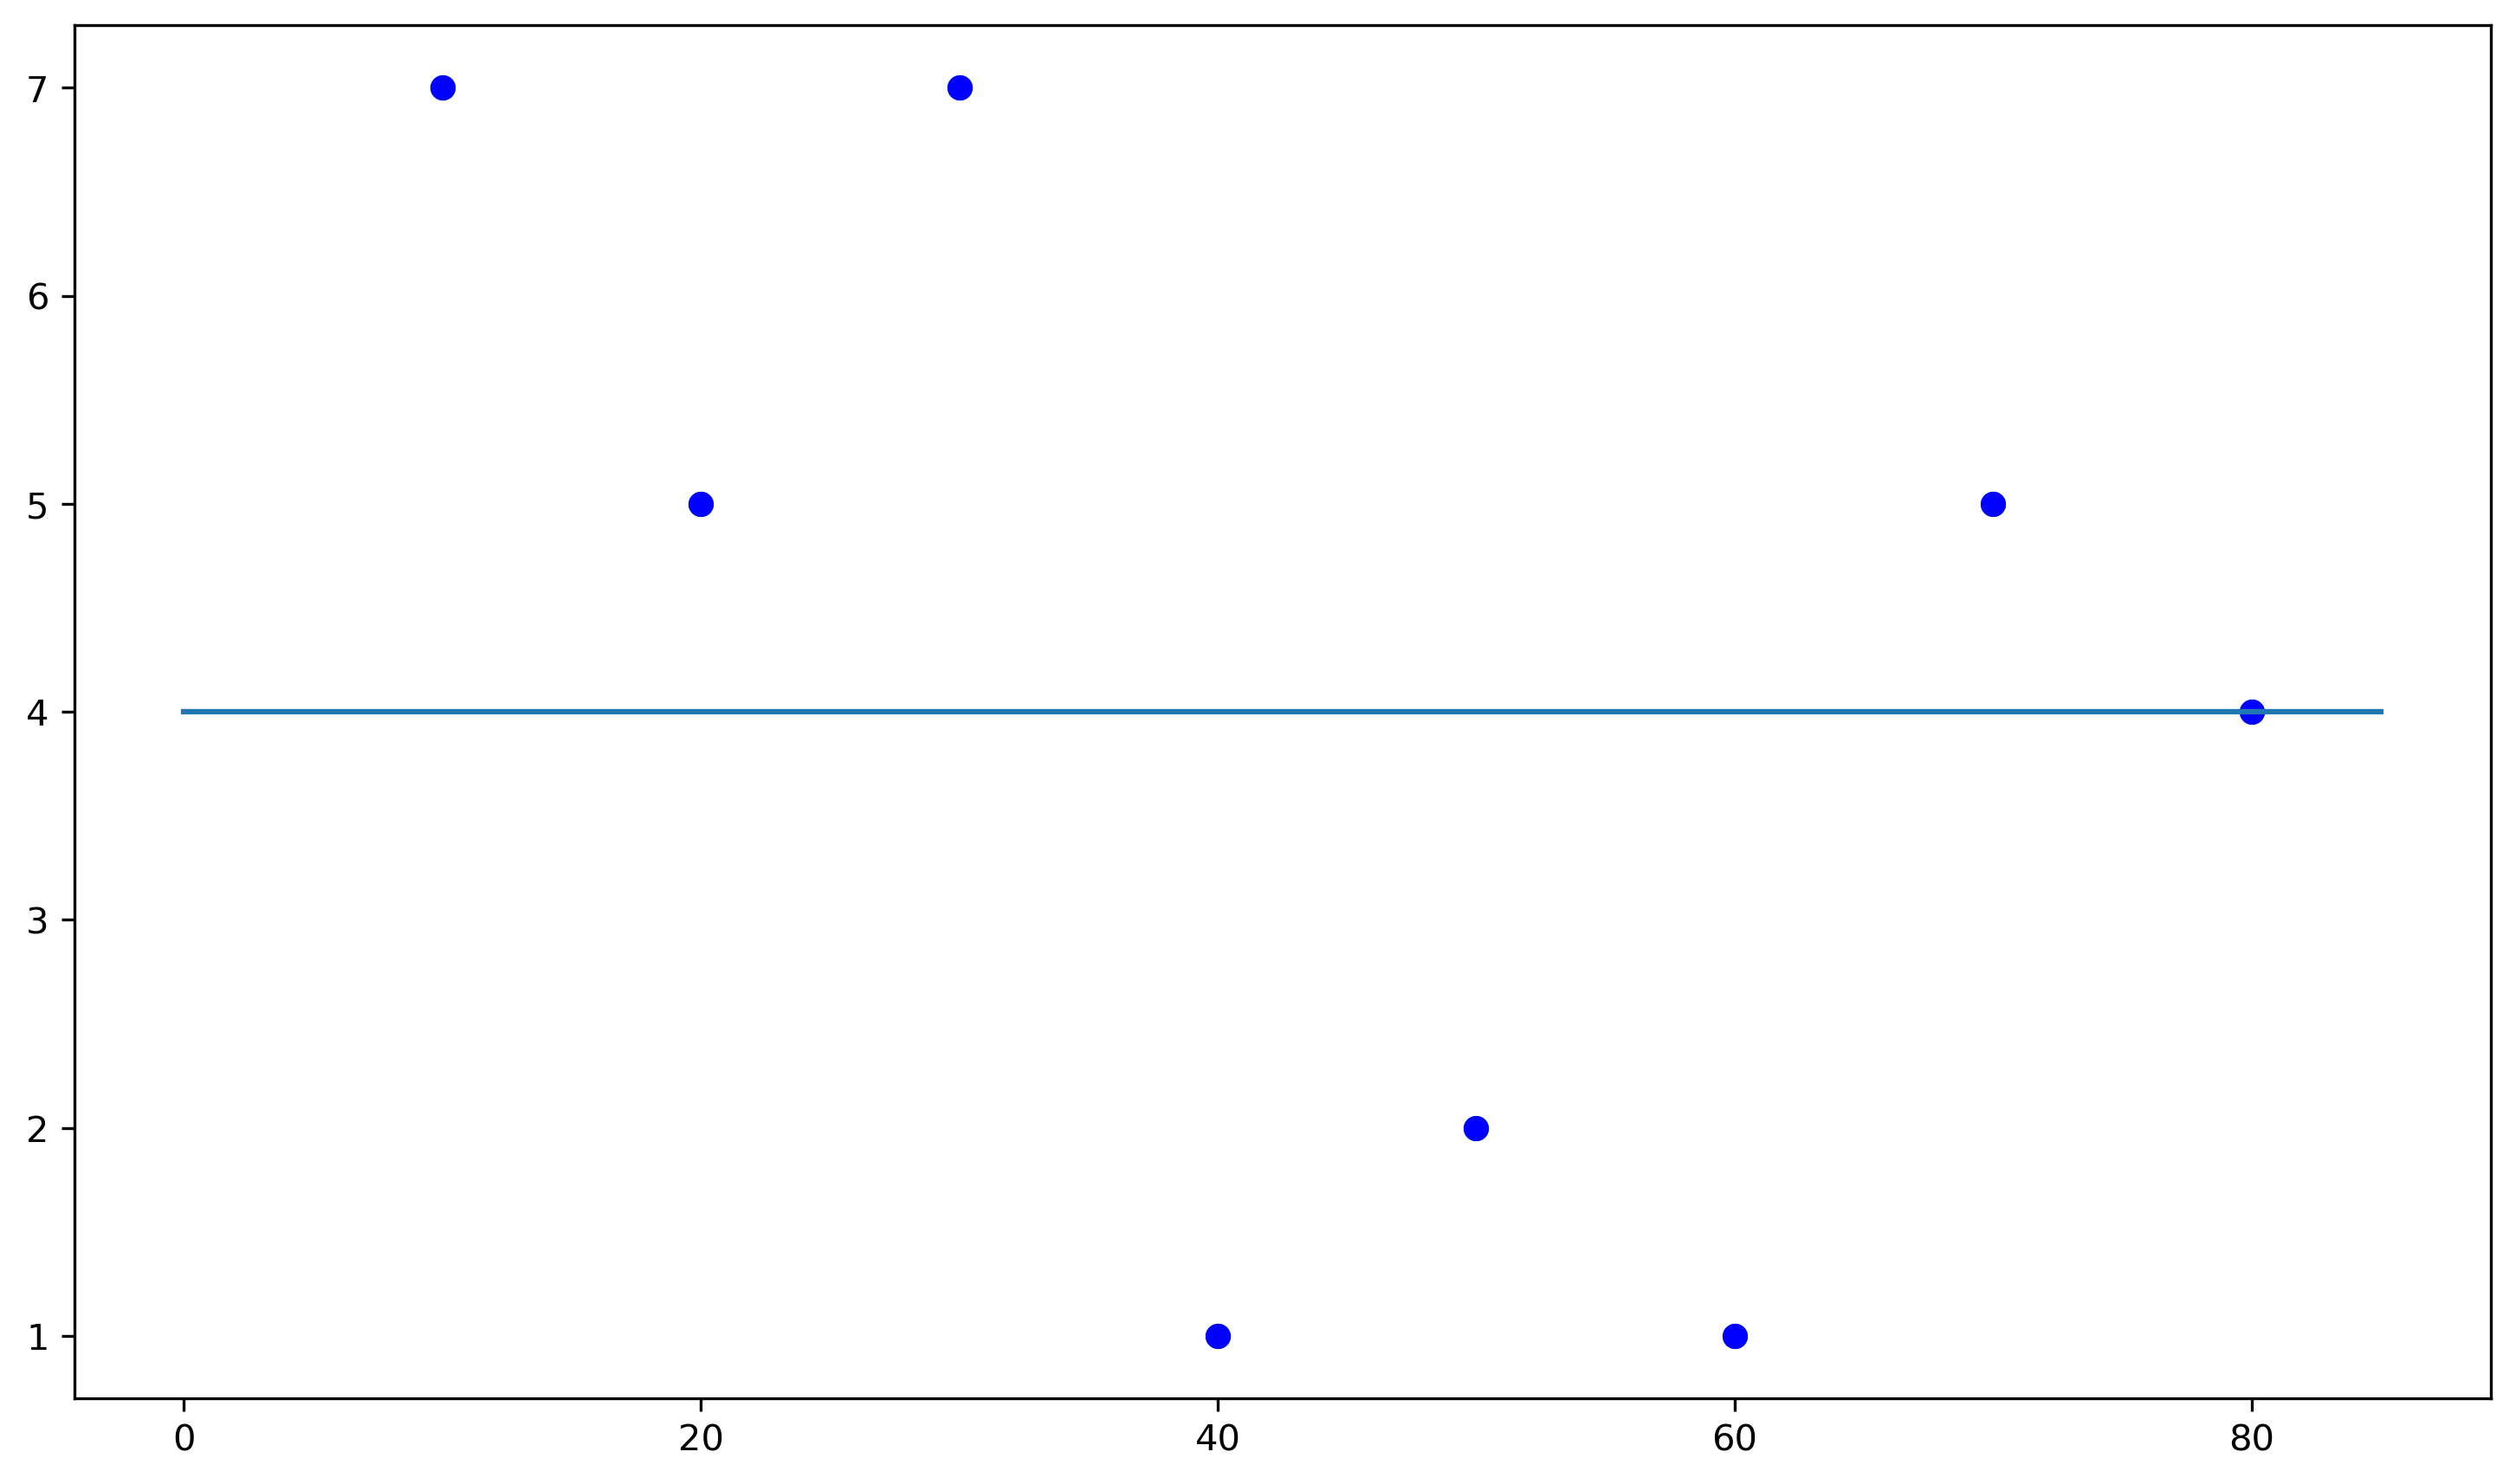

In [16]:
# First weak learner
x = np.linspace(0,85,2)
plt.scatter(features, labels)
plt.plot(x, [4 for i in range(len(x))])
plt.scatter(features, labels, color='blue')
plt.show()

In [17]:
gradient_boosting_regressor = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=0.8)
gradient_boosting_regressor.fit(features, labels)
gradient_boosting_regressor.predict(features)

array([6.87466667, 5.11466667, 6.71466667, 1.43466667, 1.43466667,
       1.43466667, 4.896     , 4.096     ])

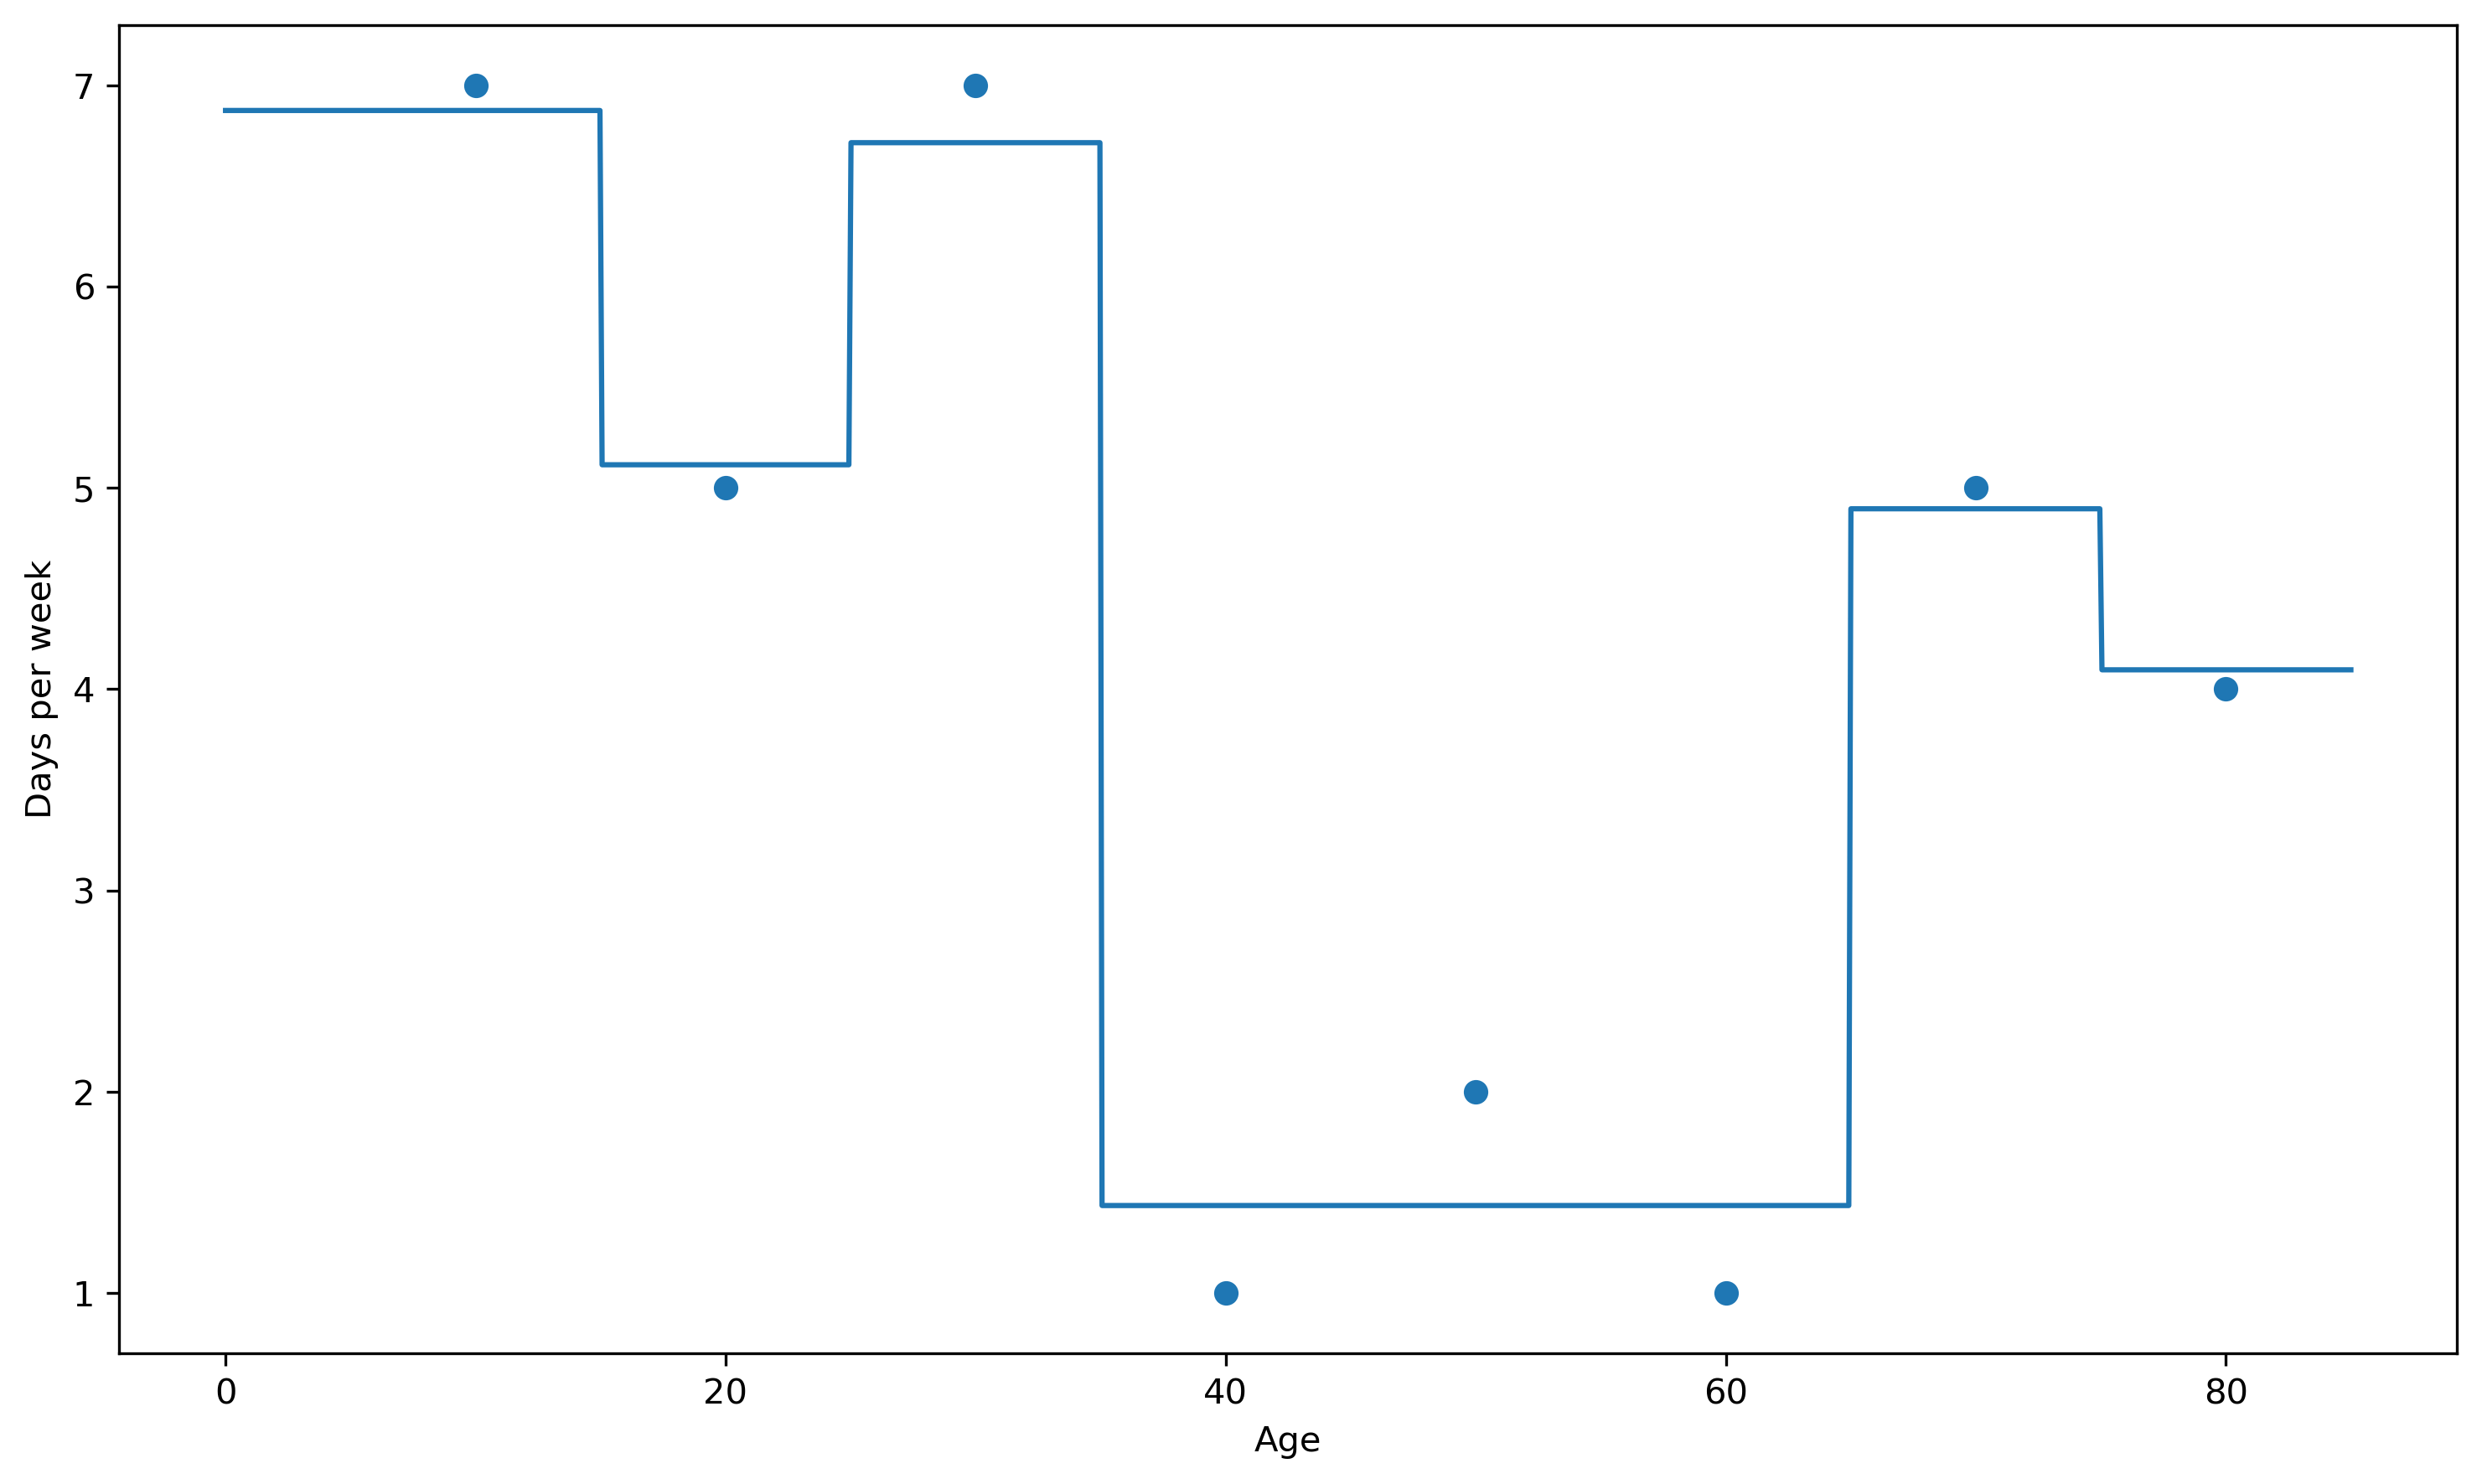

In [18]:
plot_regressor(gradient_boosting_regressor, features, labels)


**************************************************

Weak learner 1
Residuals to predict: [ 3.  1.  3. -3. -2. -3.  1.  0.]
Predictions: [ 3.          2.          2.         -2.66666667 -2.66666667 -2.66666667
  0.5         0.5       ]


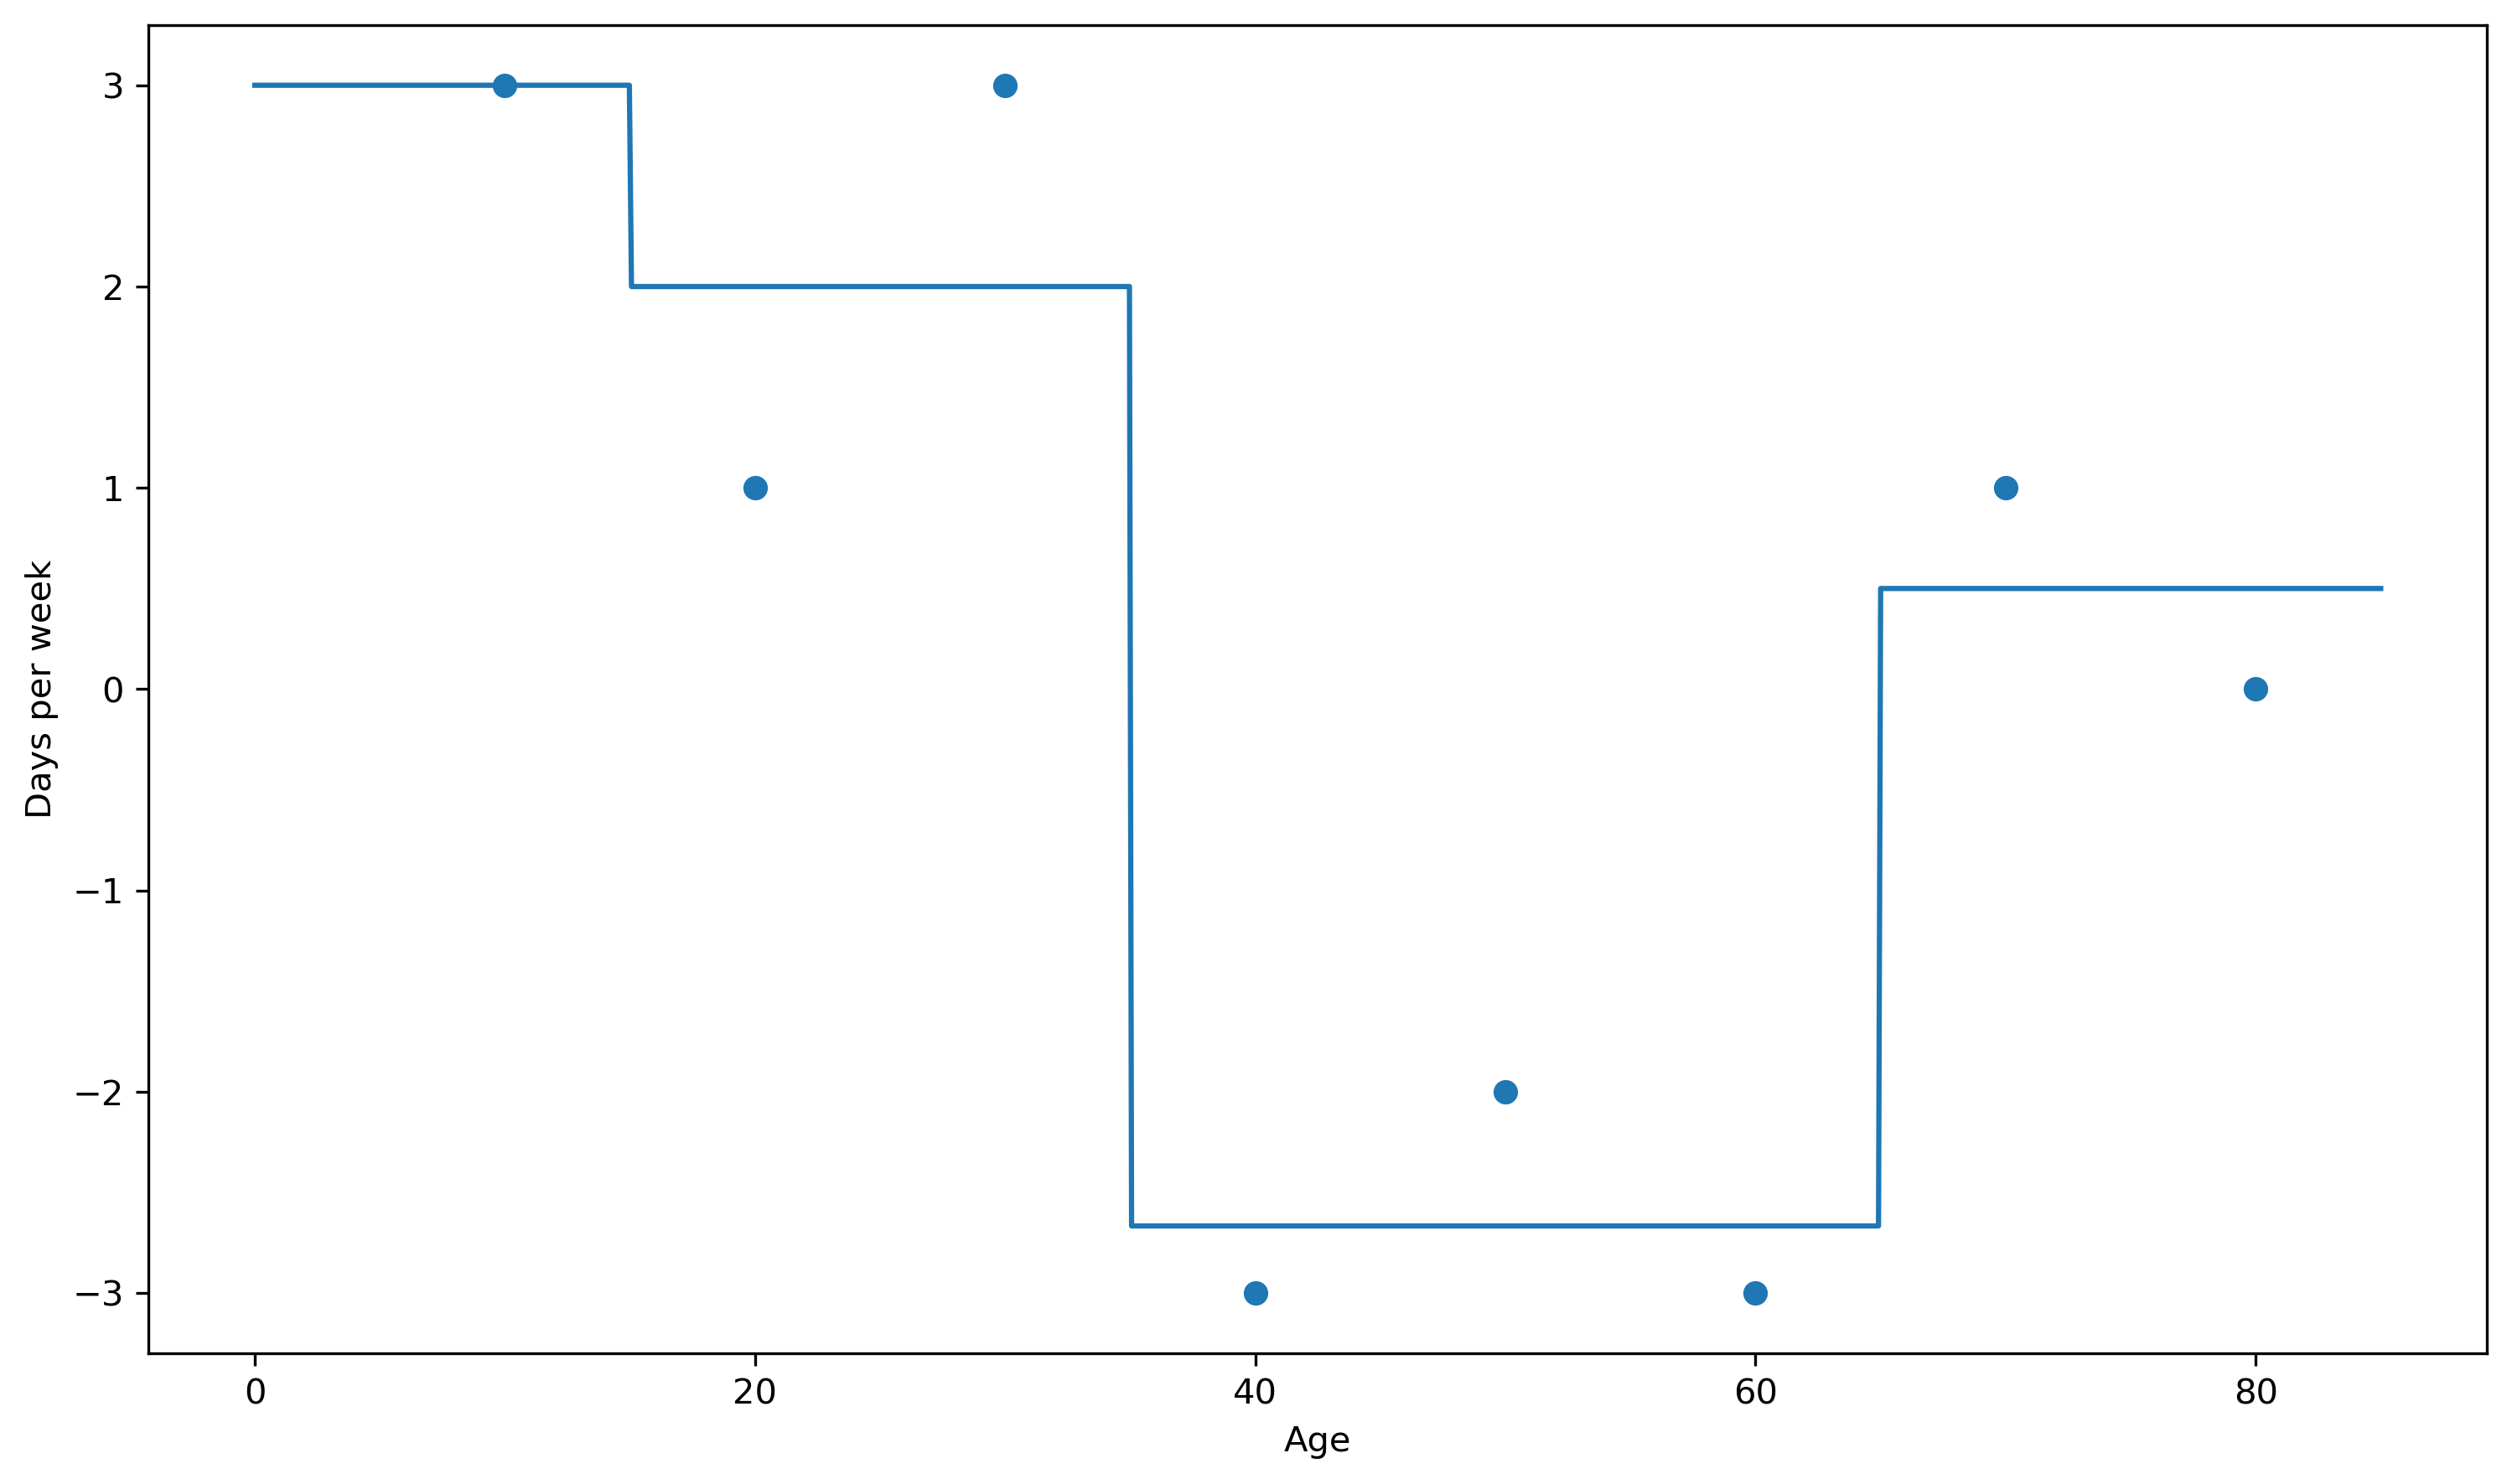

New residuals: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]

**************************************************

Weak learner 2
Residuals to predict: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]
Predictions: [ 0.          0.          1.4        -0.53333333 -0.53333333 -0.53333333
  0.1         0.1       ]


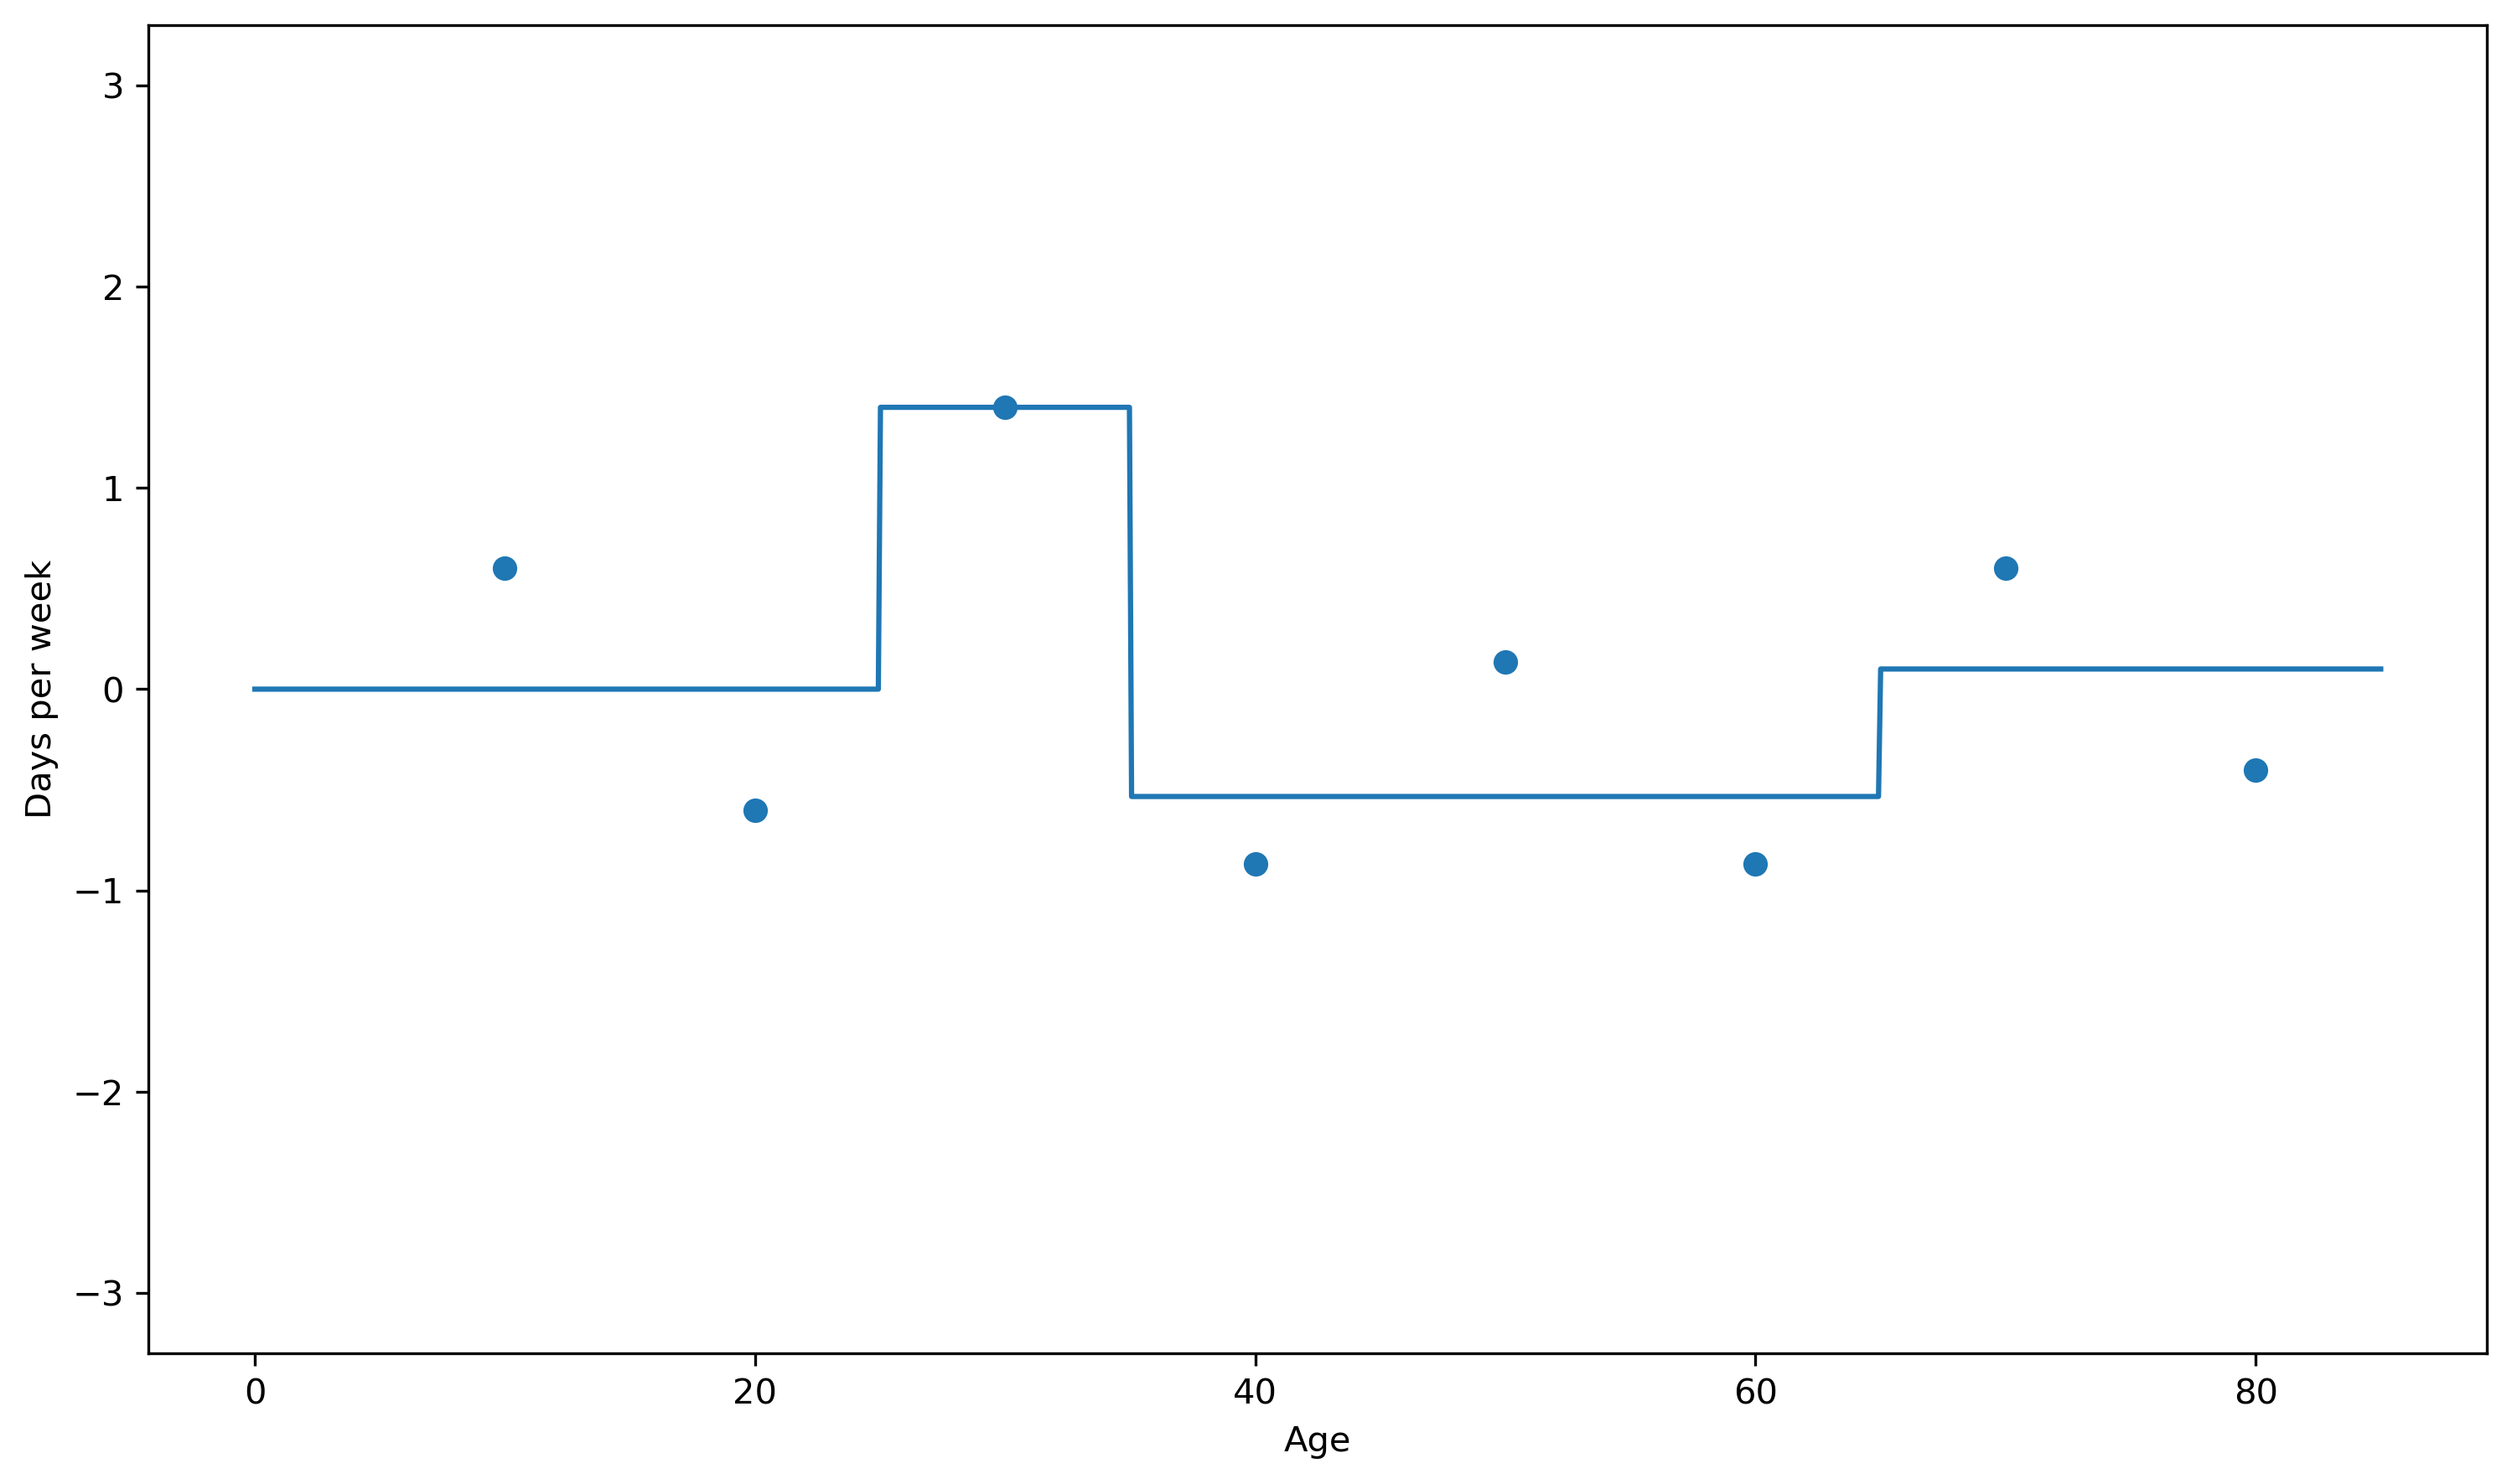

New residuals: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 3
Residuals to predict: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [ 6.00000000e-01 -6.00000000e-01 -7.40148683e-17 -7.40148683e-17
 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17]


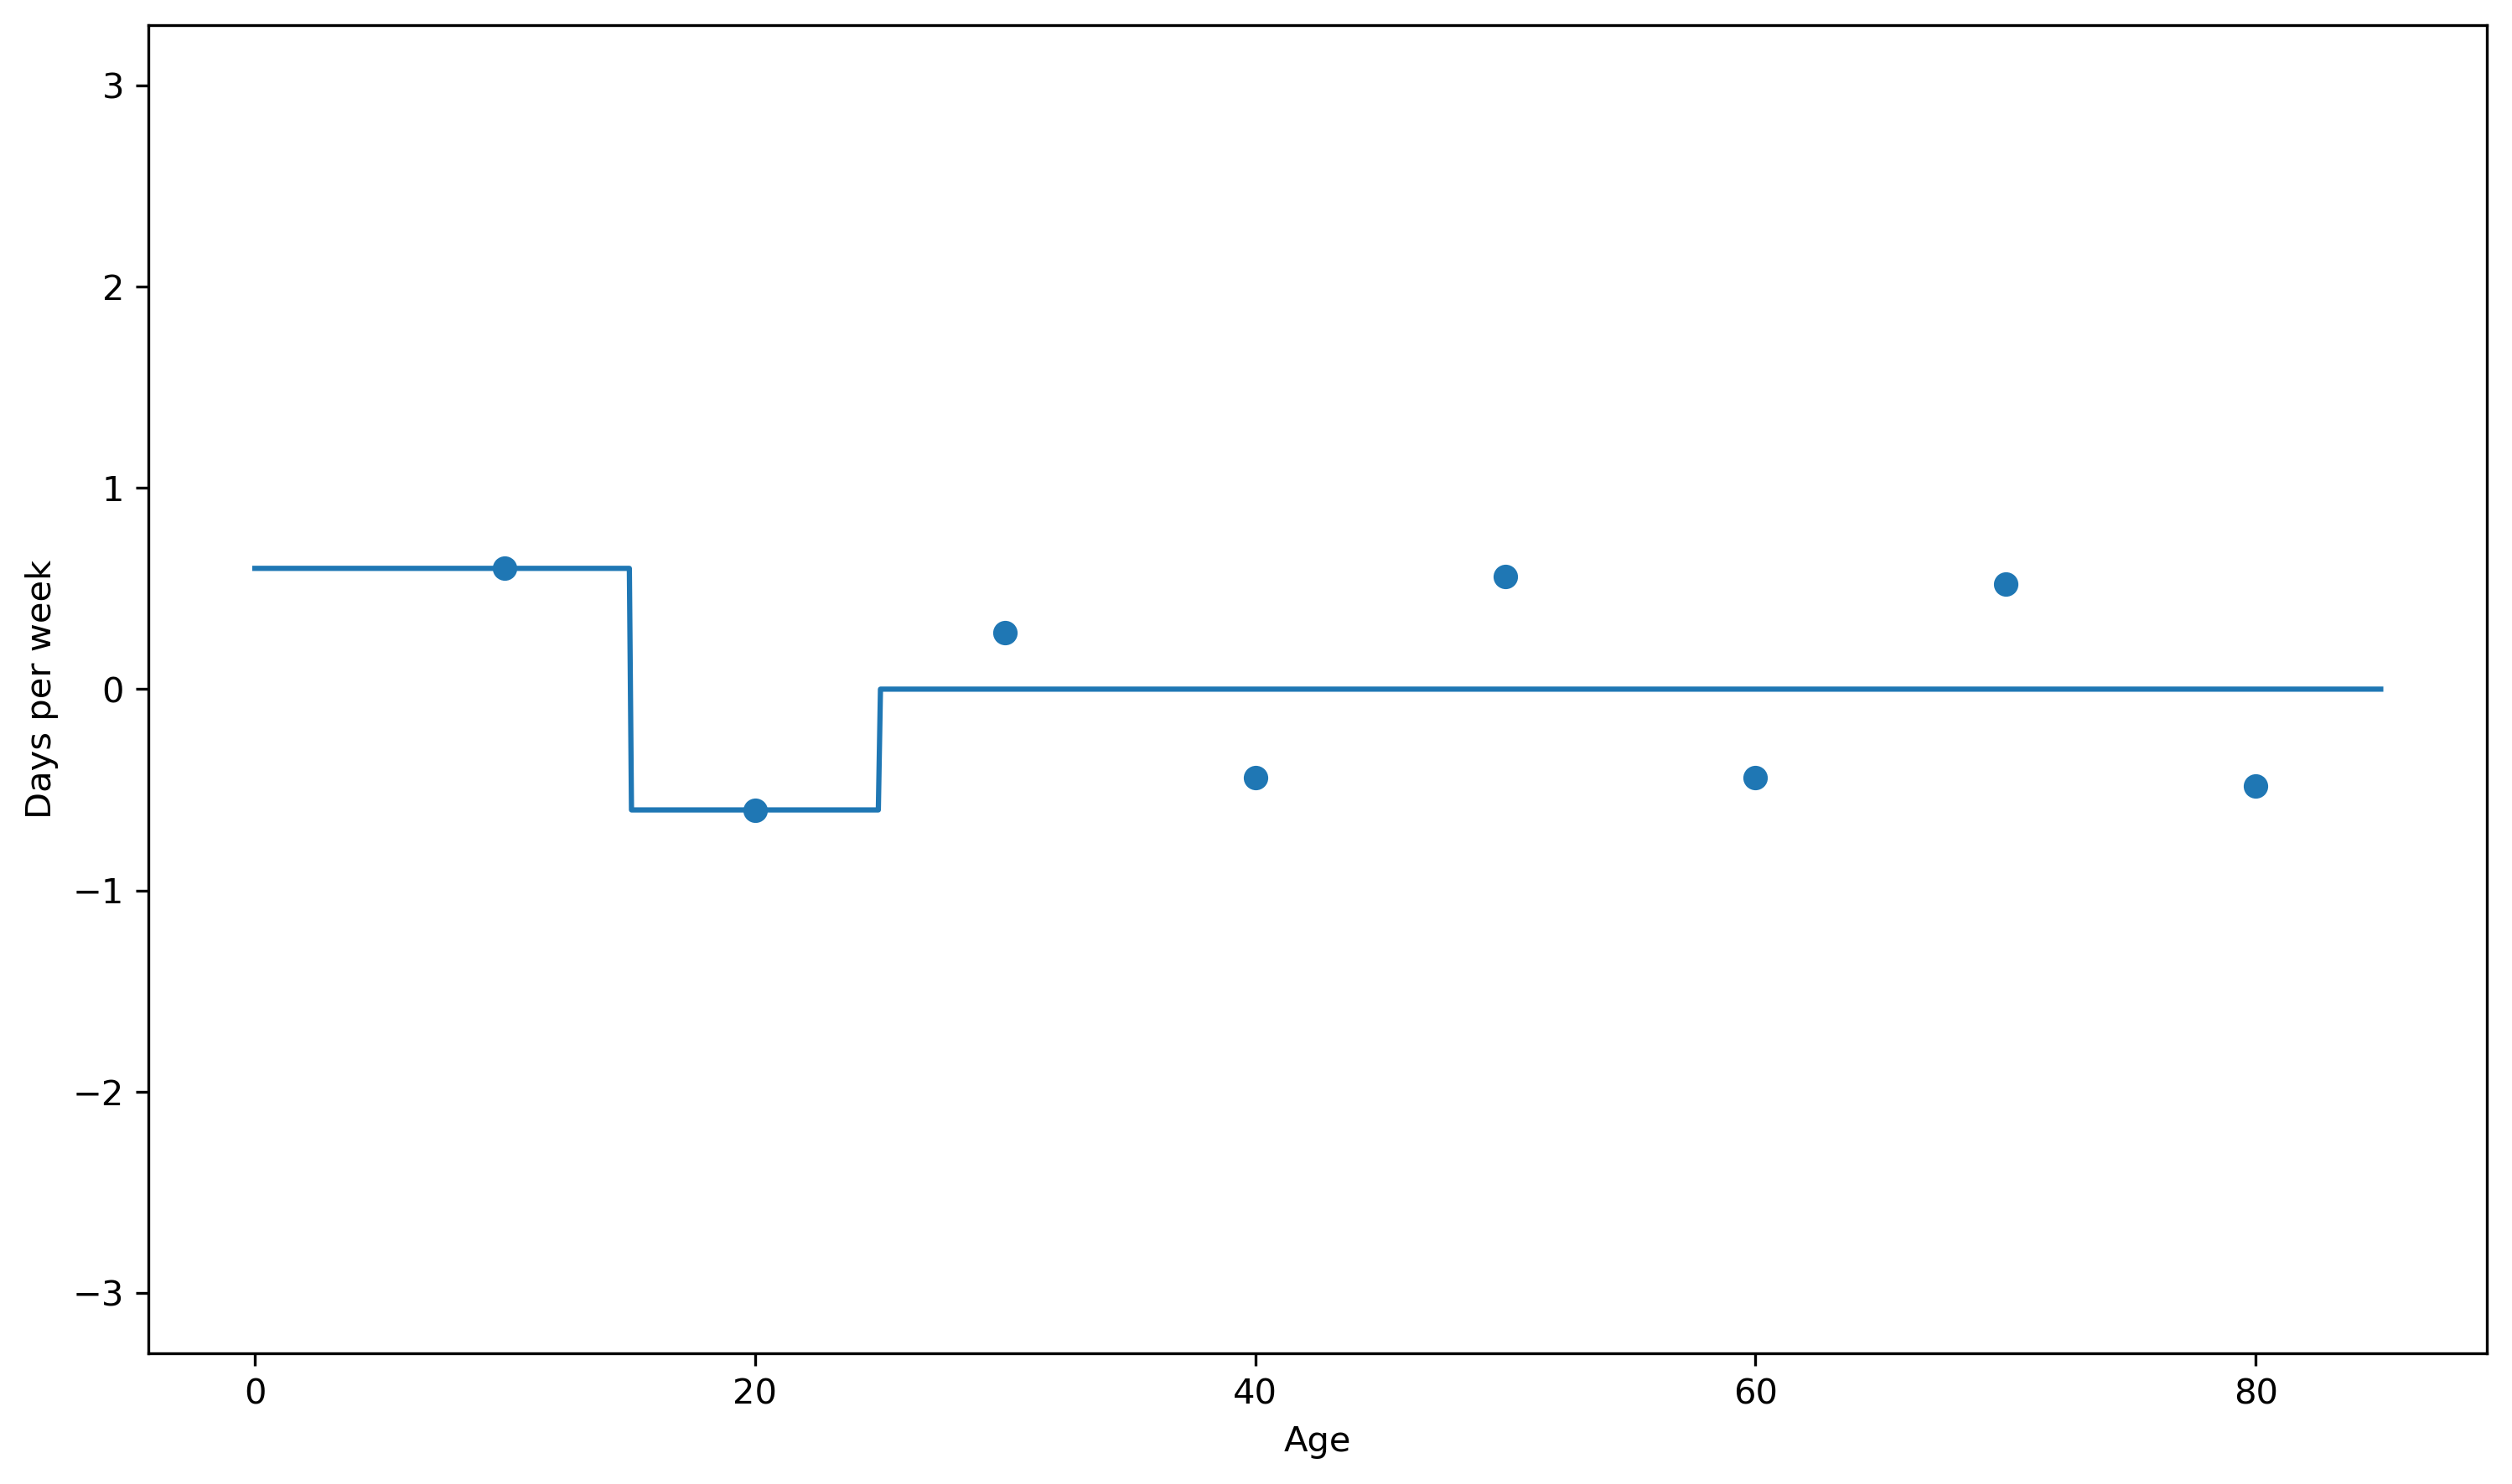

New residuals: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 4
Residuals to predict: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [-0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
  0.52       -0.48      ]


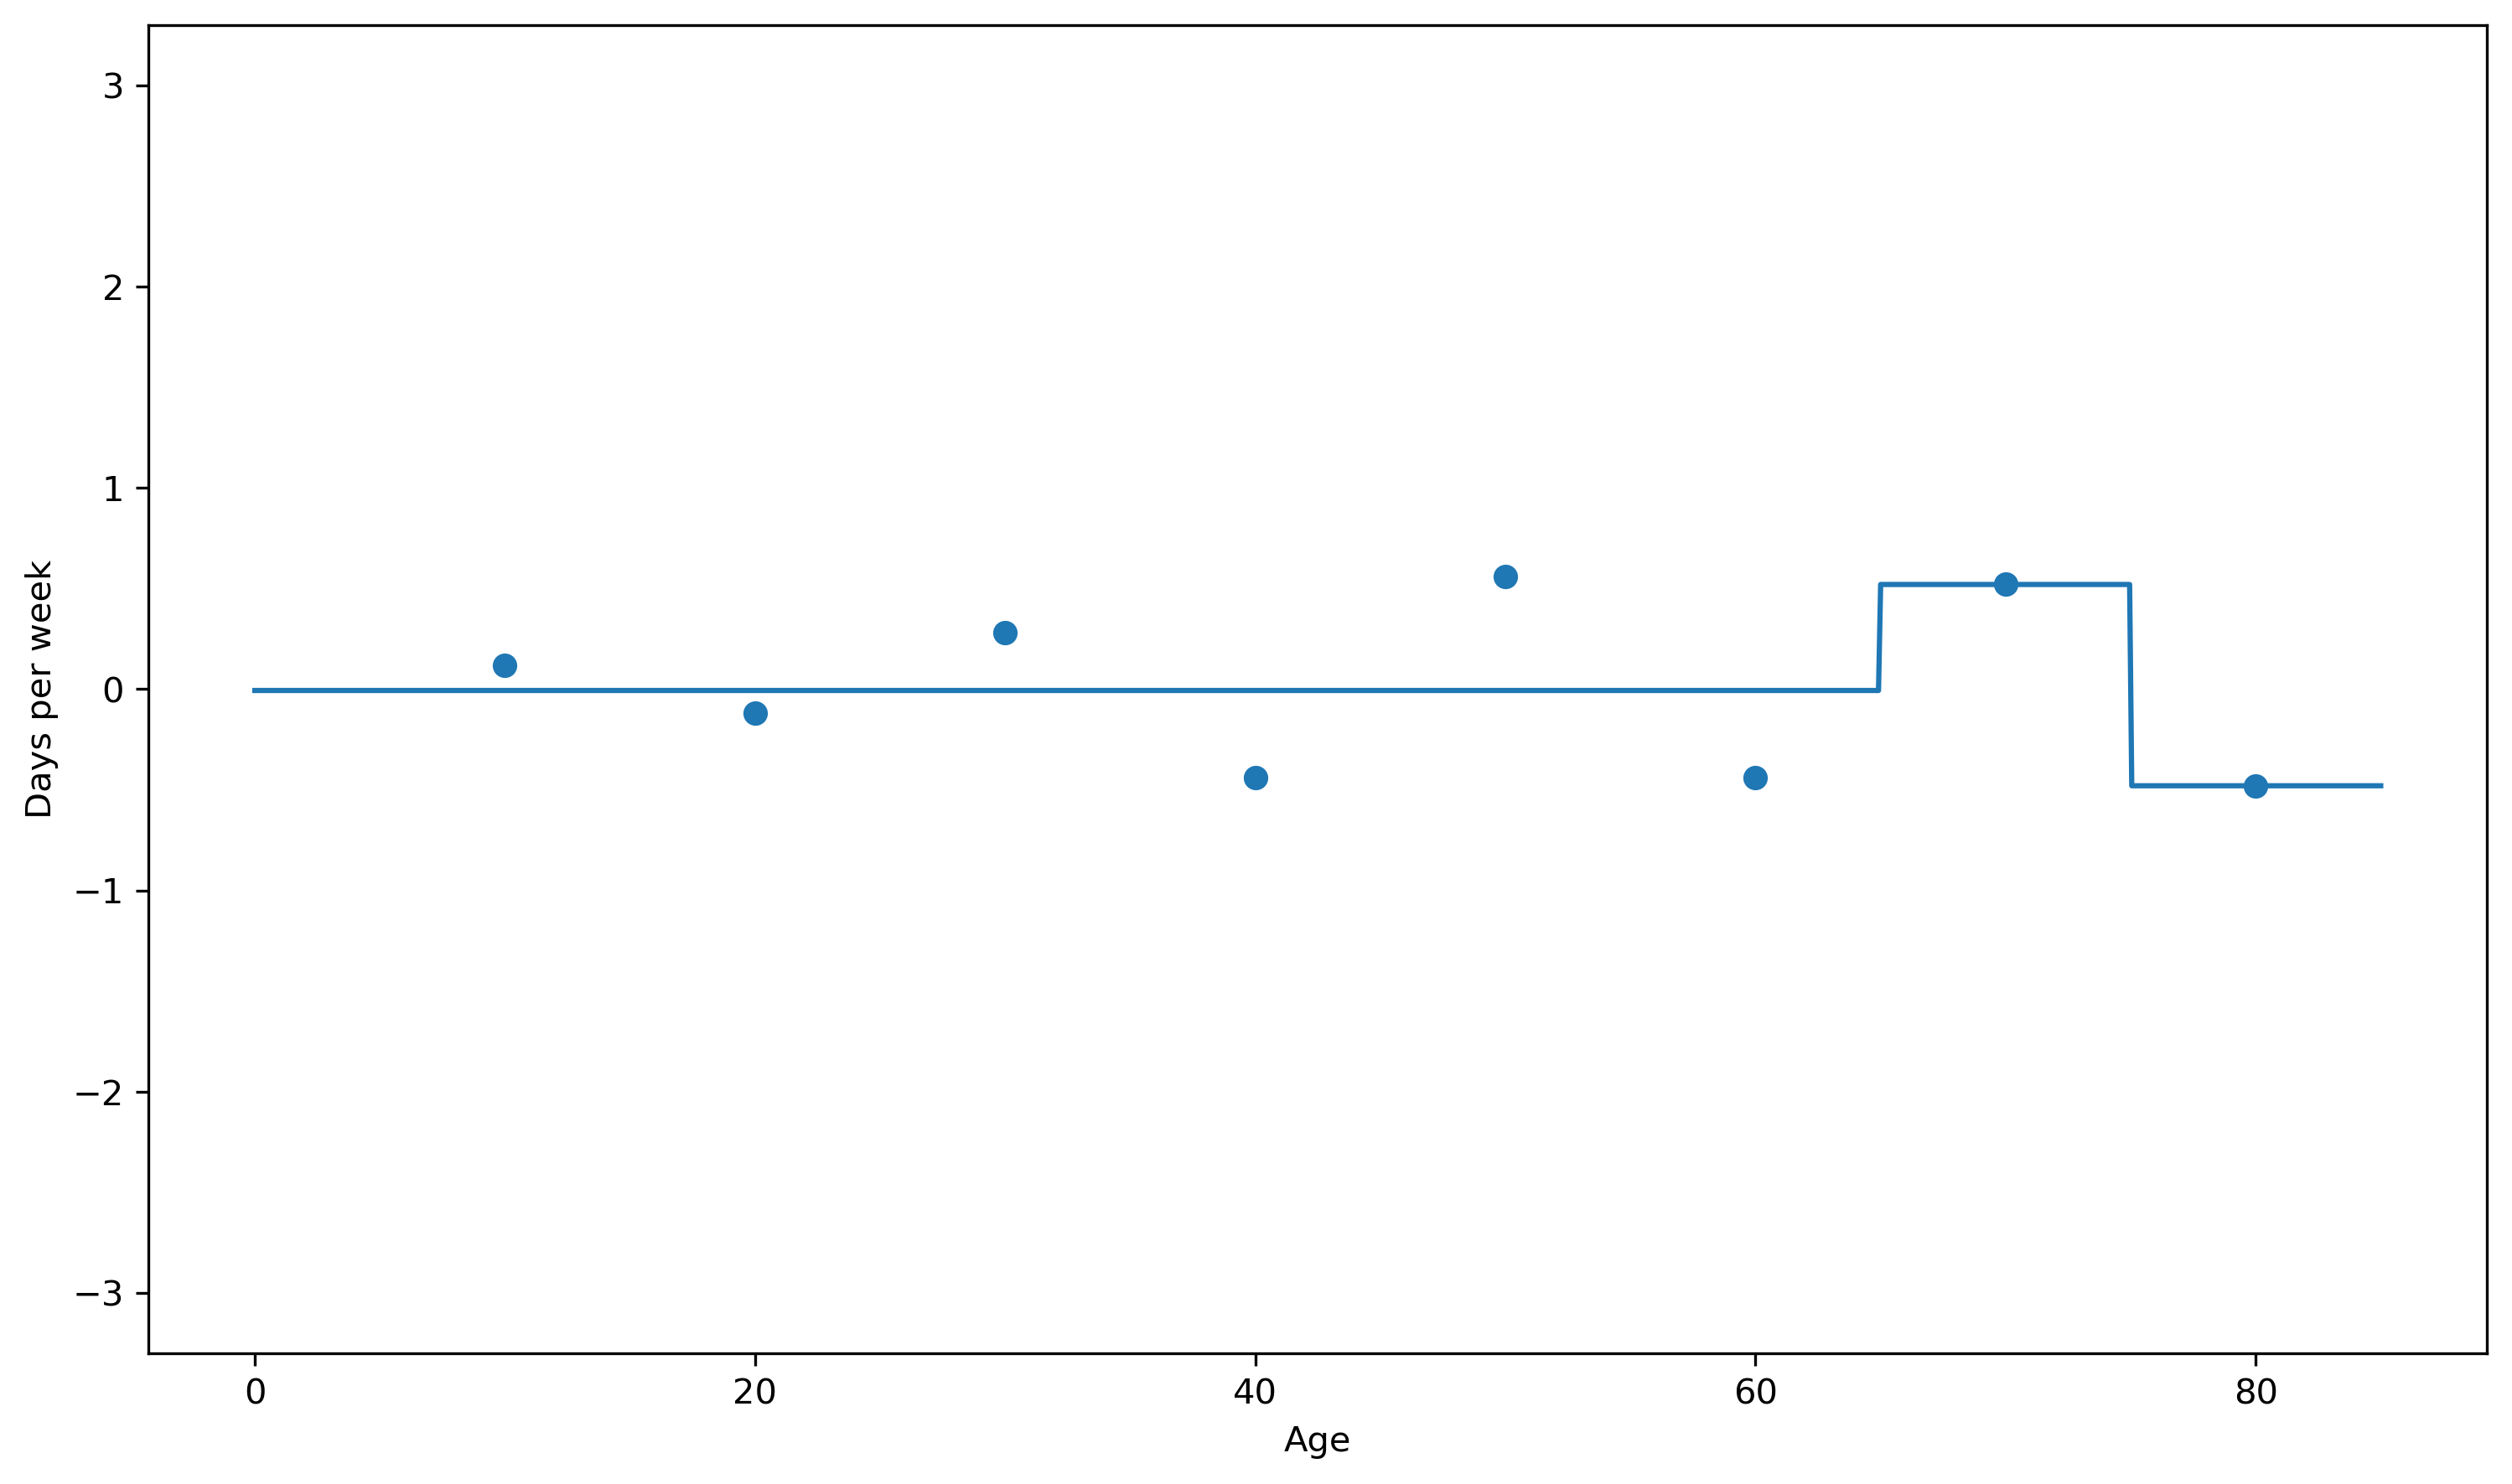

New residuals: [ 0.12533333 -0.11466667  0.28533333 -0.43466667  0.56533333 -0.43466667
  0.104      -0.096     ]


In [19]:
predictions_estimators = []
predictions = np.zeros(8)
centered_labels = labels-labels.mean()
residuals = [centered_labels]
for i in range(len(gradient_boosting_regressor.estimators_)):
    weak_learner = gradient_boosting_regressor.estimators_[i][0]
    print("\n"+"*"*50+"\n")
    print("Weak learner", i+1)
    preds = weak_learner.predict(features)
    predictions_estimators.append(preds)
    print("Residuals to predict:", residuals[-1])
    print("Predictions:", preds)
    predictions += preds*0.8
    #plt.scatter(features, predictions)
    #plt.scatter(features, residuals[-1])
    #plot_regressor(tree[0], features, centered_labels)
    plt.scatter(features, centered_labels, color='white')
    plot_regressor(weak_learner, features, residuals[-1])
    plt.show()
    residuals.append(centered_labels-predictions)
    print("New residuals:", residuals[-1])

## Prediction from first i learners

Up to weak learner number 1


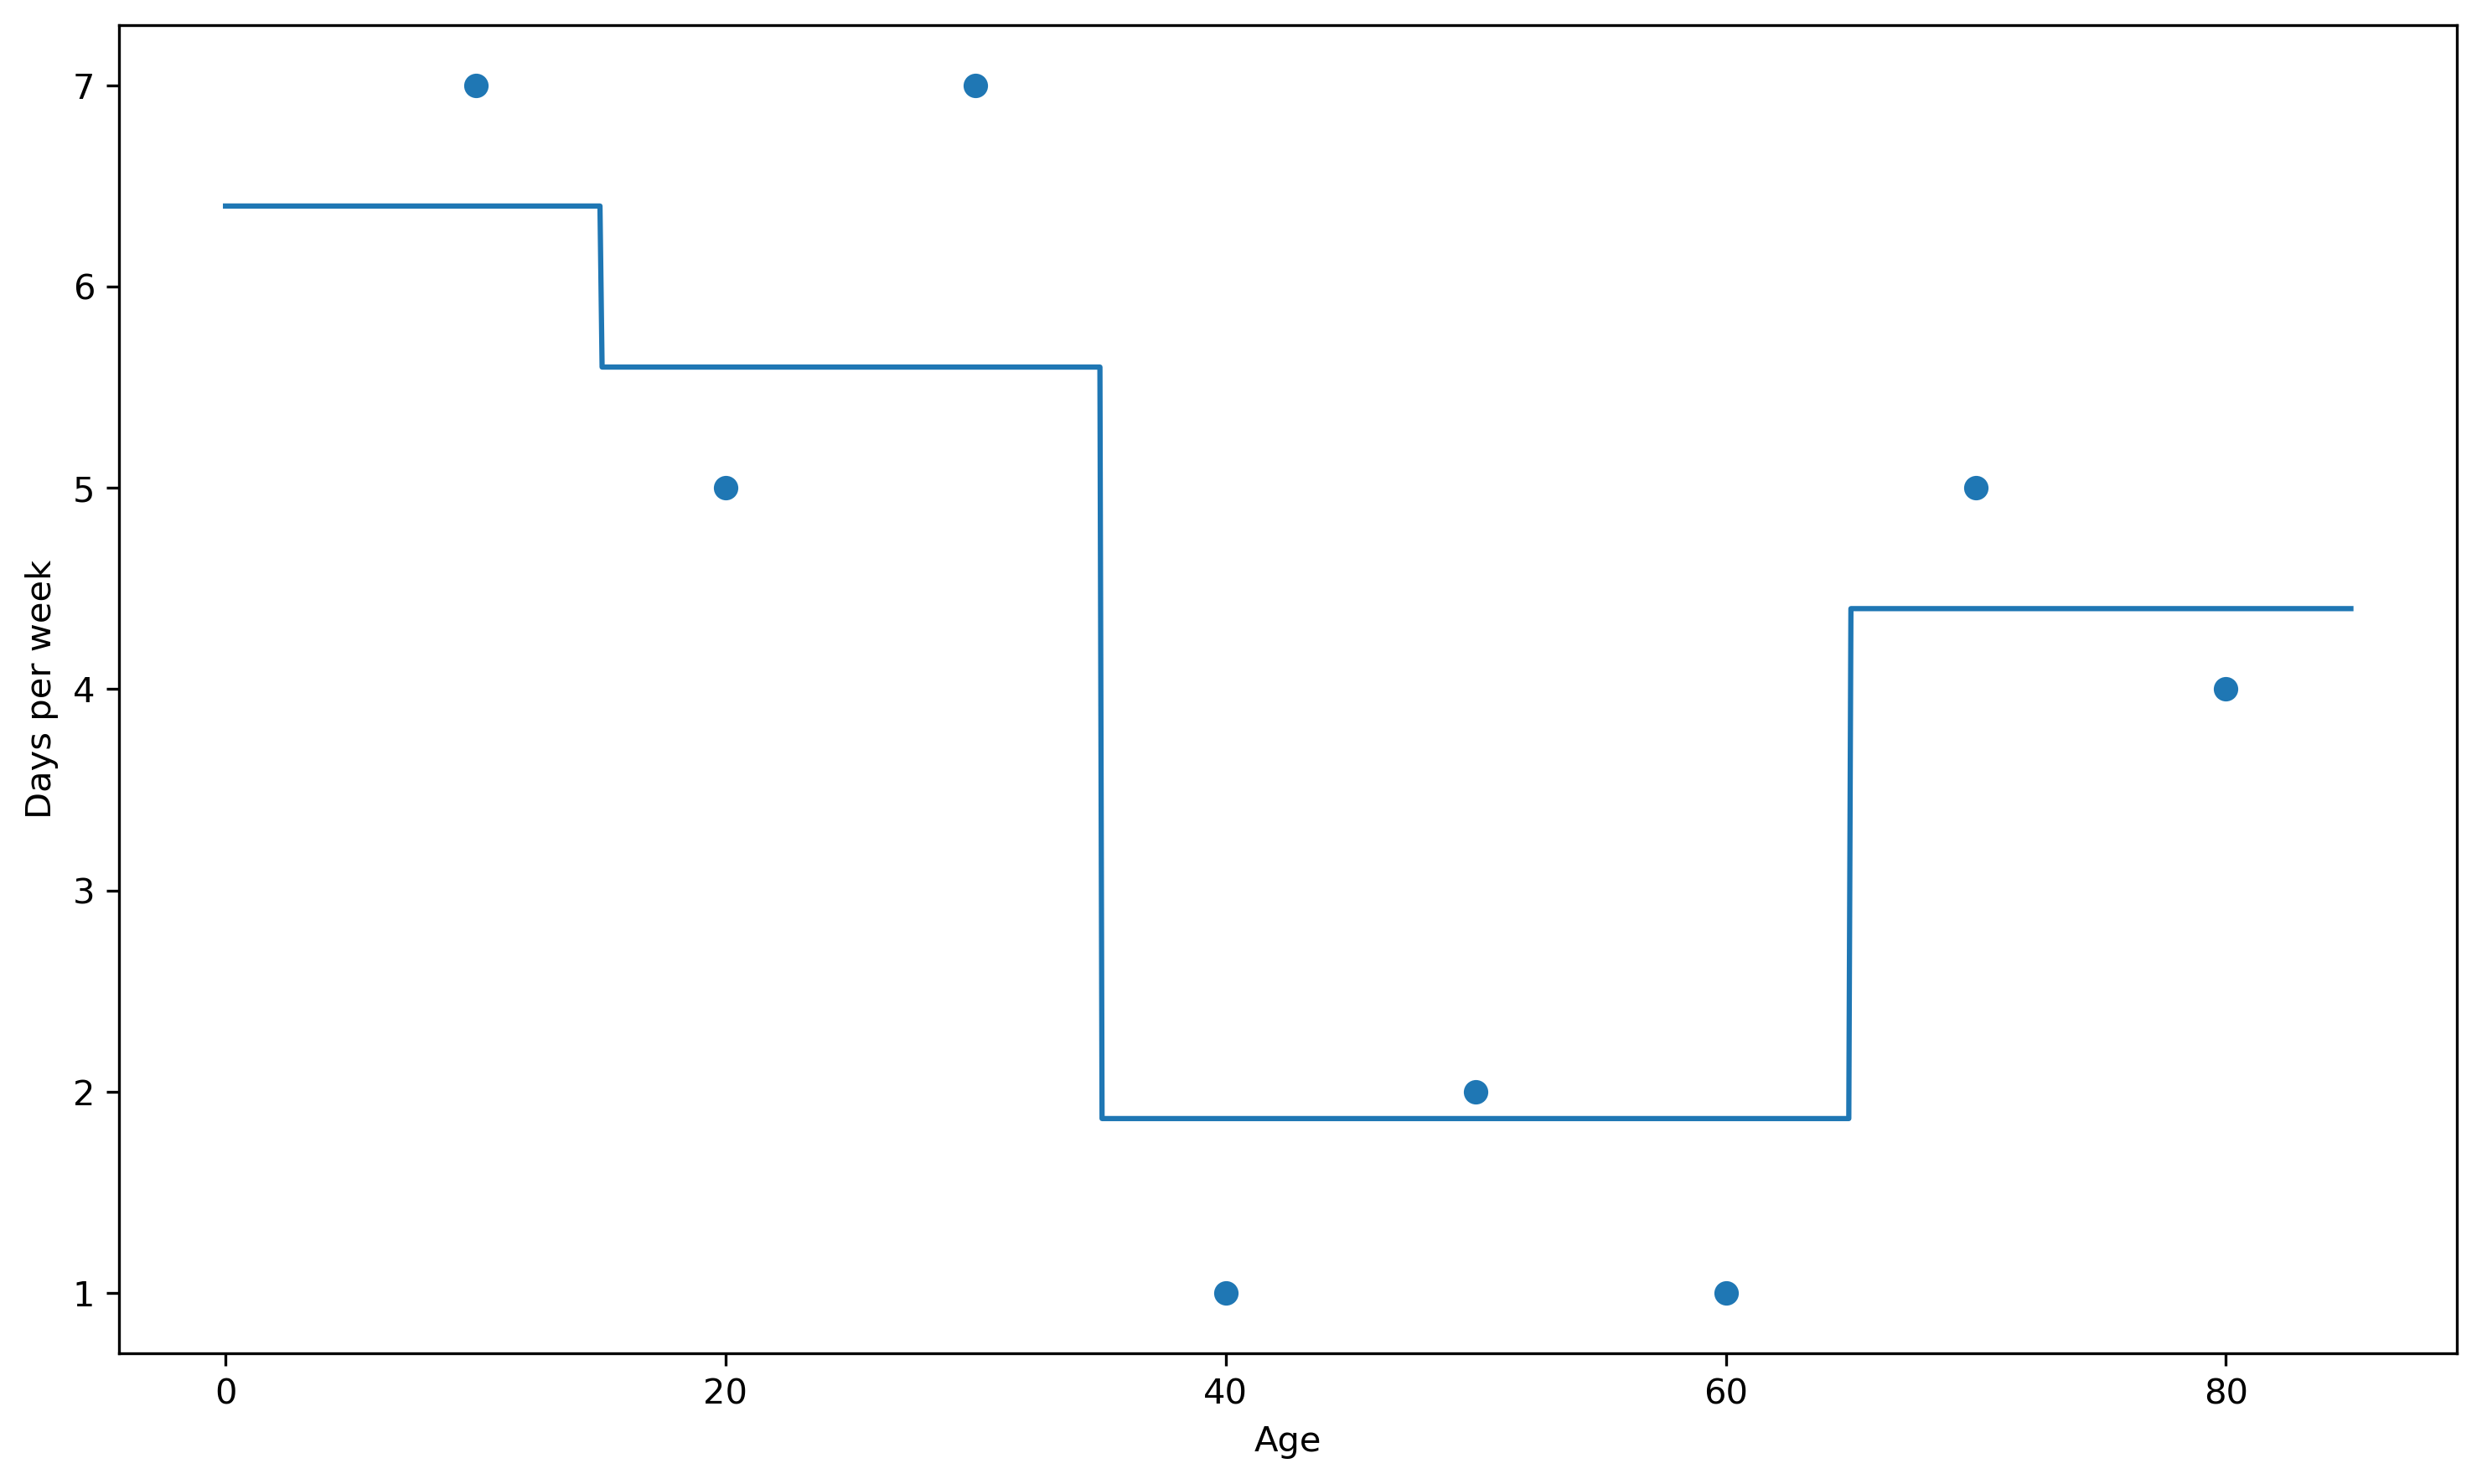

Up to weak learner number 2


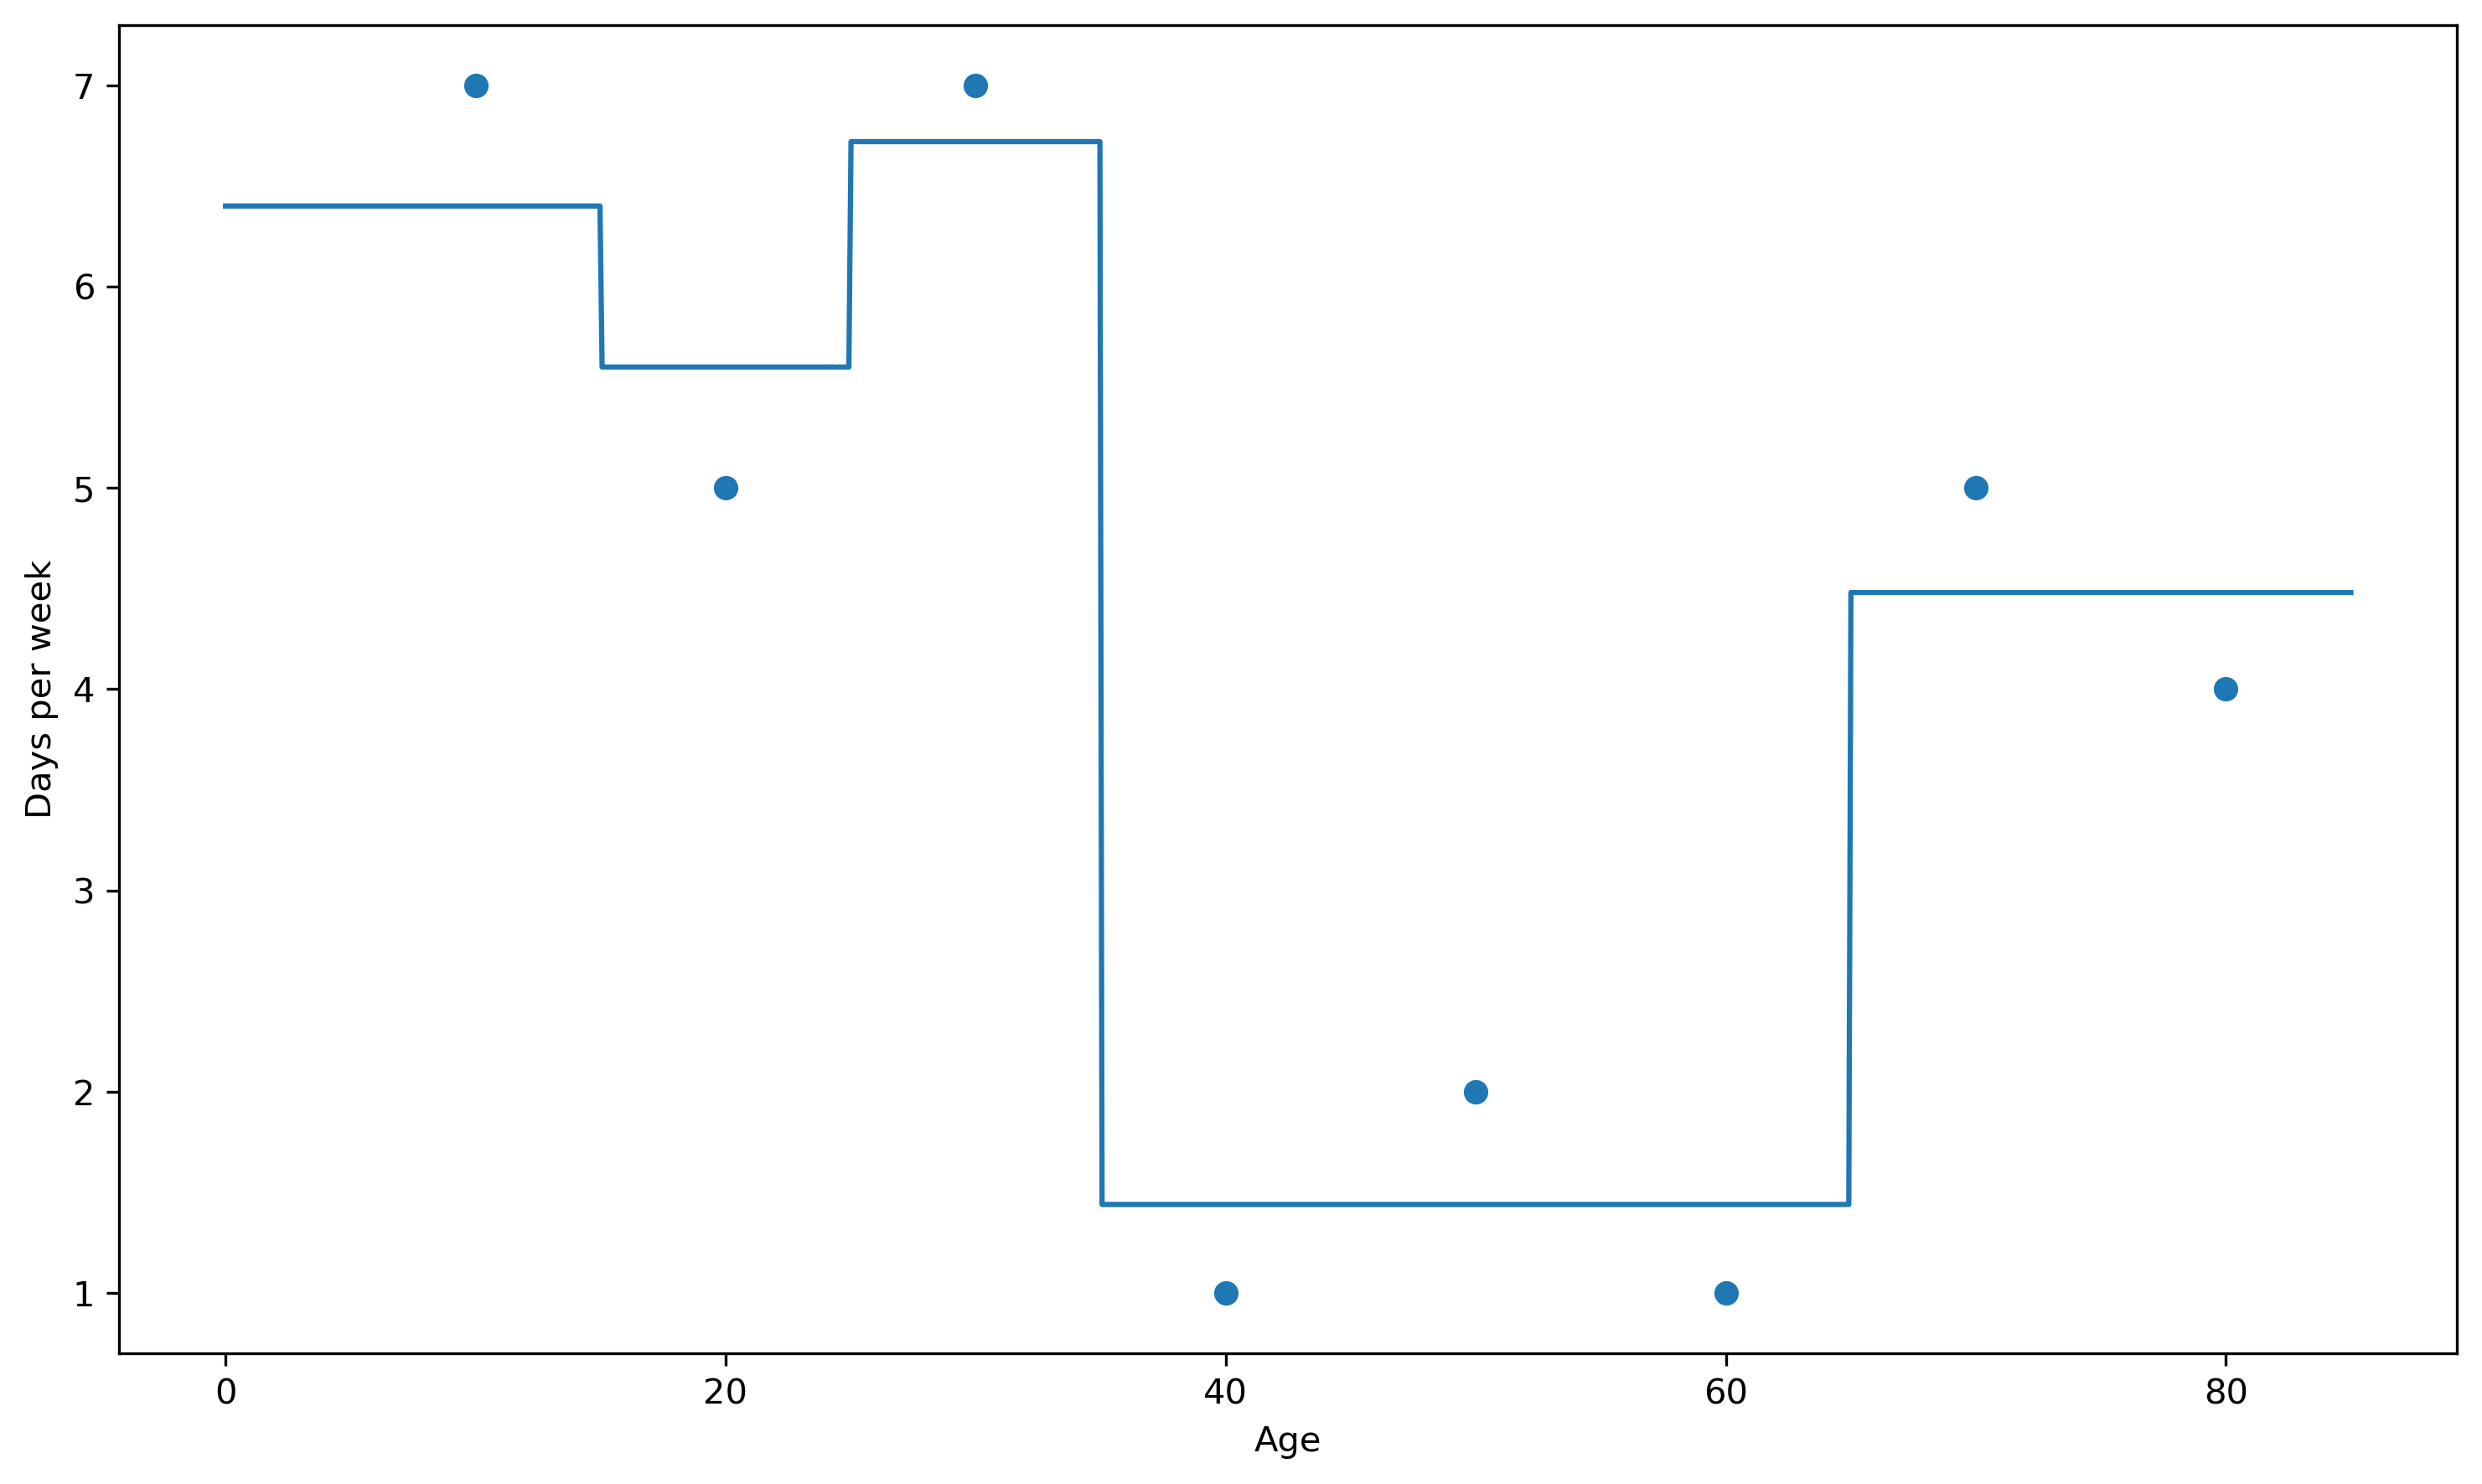

Up to weak learner number 3


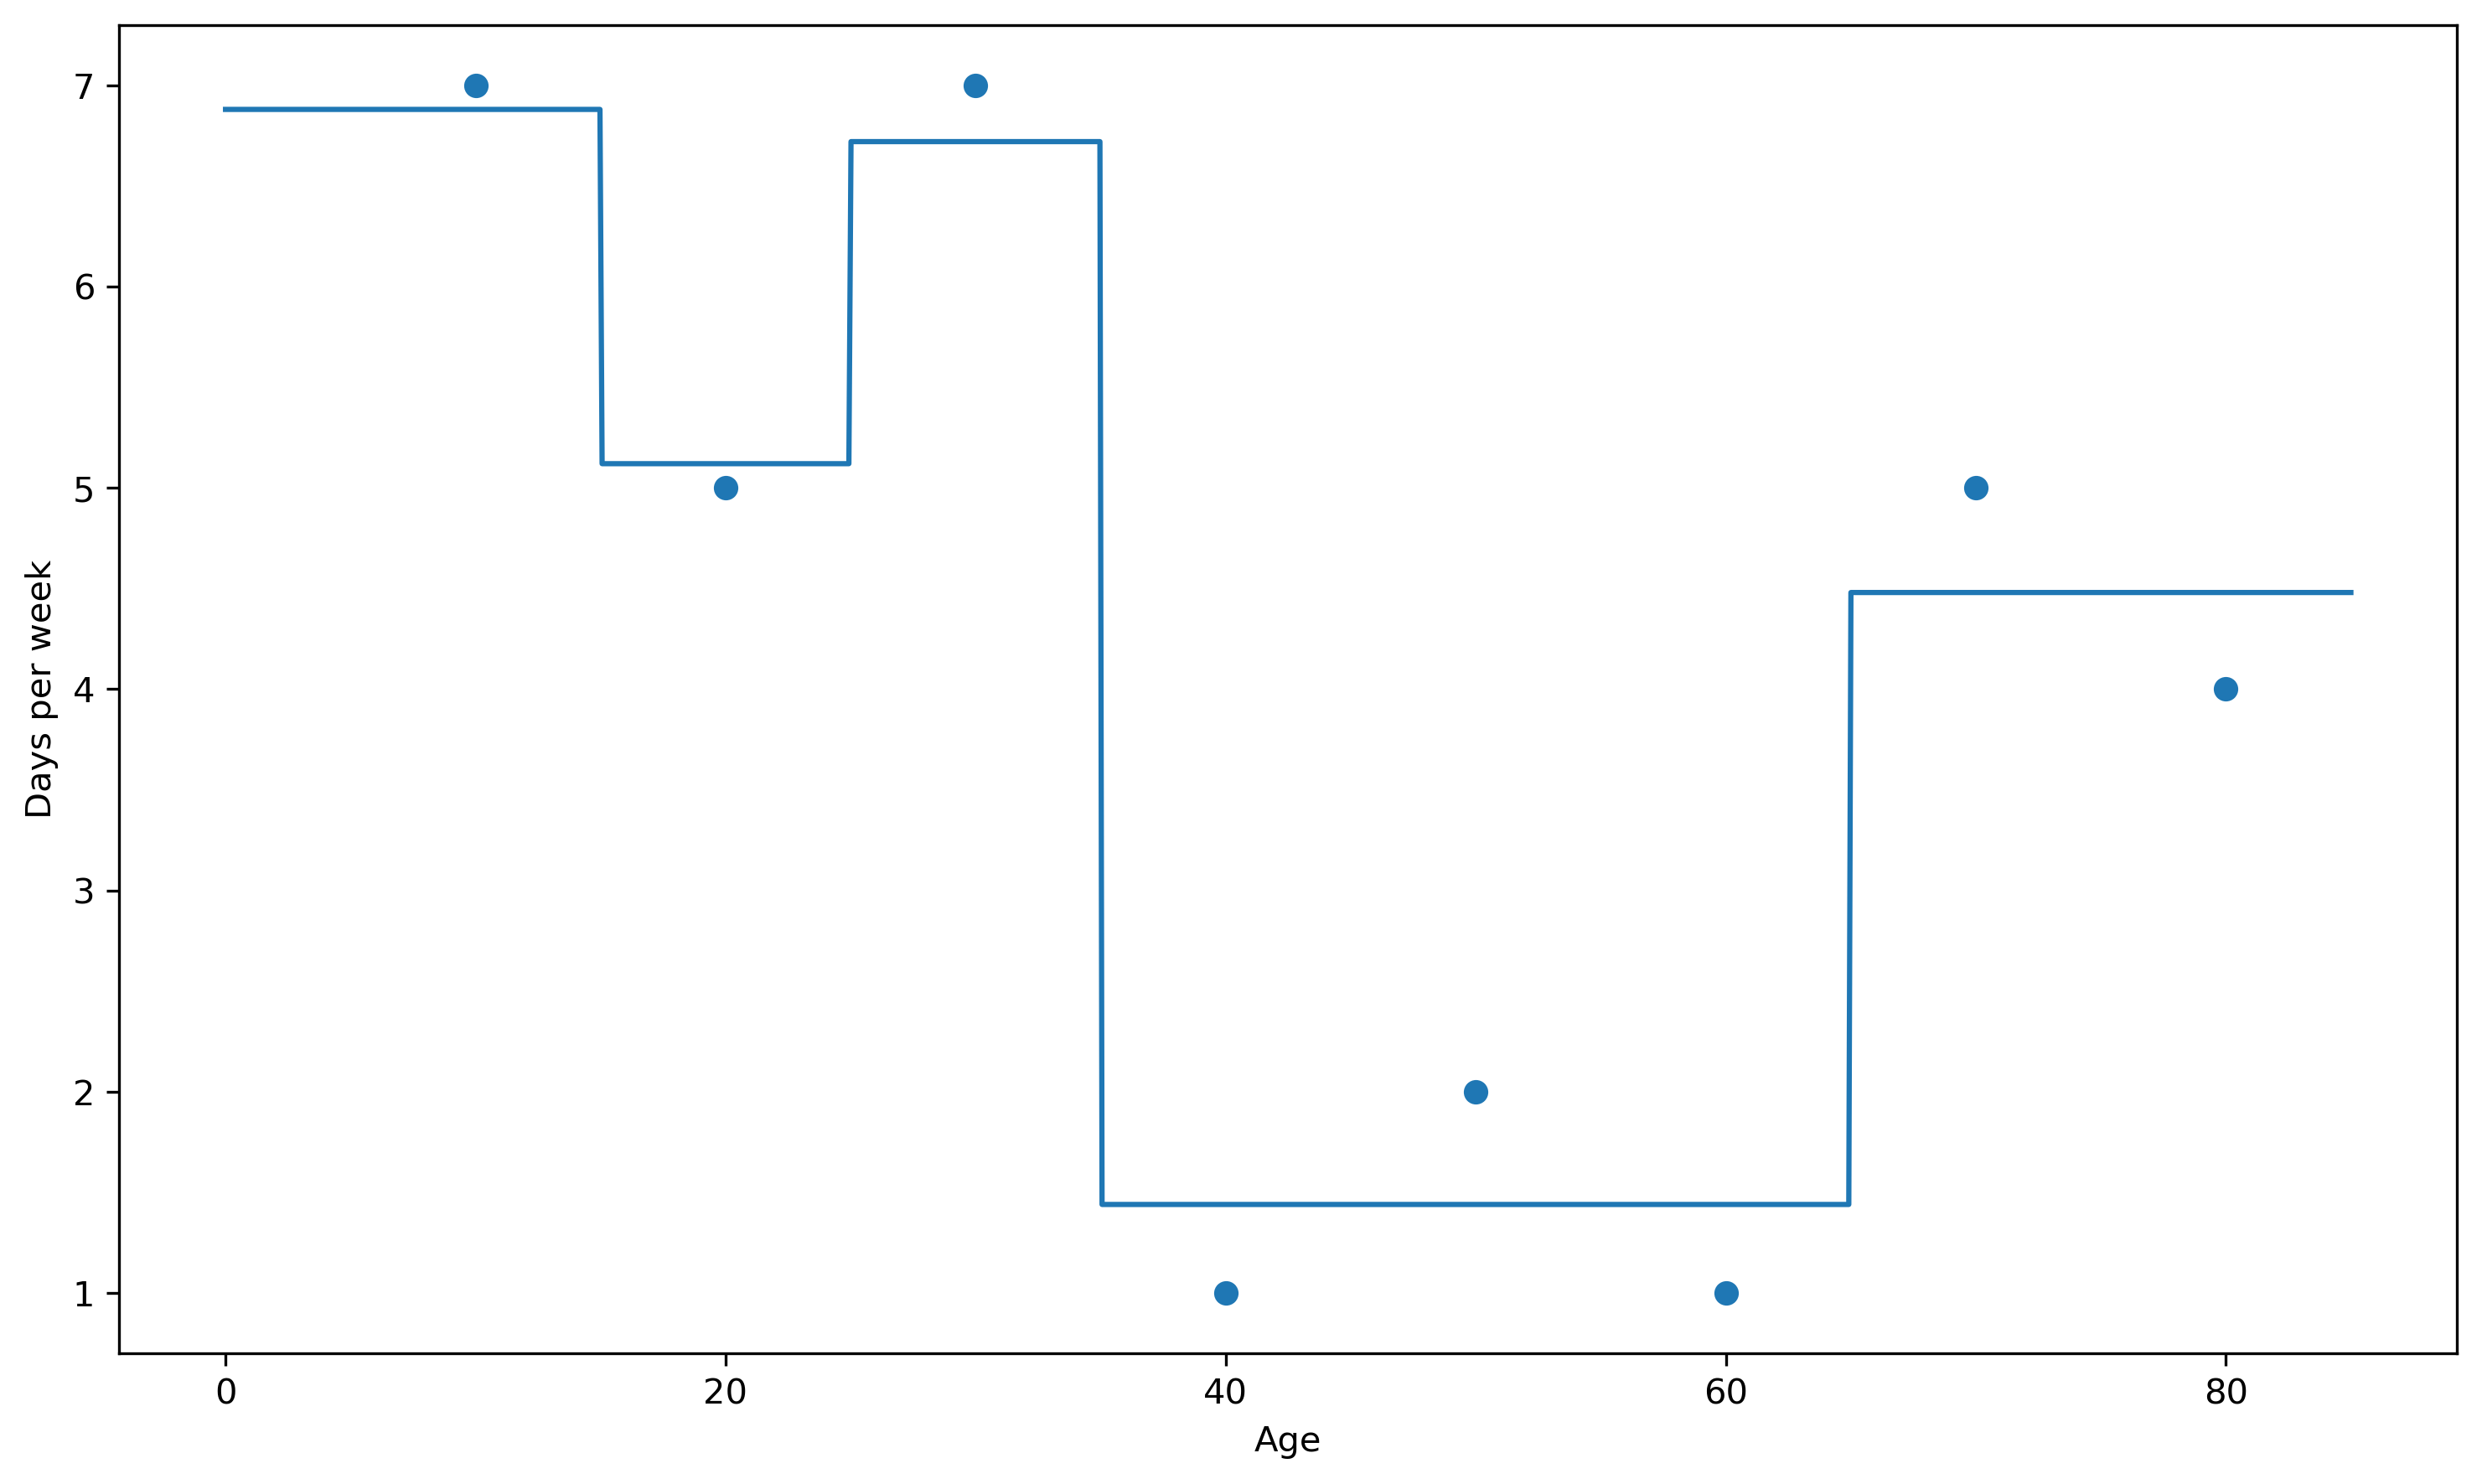

Up to weak learner number 4


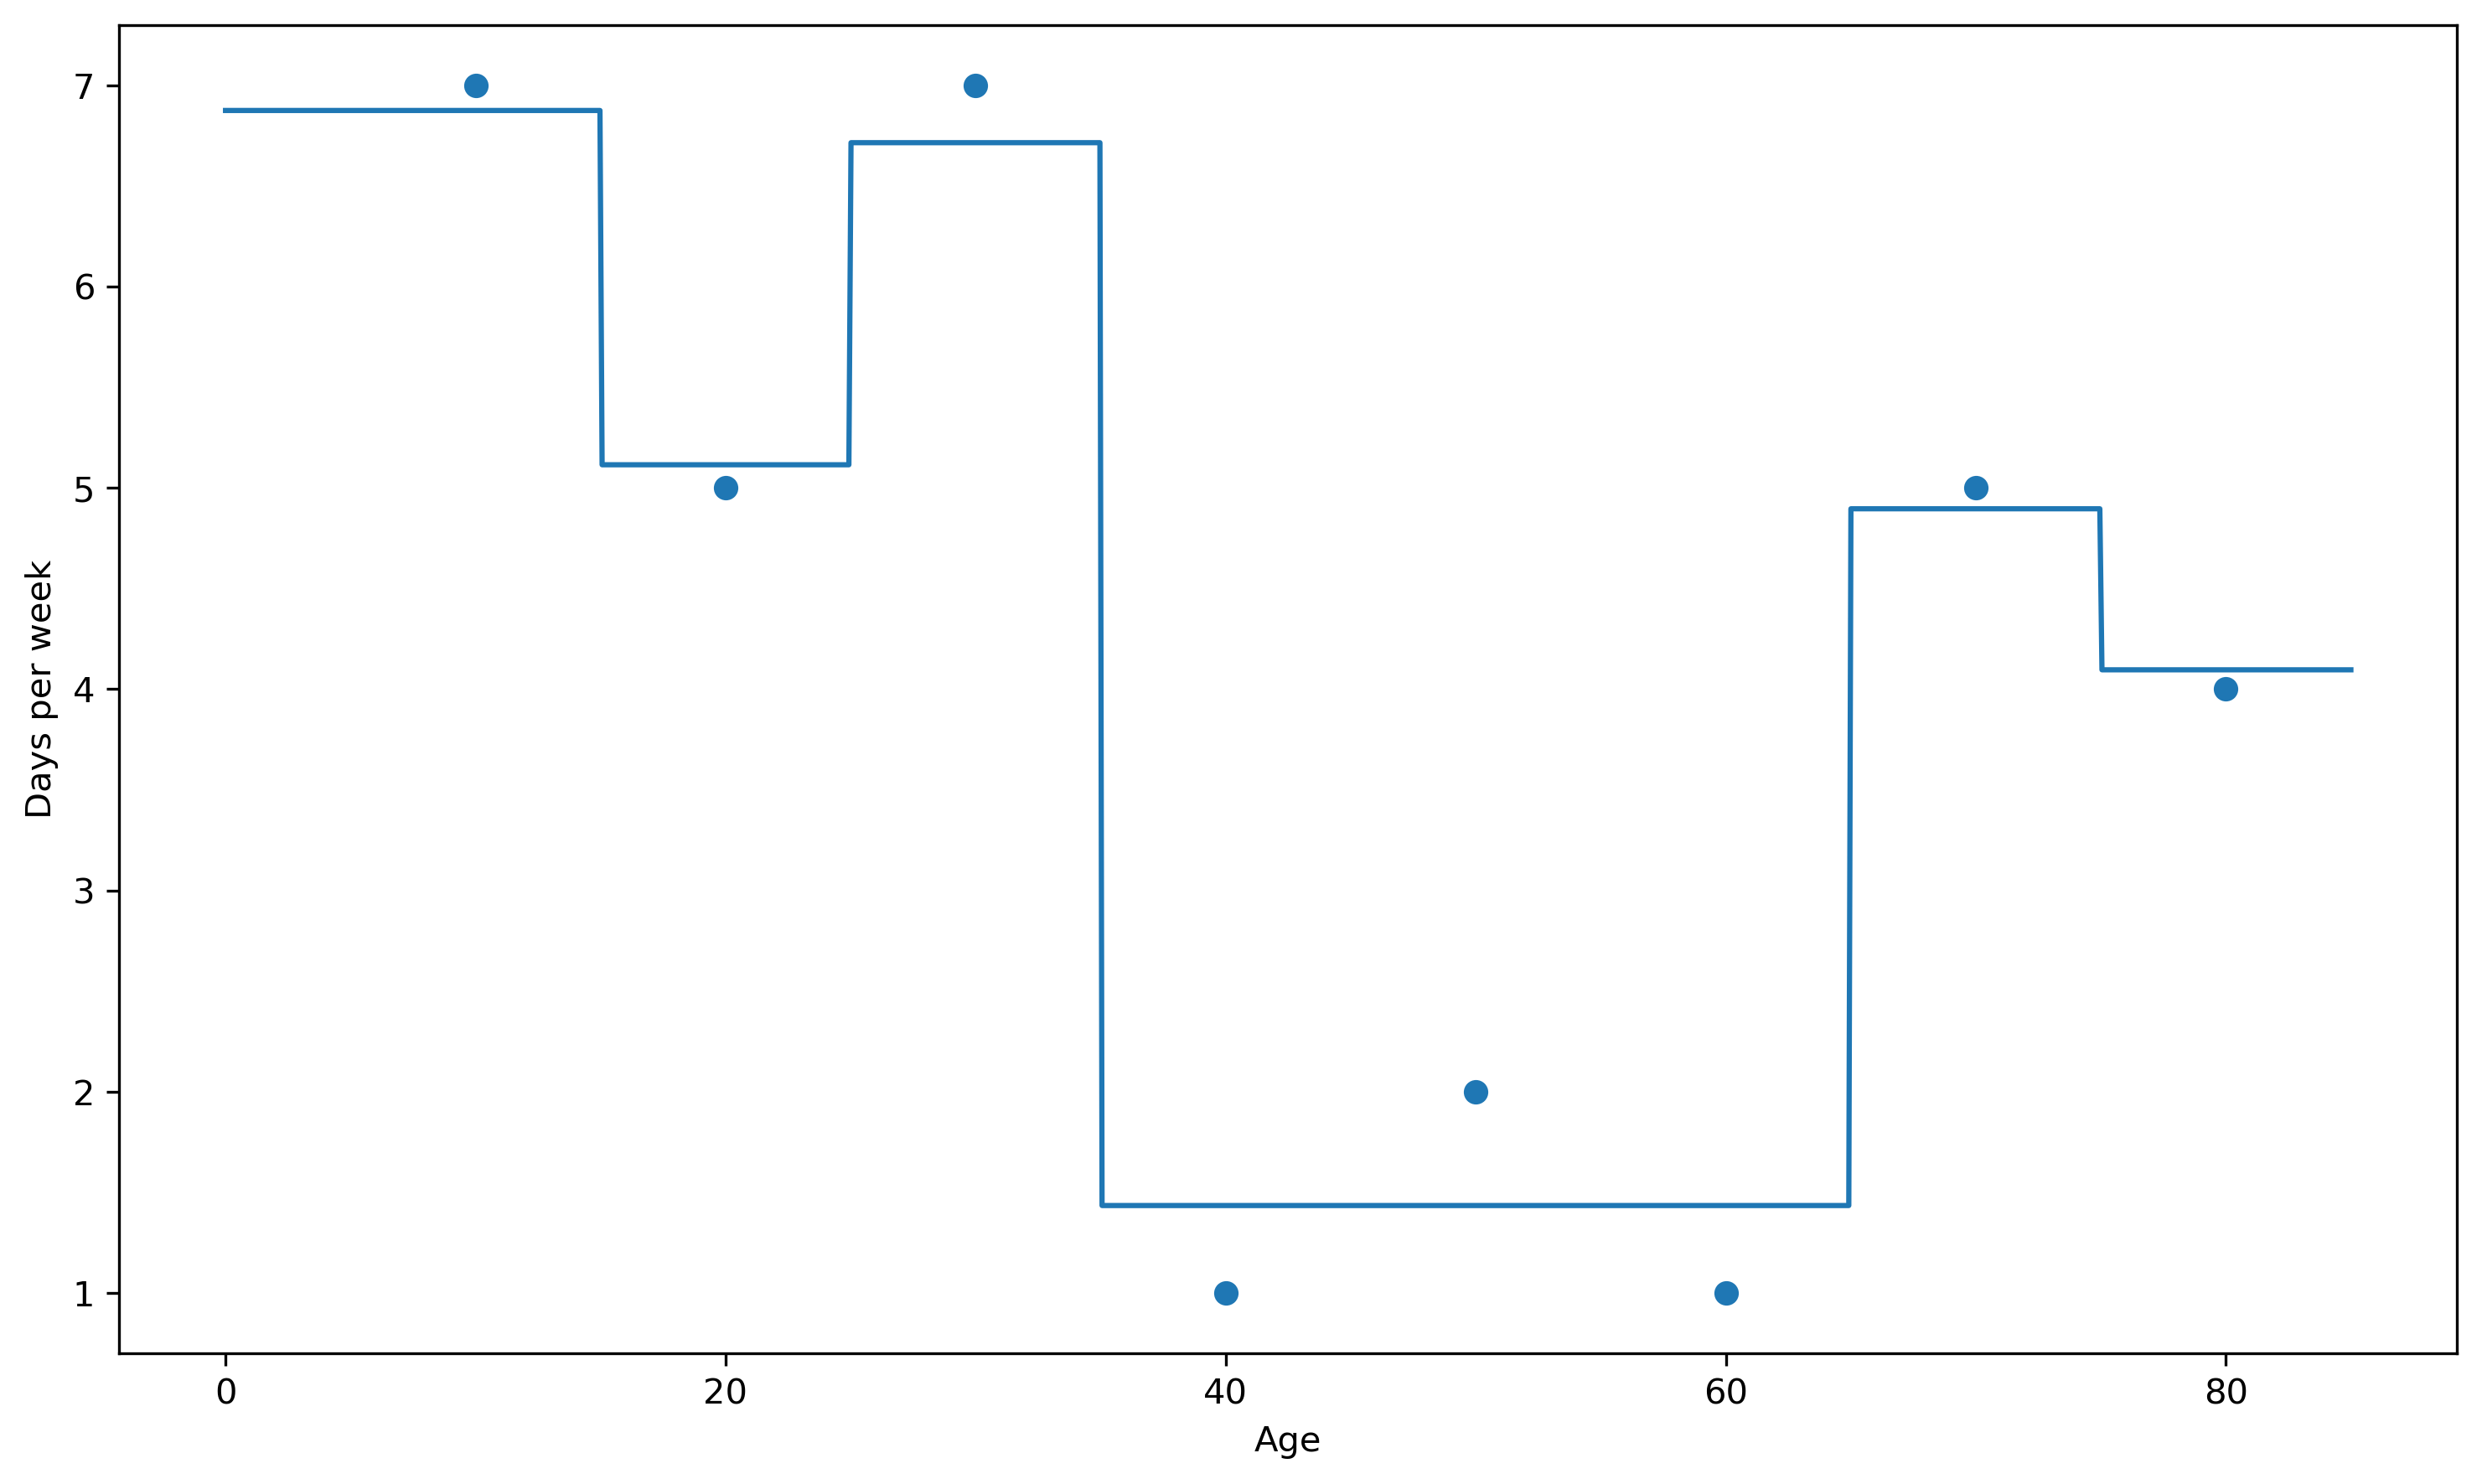

In [20]:
for i in range(1,5):
    print("Up to weak learner number", i)
    gb_intermediate = GradientBoostingRegressor(max_depth=2, n_estimators=i, learning_rate=0.8)
    gb_intermediate.fit(features, labels)
    predictions = gb_intermediate.predict(features)
    plot_regressor(gb_intermediate, features, labels);

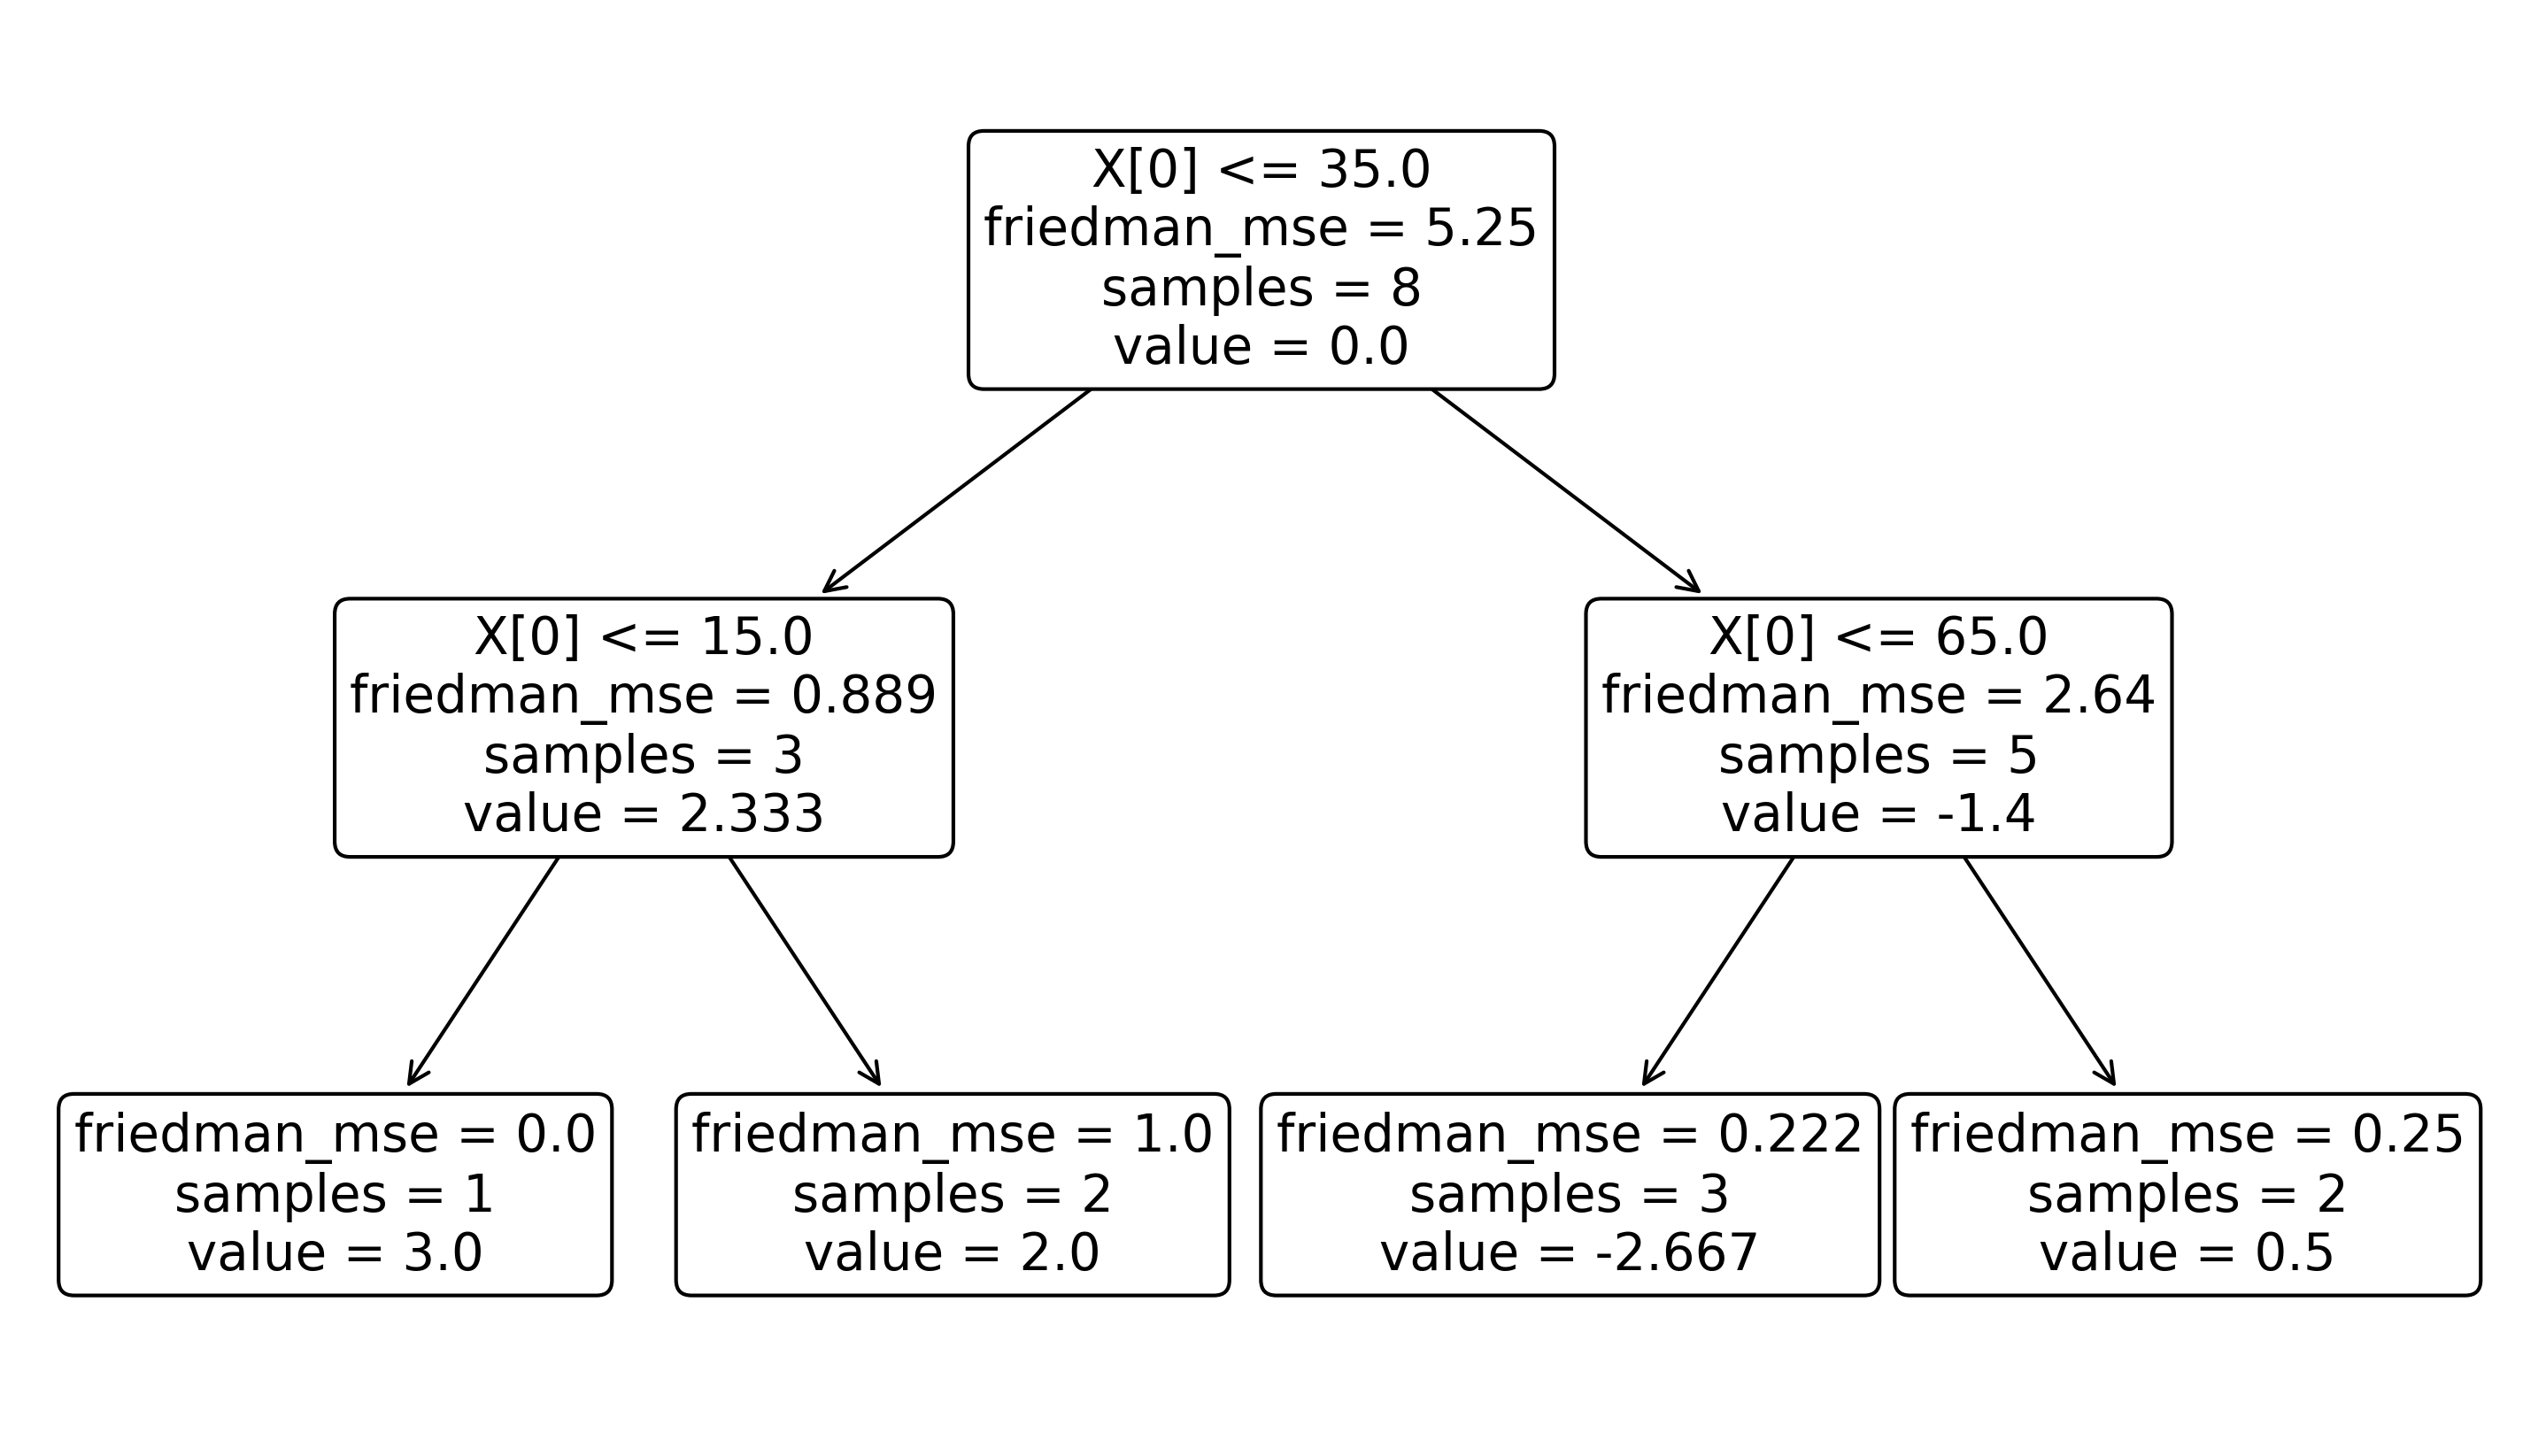

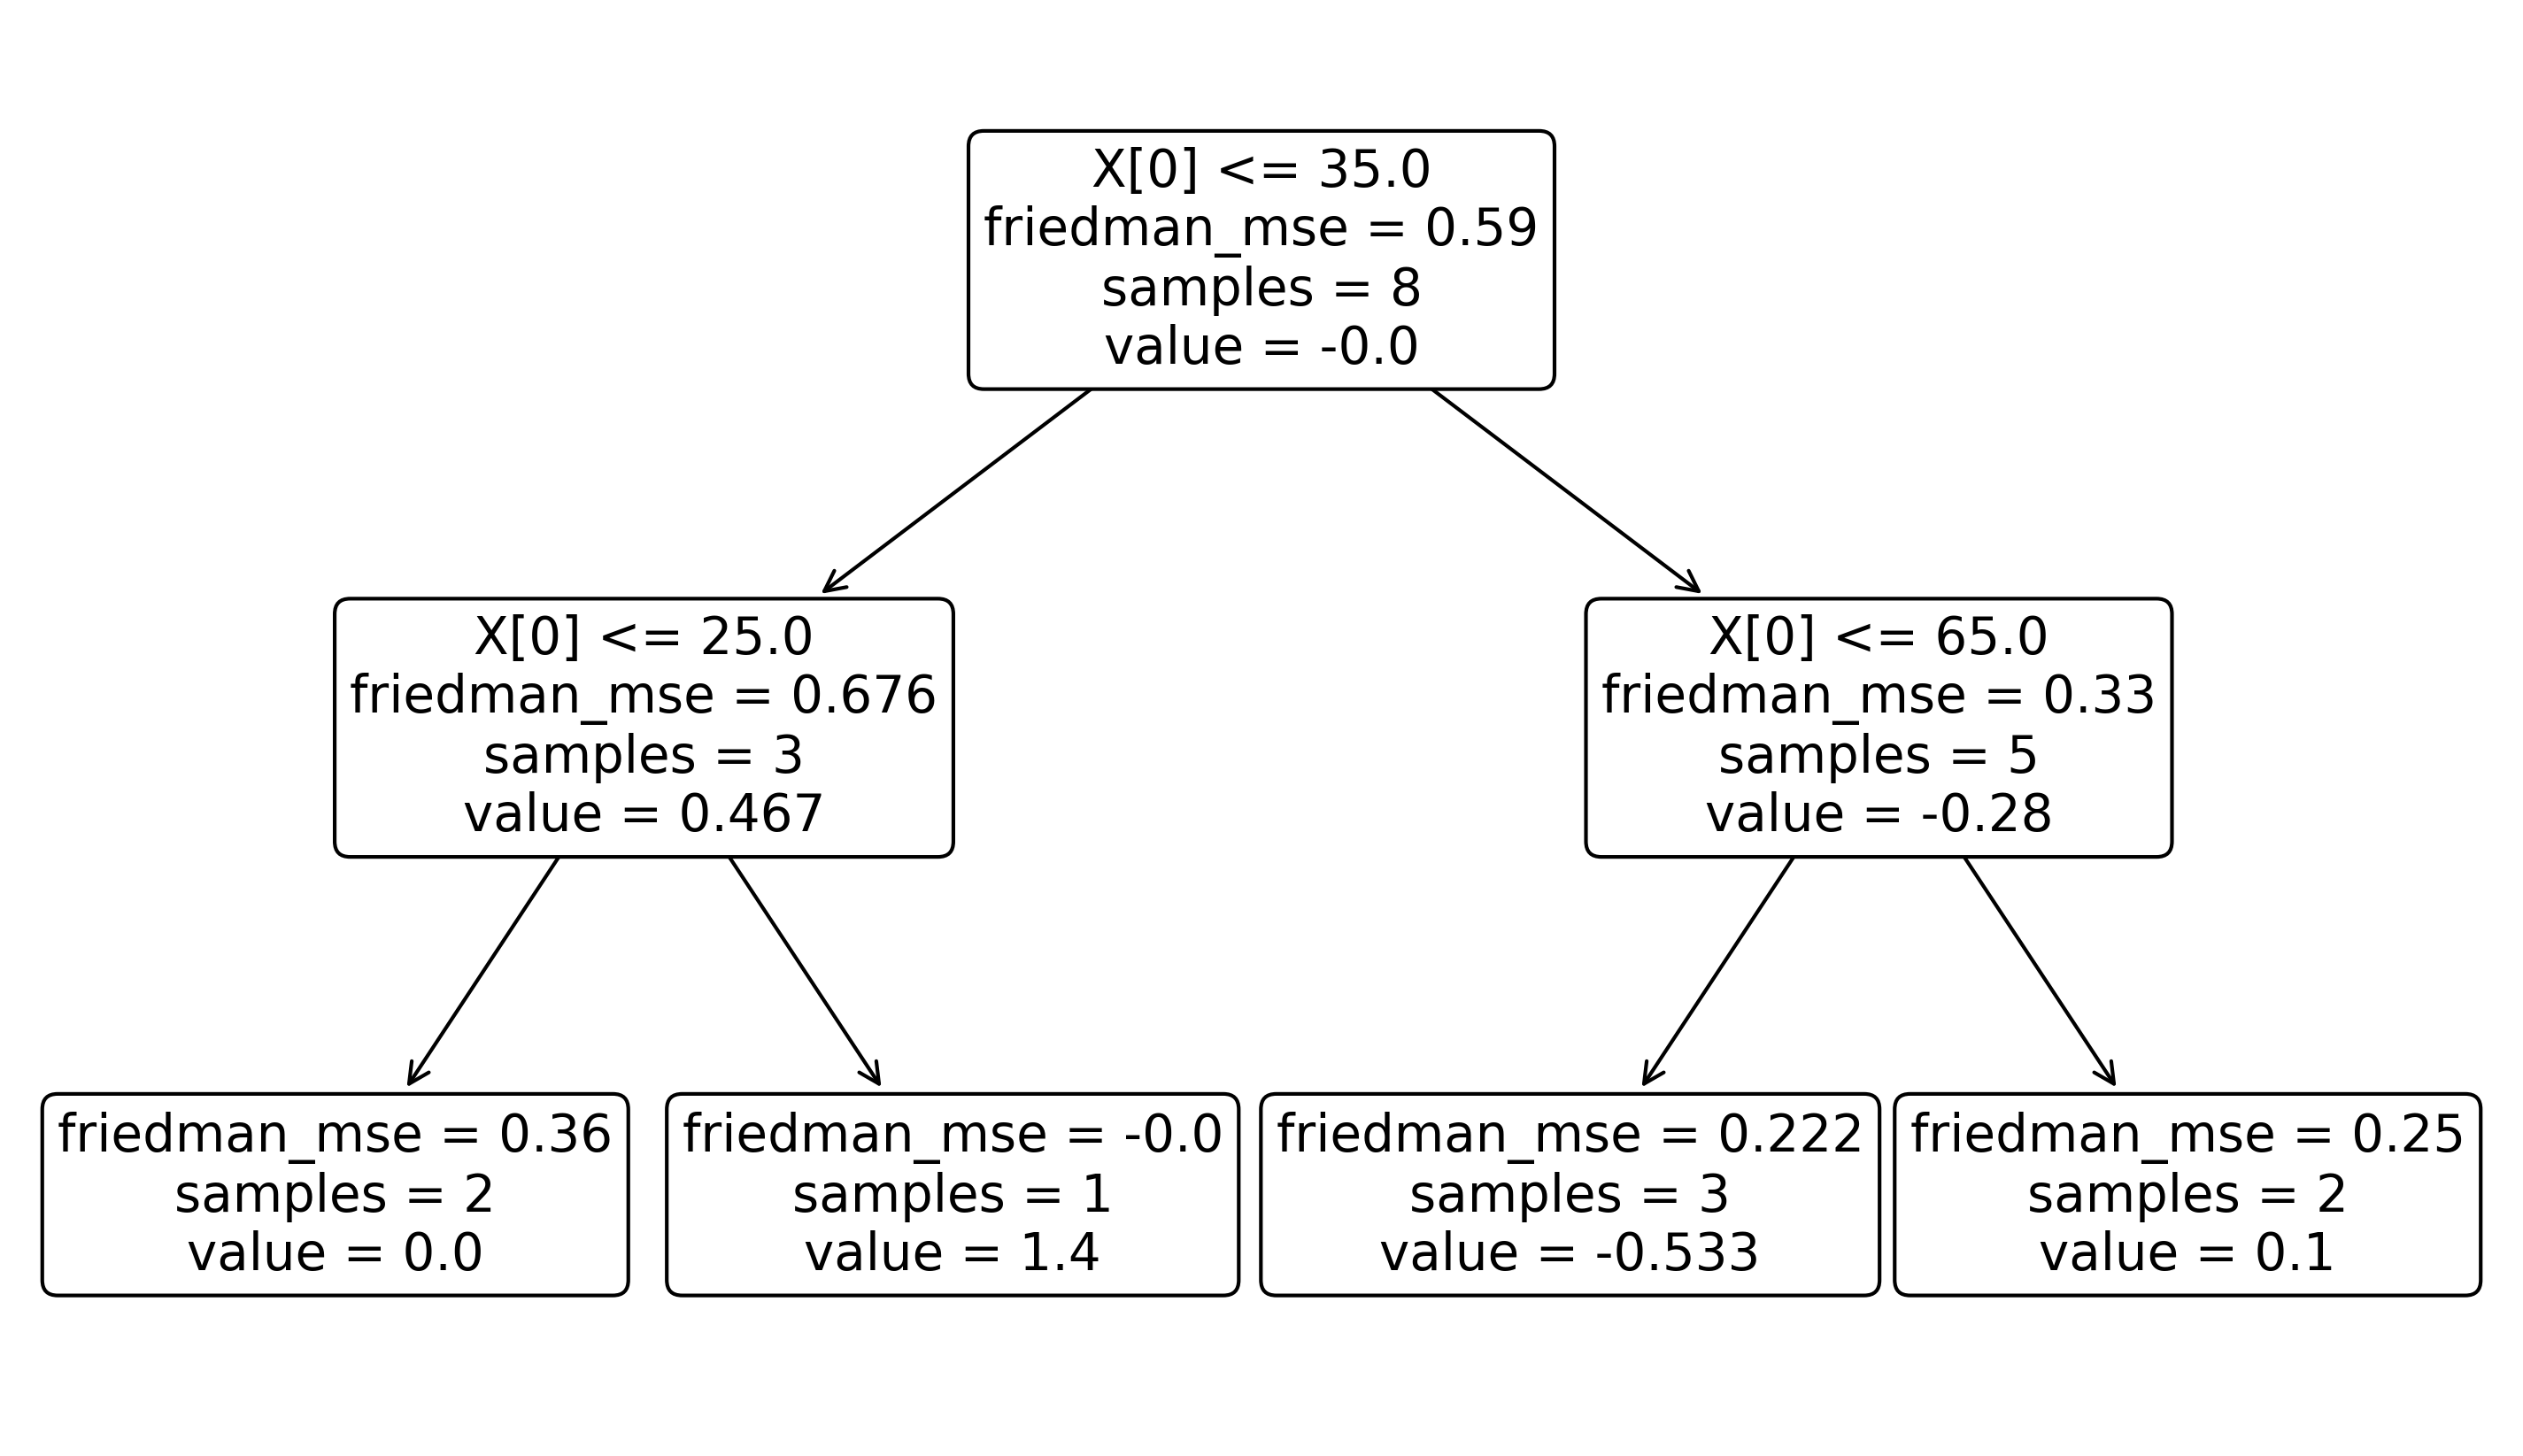

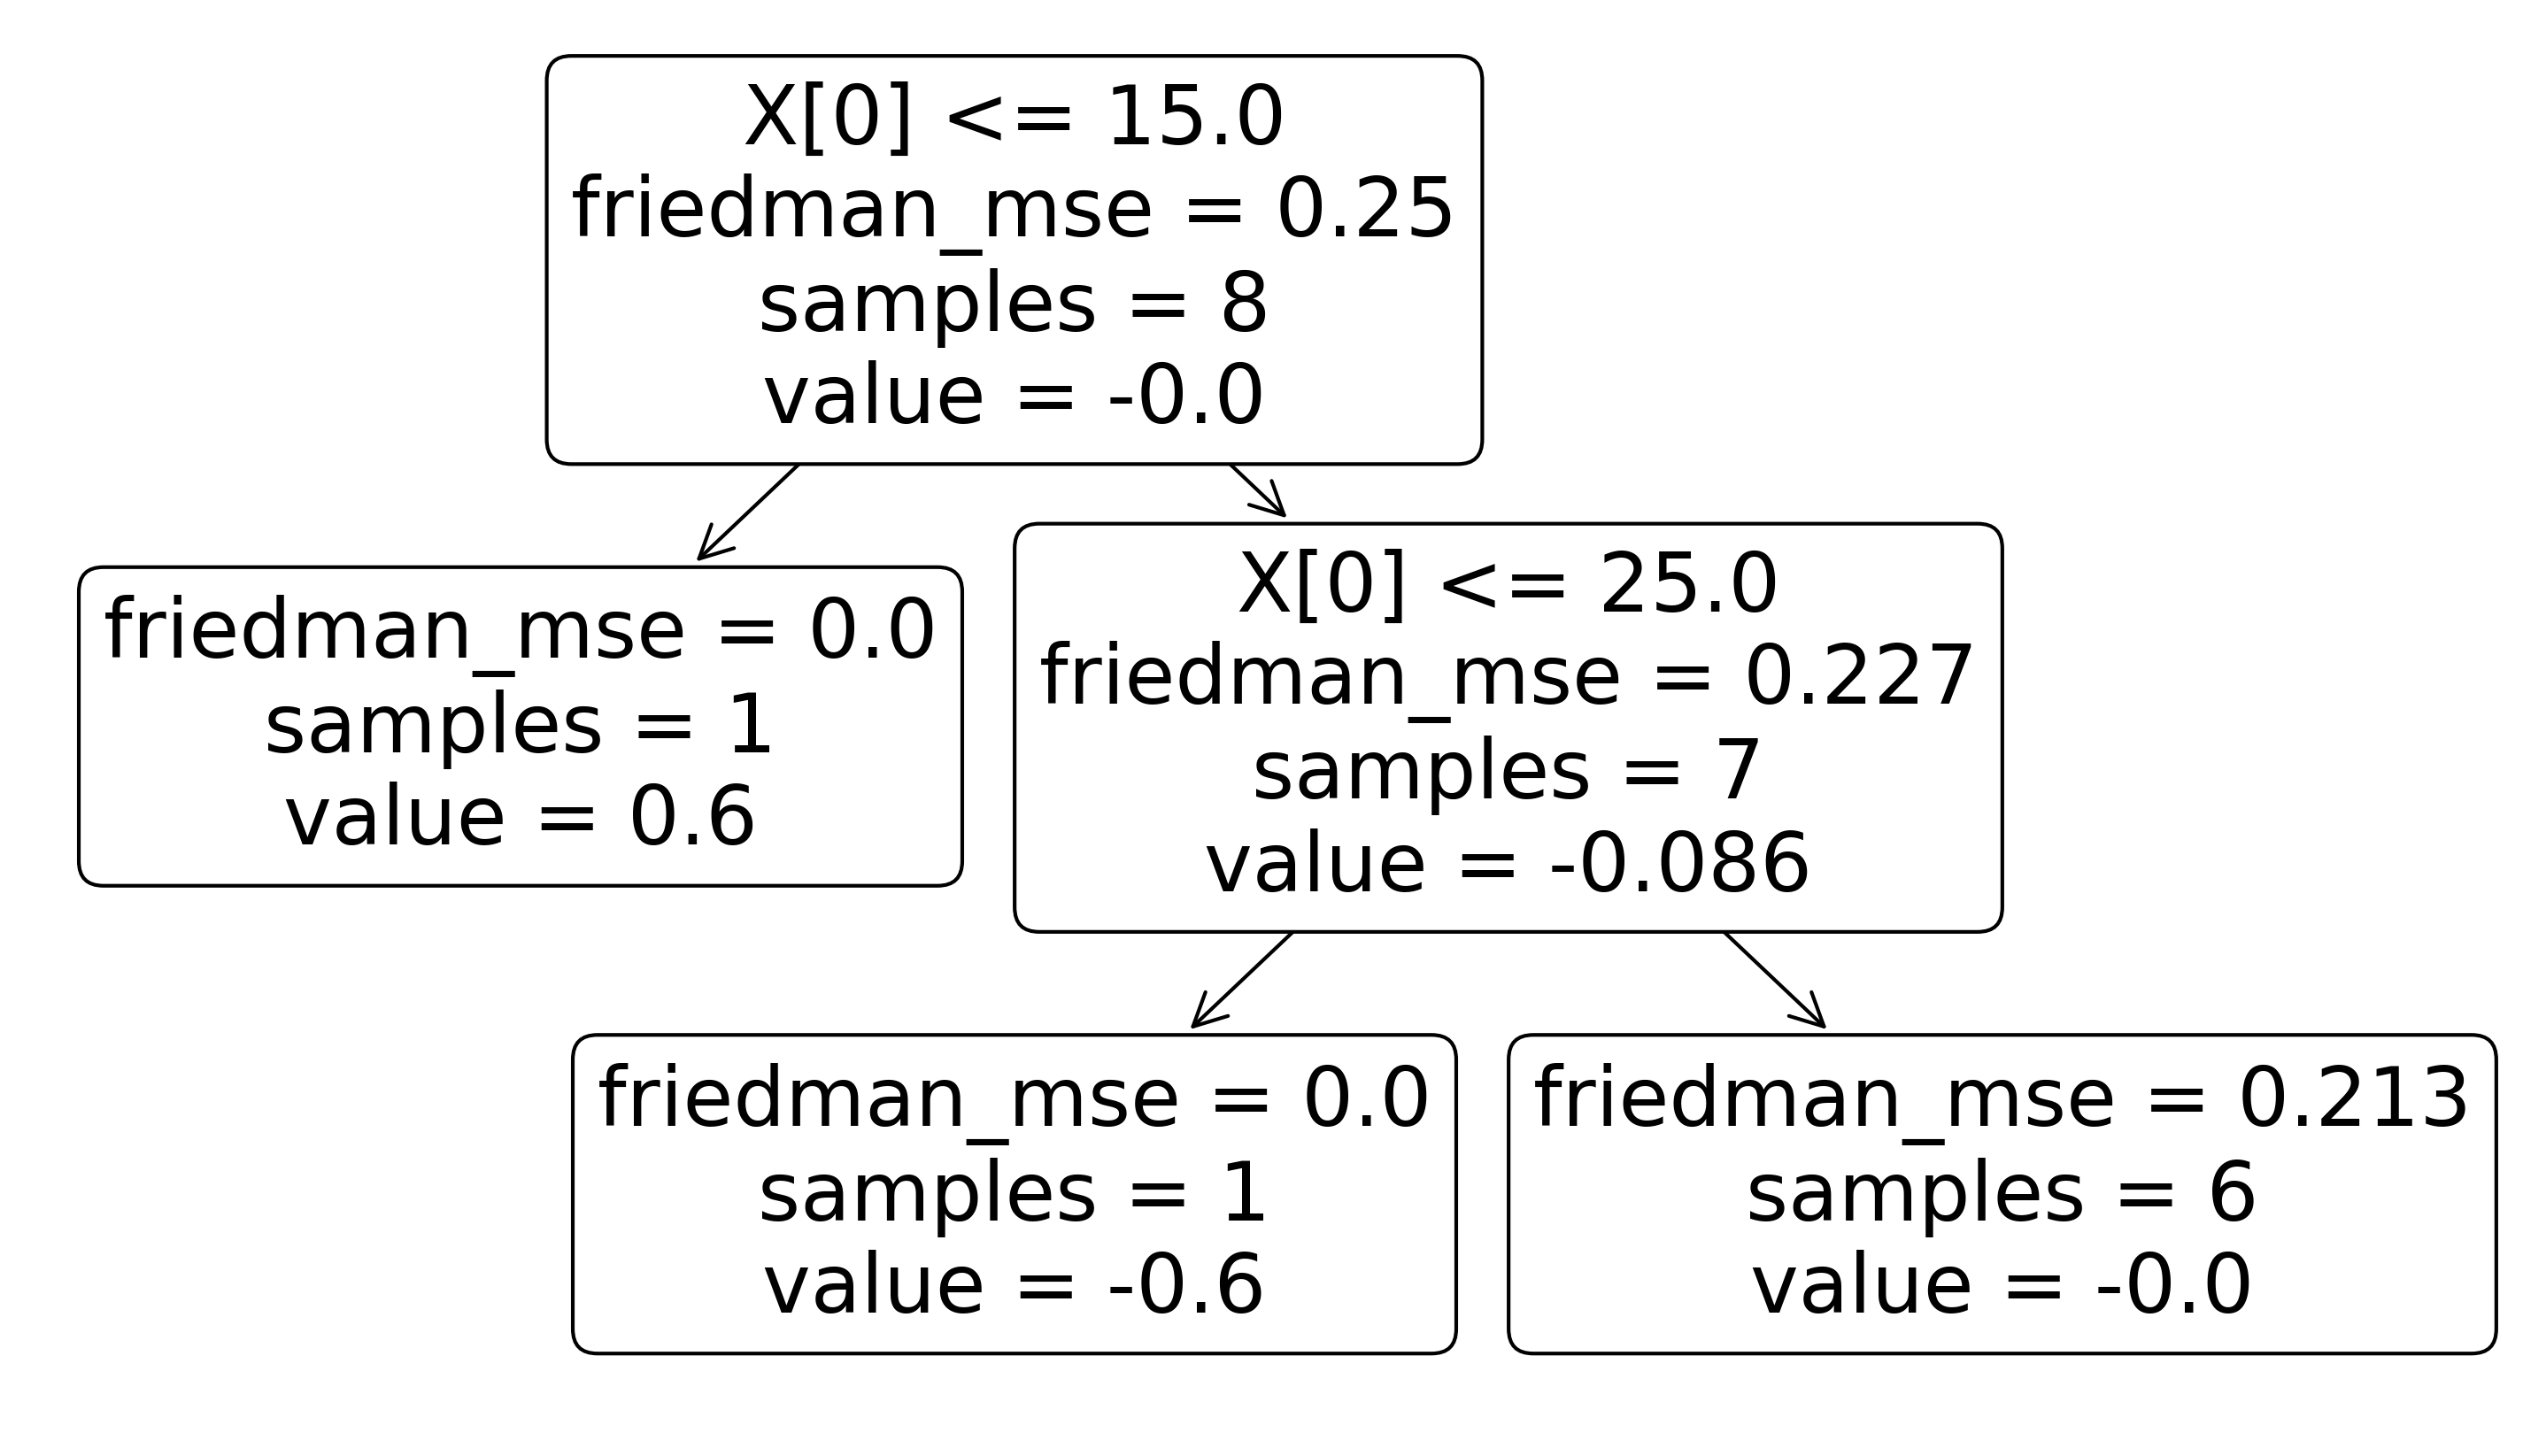

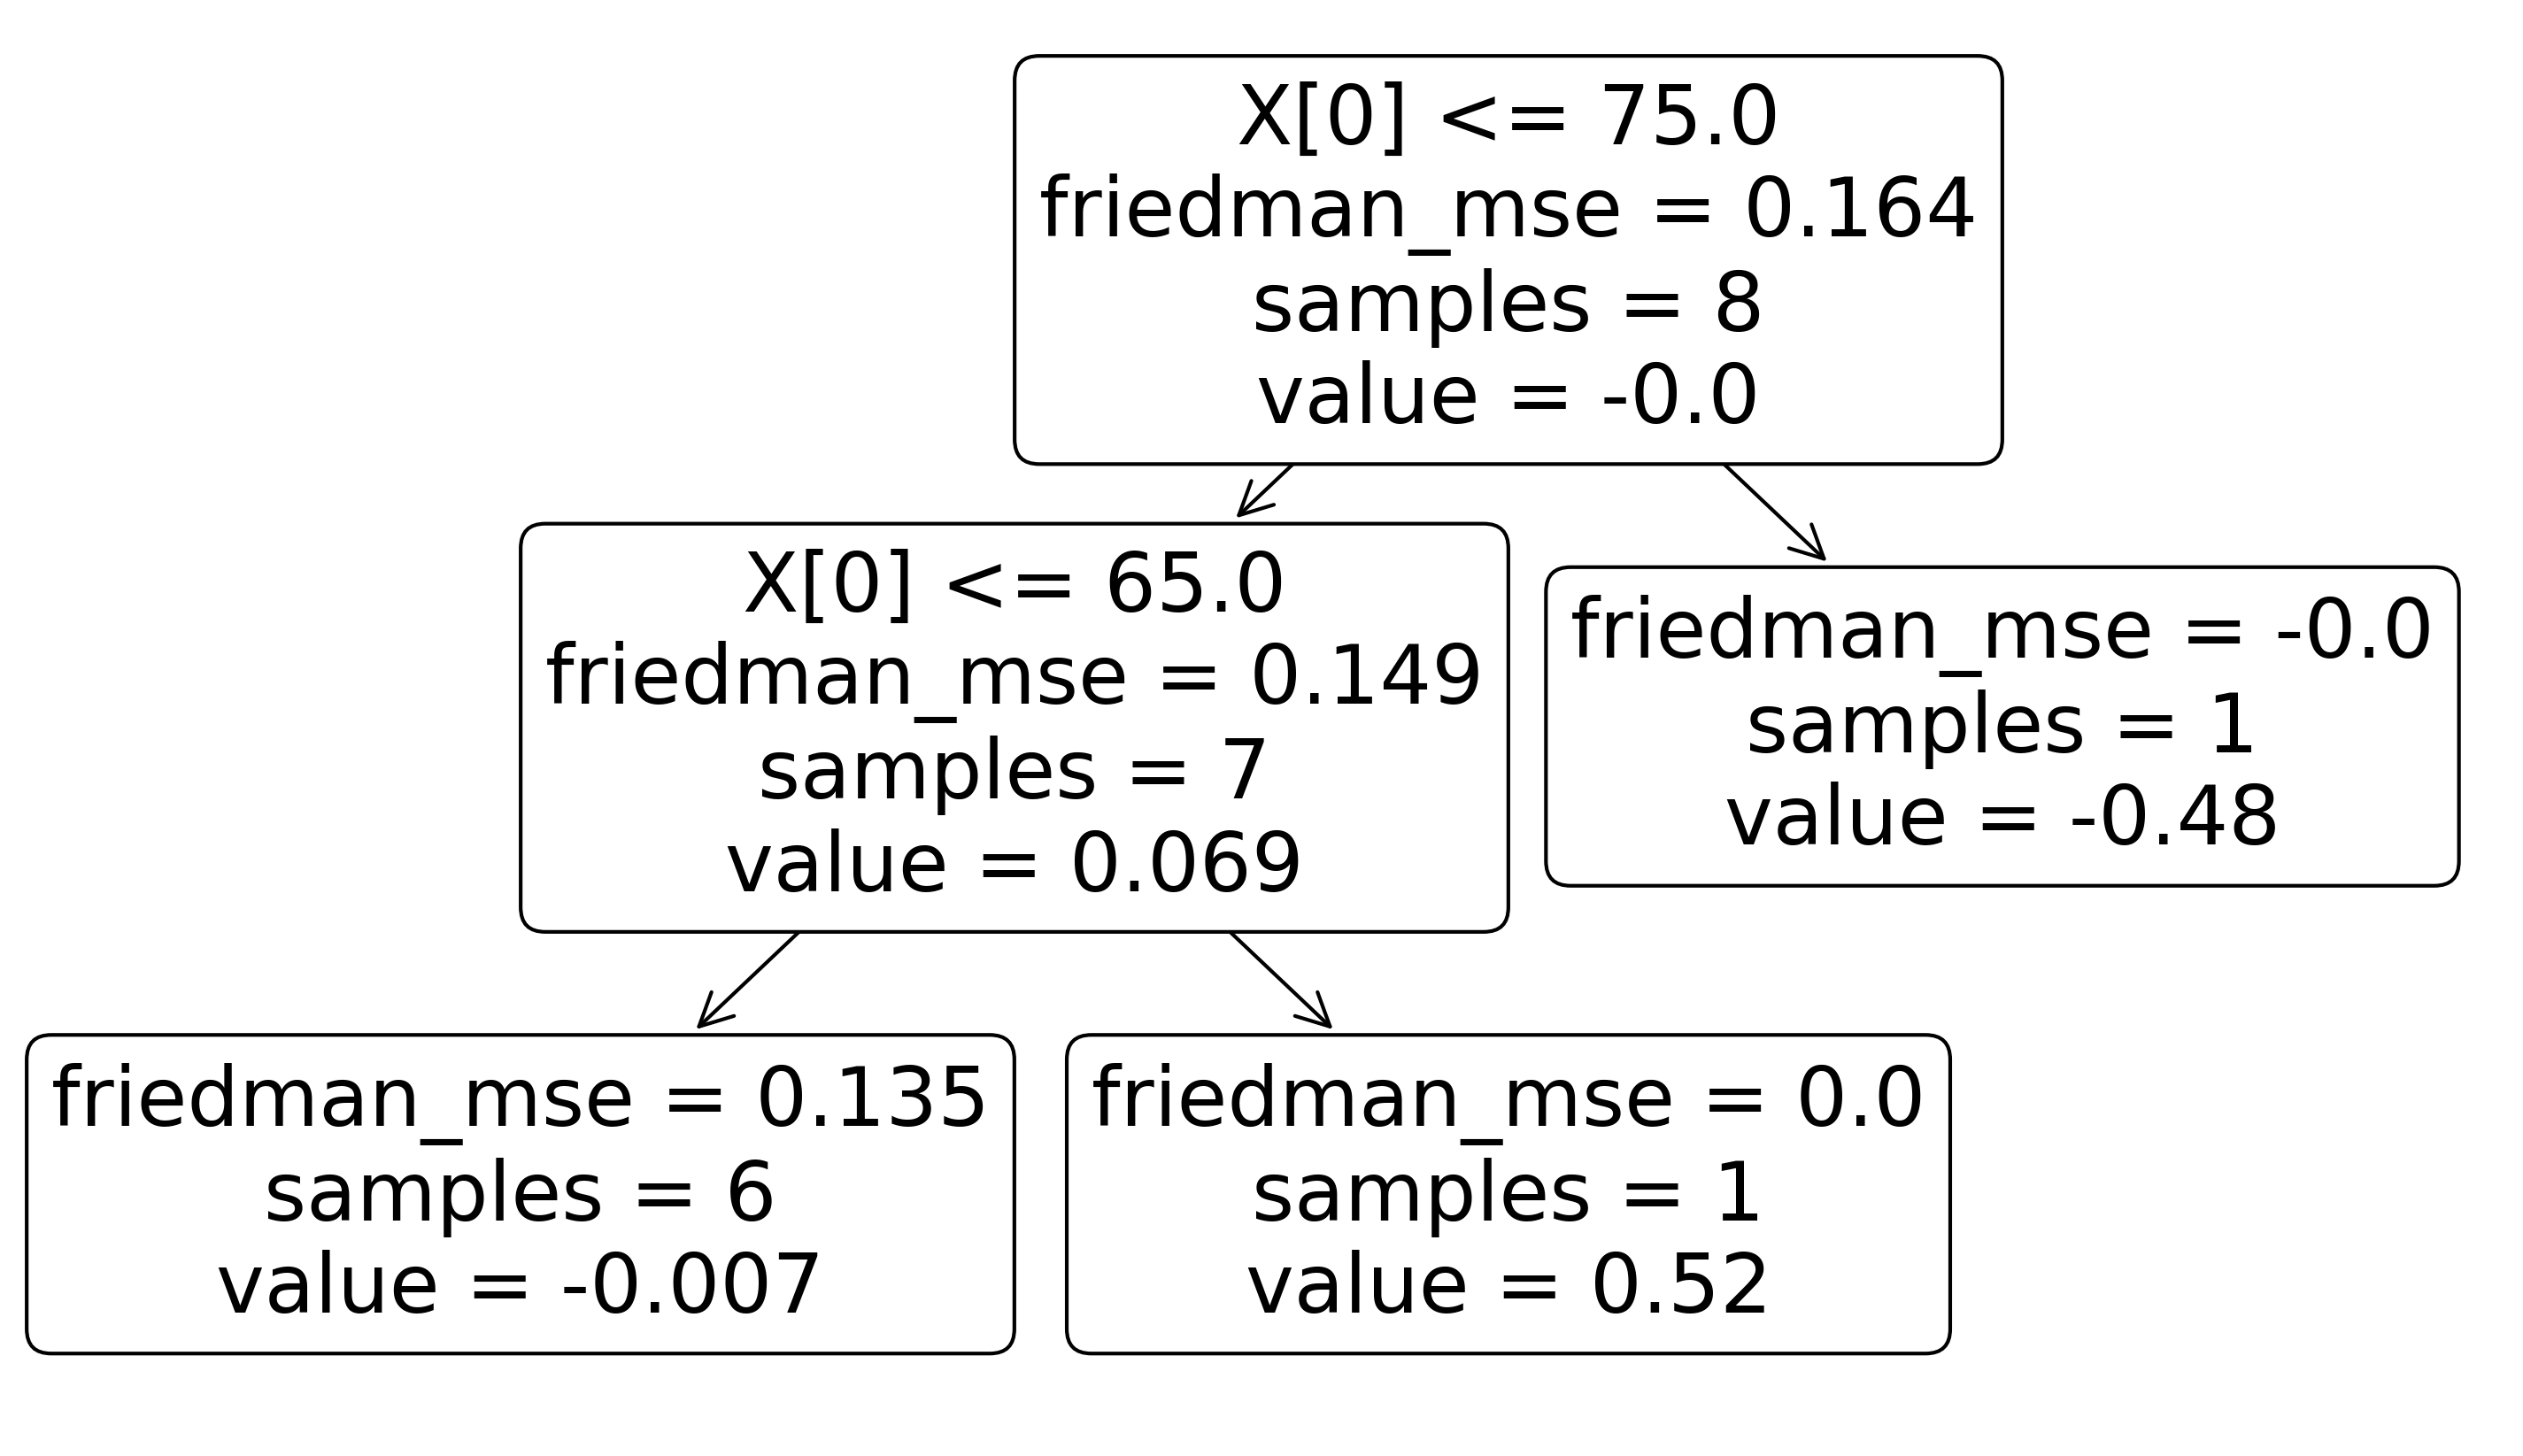

In [21]:
for tree in gradient_boosting_regressor.estimators_:
    sklearn.tree.plot_tree(tree[0], rounded=True)
    plt.show()

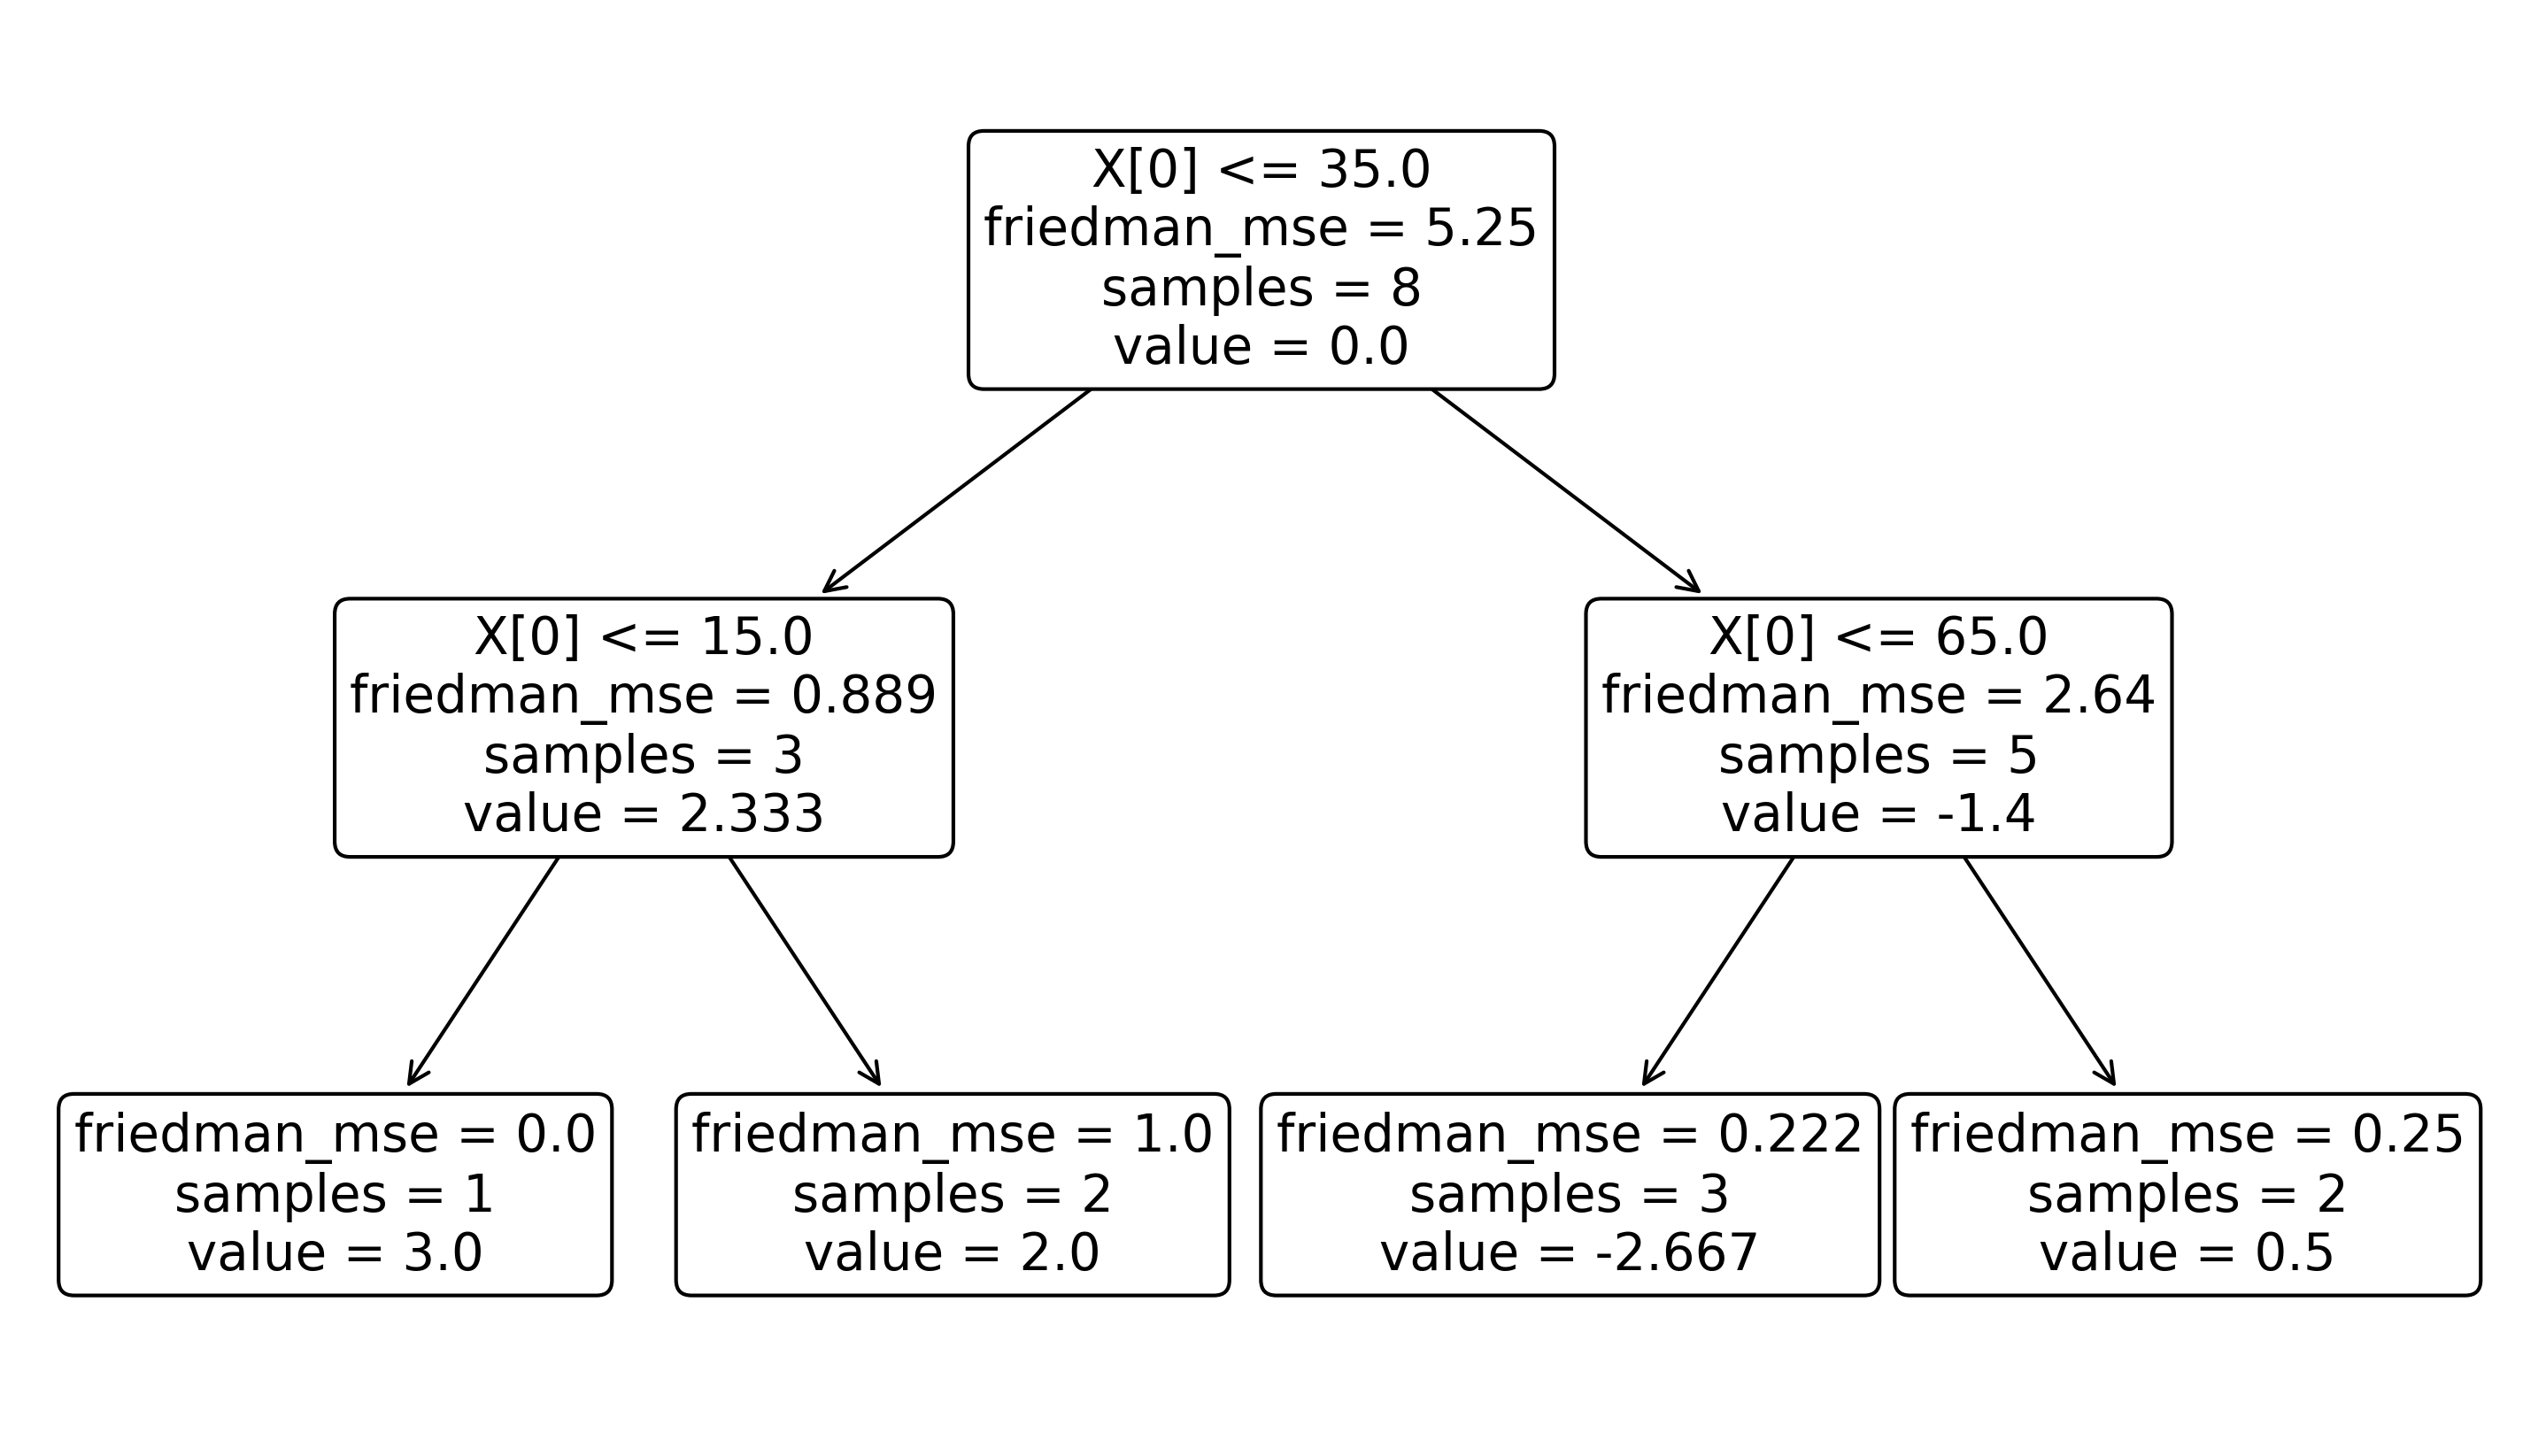

In [22]:
sklearn.tree.plot_tree(gradient_boosting_regressor.estimators_[0][0], rounded=True);

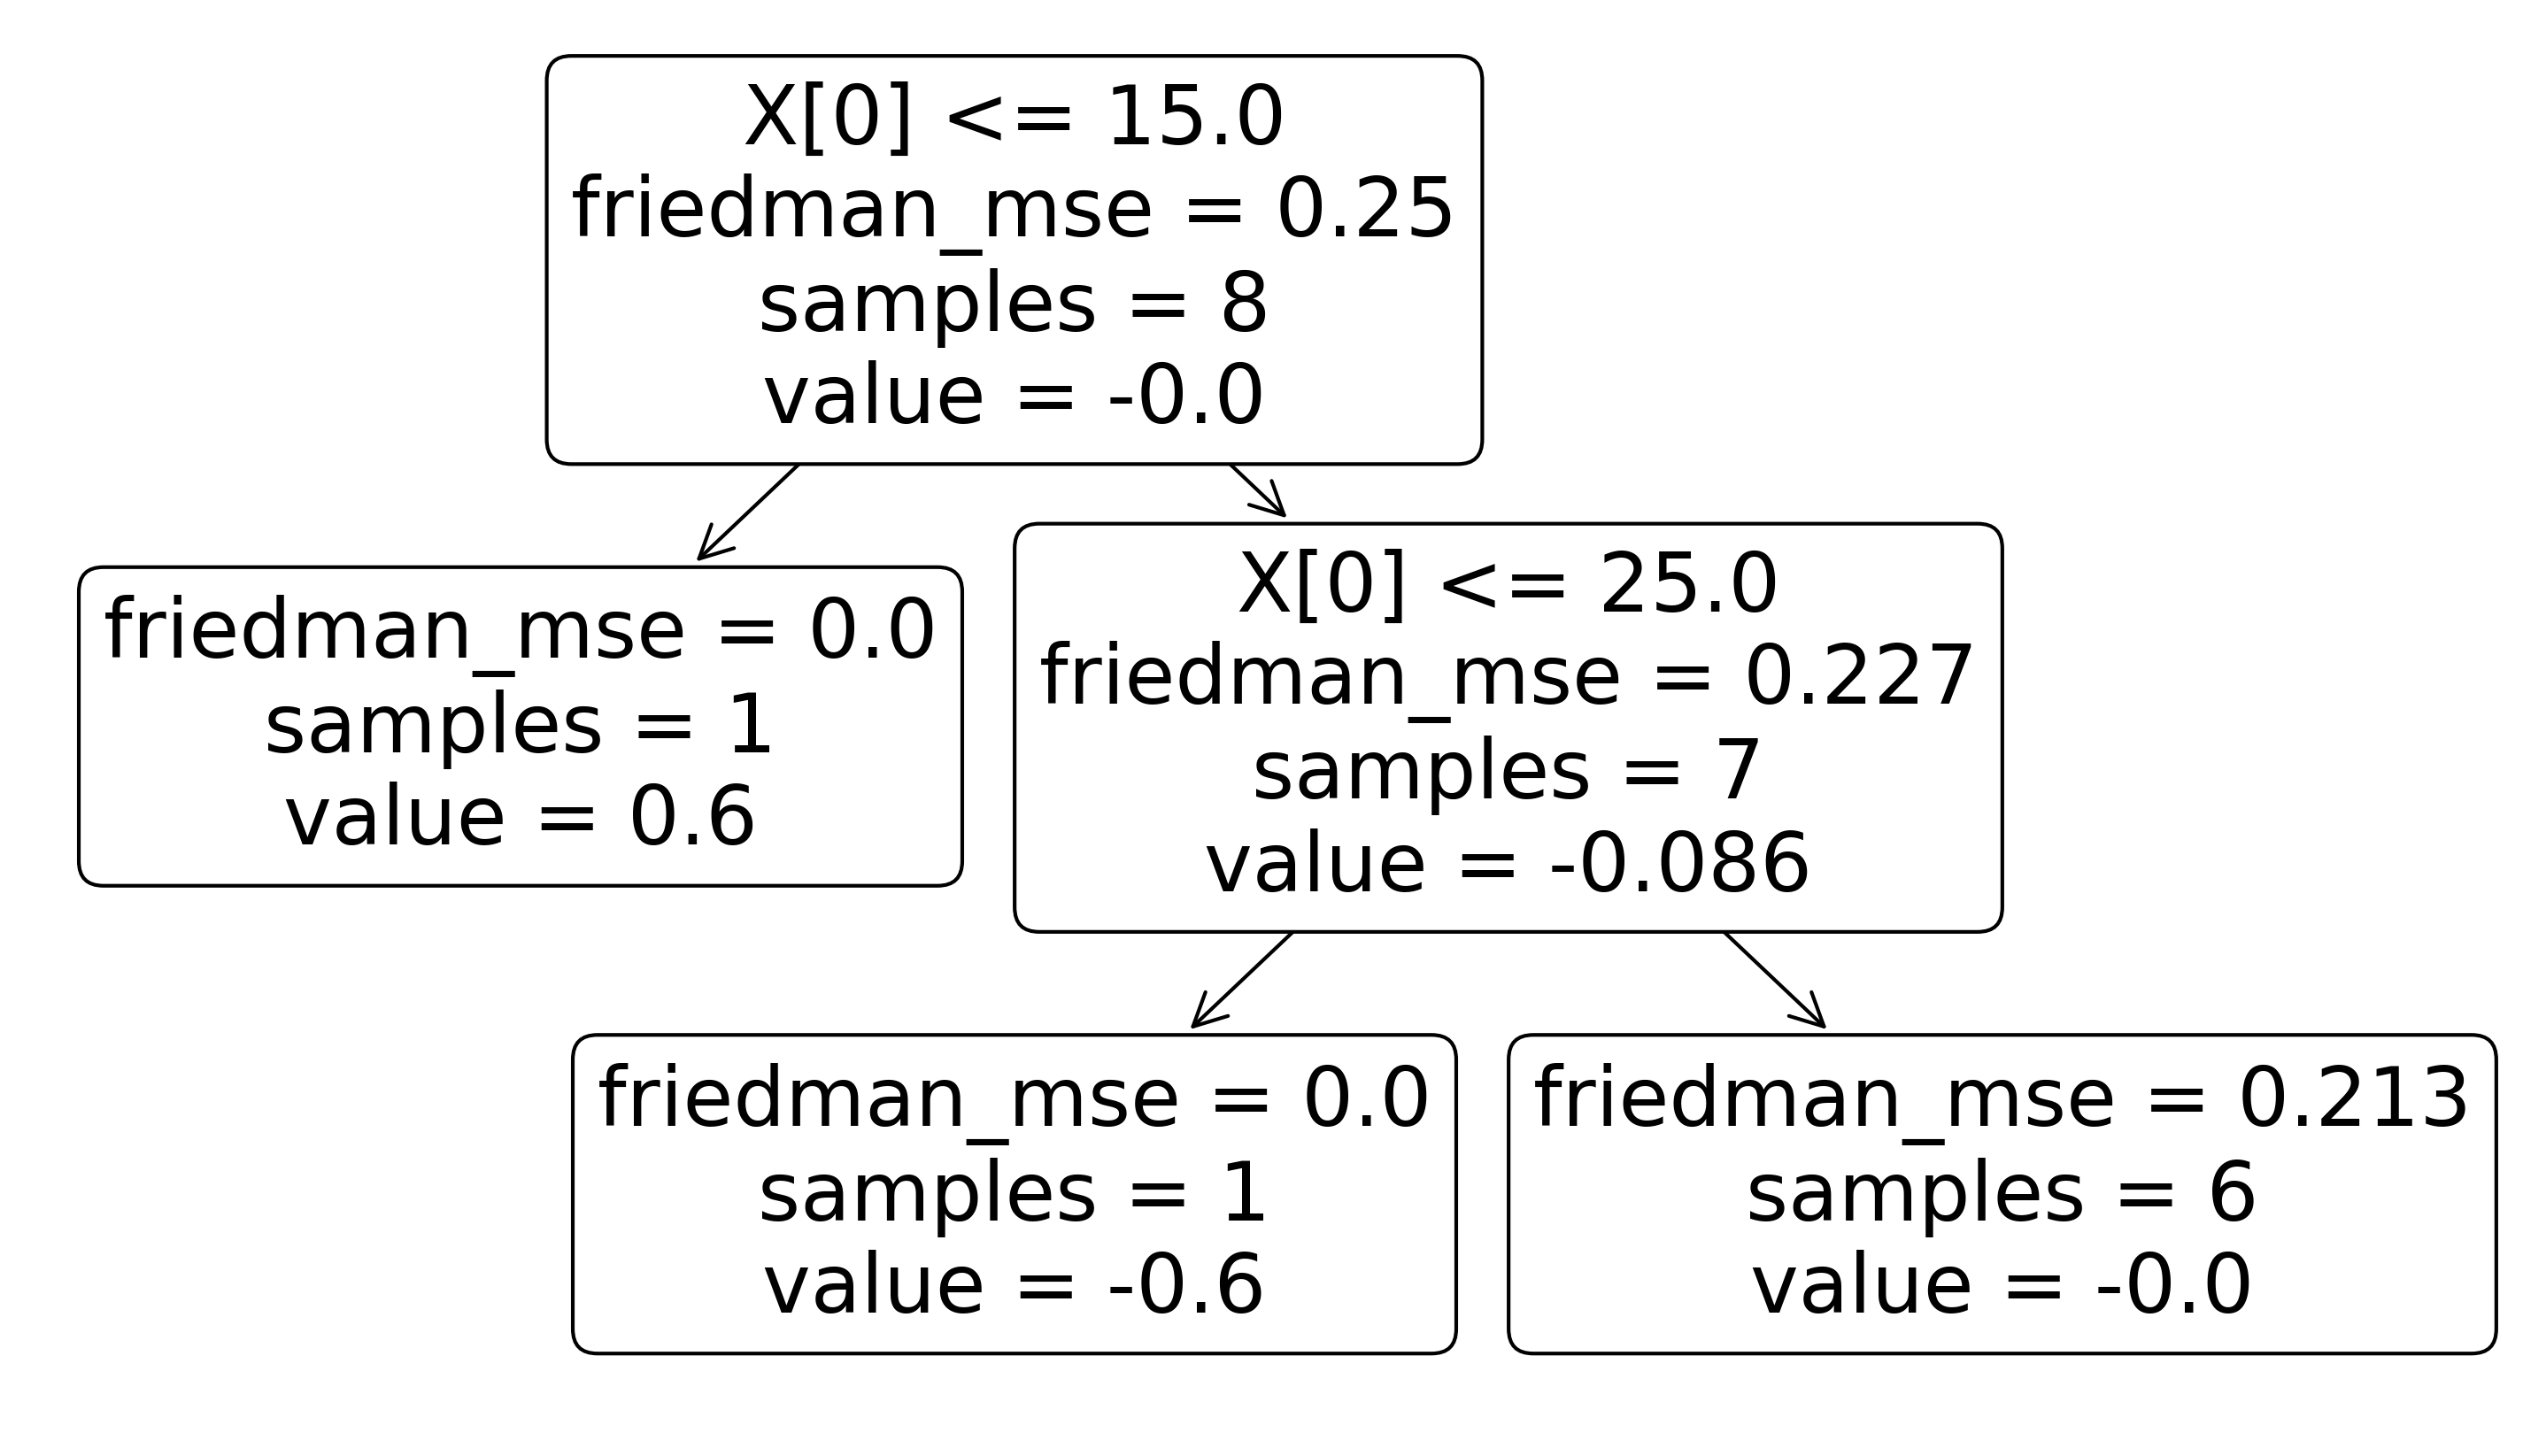

In [23]:
sklearn.tree.plot_tree(gradient_boosting_regressor.estimators_[2][0], rounded=True);

## Further info

In [24]:
import xgboost
from xgboost import XGBRegressor

/Users/pankajksingh/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [25]:
xgboost_regressor = XGBRegressor(random_state = 0,
                                 n_estimators = 3,
                                 max_depth = 2,
                                 reg_lambda = 0,
                                 min_split_loss = 1,
                                 learning_rate = 0.7)
xgboost_regressor.fit(features, labels)
xgboost_regressor.score(features, labels)

0.9438806326863372

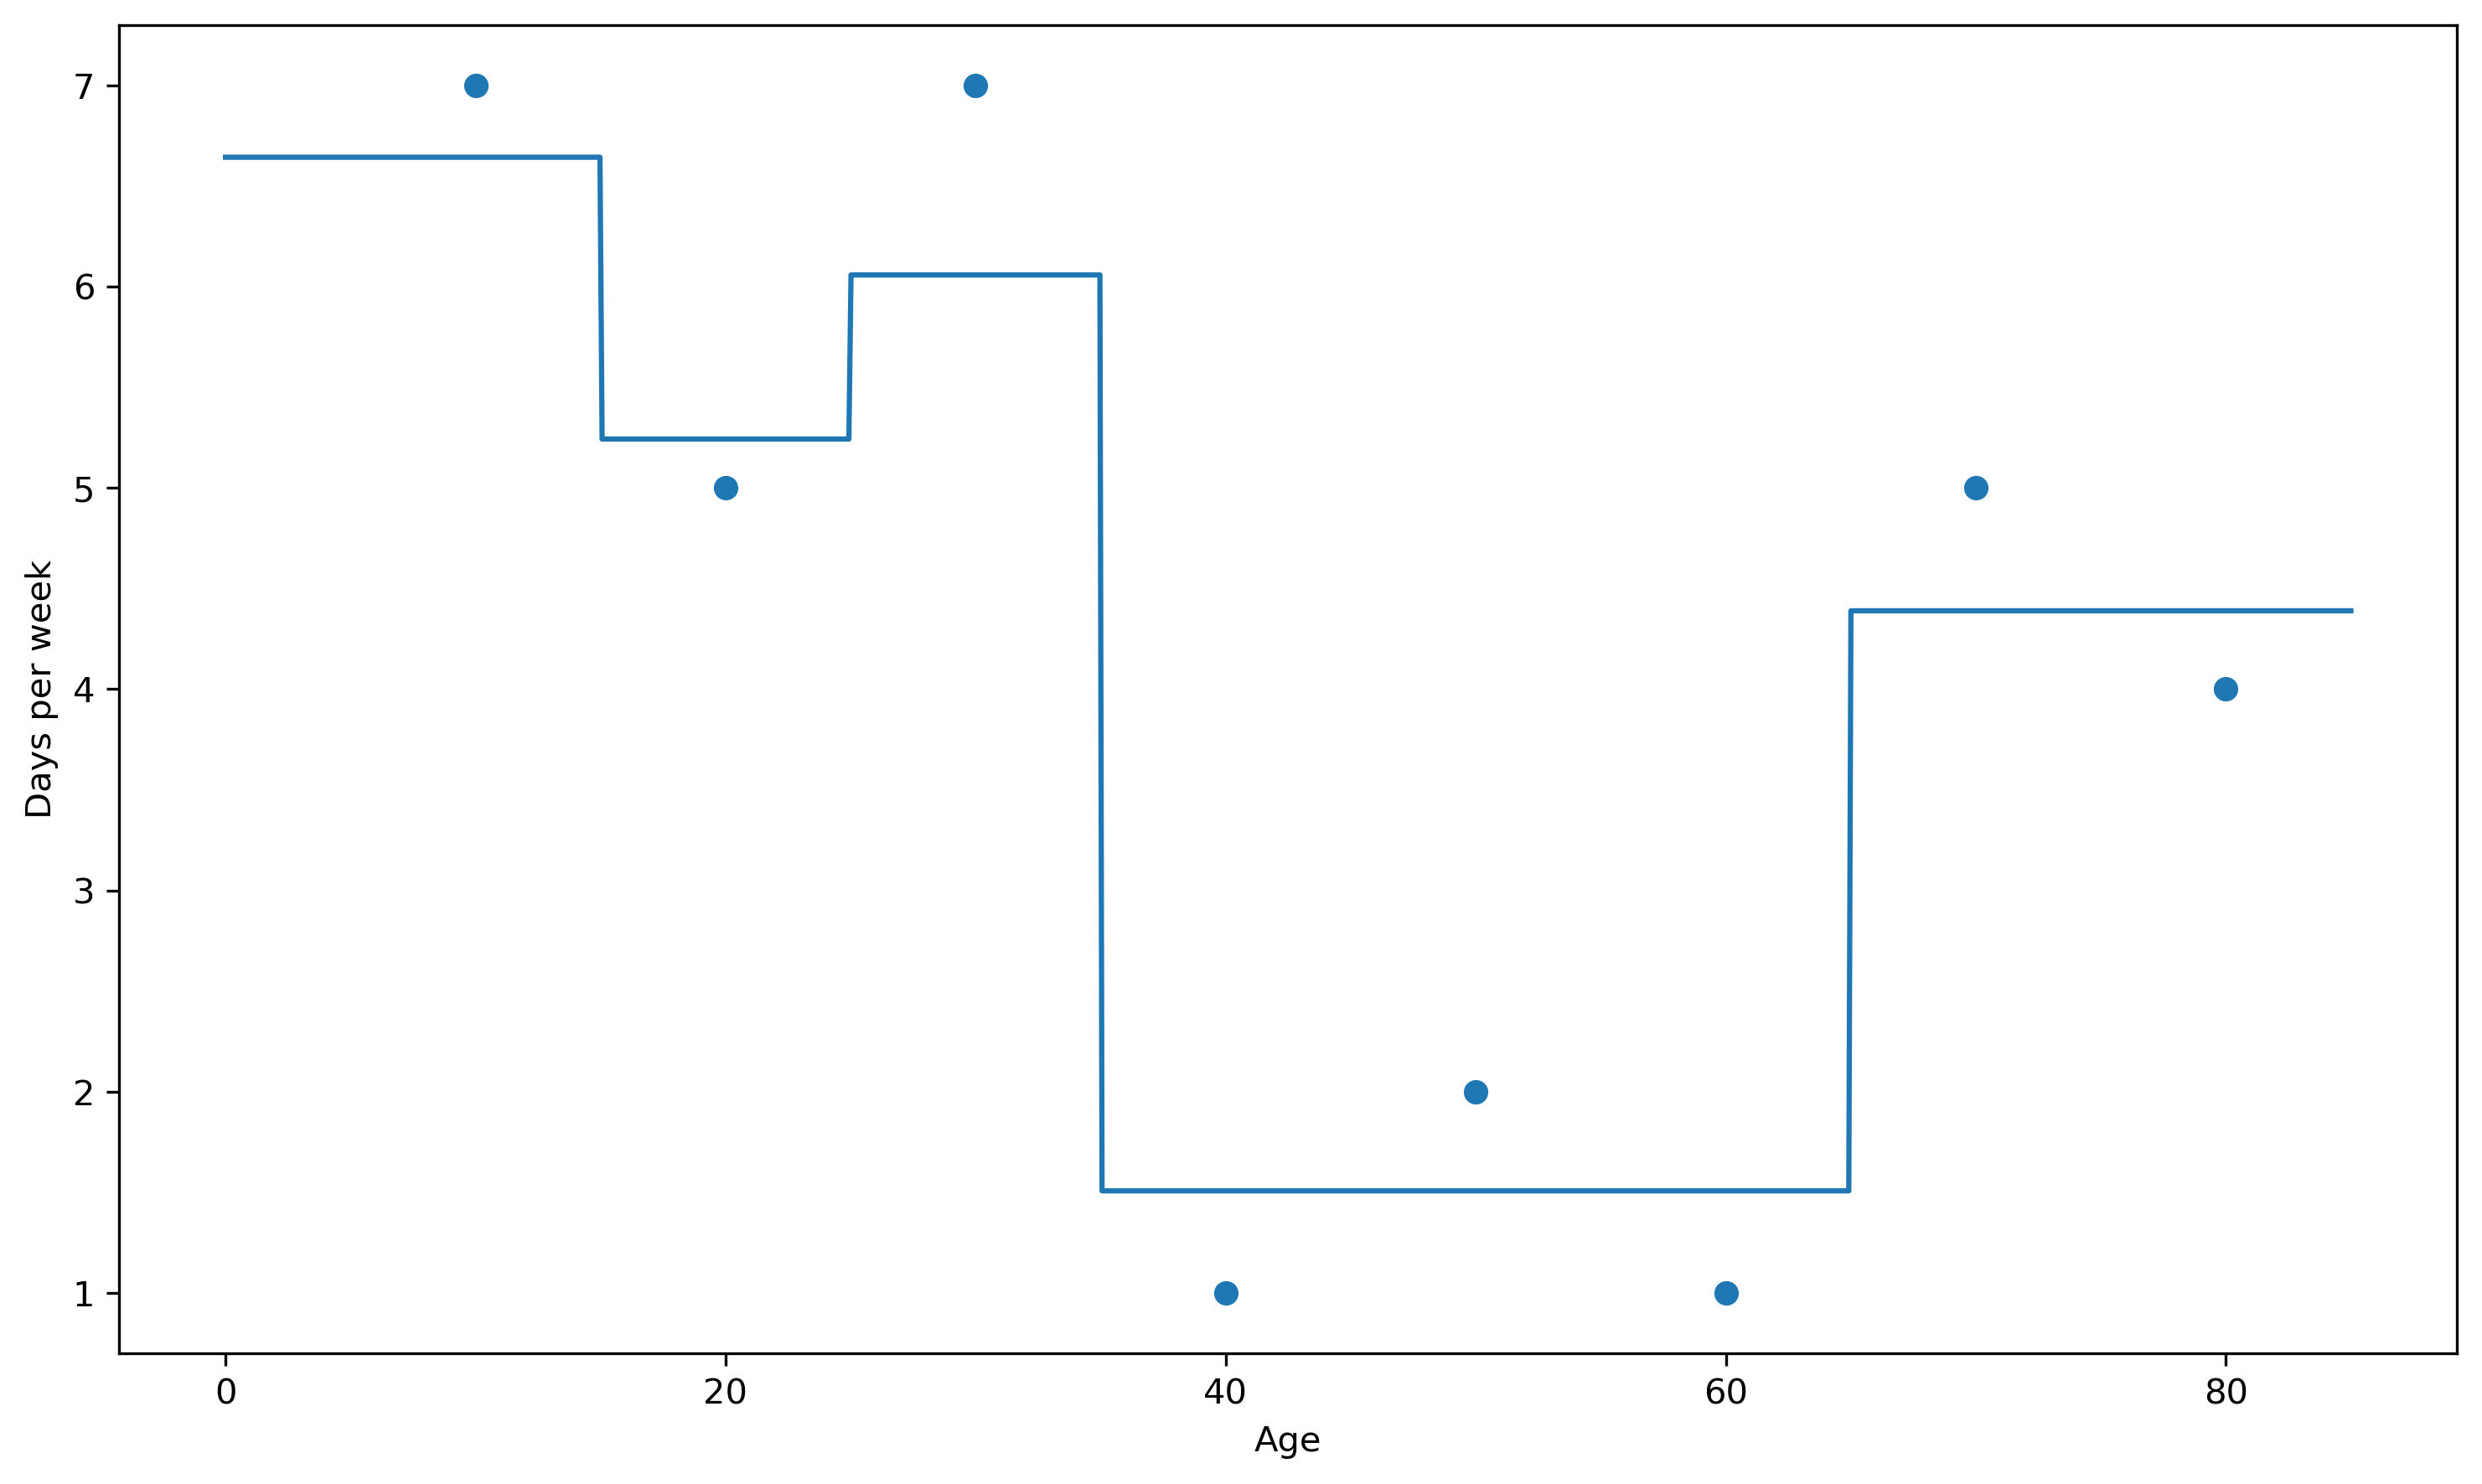

In [26]:
plot_regressor(xgboost_regressor, features, labels)

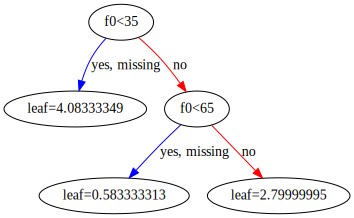

In [27]:
xgboost.to_graphviz(xgboost_regressor, num_trees=0)

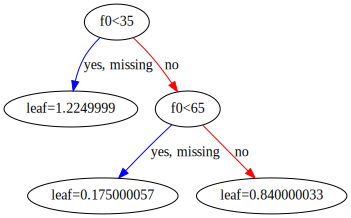

In [28]:
xgboost.to_graphviz(xgboost_regressor, num_trees=1)

In [29]:
xgboost_regressor.predict(features)

array([6.6425   , 5.2425   , 6.057611 , 1.5076112, 1.5076112, 1.5076112,
       4.3892775, 4.3892775], dtype=float32)

---
# Similarity Score

In [30]:
residuals = labels - 0.5
residuals

array([6.5, 4.5, 6.5, 0.5, 1.5, 0.5, 4.5, 3.5])

In [31]:
def score(l ,lam=0):
    if len(l) == 0:
        return 0
    return sum(l)**2/(len(l) + lam)

In [32]:
score(residuals, lam=0)

98.0

In [33]:
lam = 0
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()

[] [6.5 4.5 6.5 0.5 1.5 0.5 4.5 3.5]
0 98.0
98.0

[6.5] [4.5 6.5 0.5 1.5 0.5 4.5 3.5]
42.25 66.03571428571429
108.28571428571429

[6.5 4.5] [6.5 0.5 1.5 0.5 4.5 3.5]
60.5 48.166666666666664
108.66666666666666

[6.5 4.5 6.5] [0.5 1.5 0.5 4.5 3.5]
102.08333333333333 22.05
124.13333333333333

[6.5 4.5 6.5 0.5] [1.5 0.5 4.5 3.5]
81.0 25.0
106.0

[6.5 4.5 6.5 0.5 1.5] [0.5 4.5 3.5]
76.05 24.083333333333332
100.13333333333333

[6.5 4.5 6.5 0.5 1.5 0.5] [4.5 3.5]
66.66666666666667 32.0
98.66666666666667

[6.5 4.5 6.5 0.5 1.5 0.5 4.5] [3.5]
85.75 12.25
98.0



In [34]:
left_tree = [6.5, 4.5, 6.5]
right_tree = [0.5, 1.5, 0.5, 4.5, 3.5]

In [35]:
residuals = left_tree
print(score(residuals))
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()


102.08333333333333
[] [6.5, 4.5, 6.5]
0 102.08333333333333
102.08333333333333

[6.5] [4.5, 6.5]
42.25 60.5
102.75

[6.5, 4.5] [6.5]
60.5 42.25
102.75



In [1]:
residuals = right_tree
print(residuals)
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()

NameError: name 'right_tree' is not defined